##### UDACITY MACHINE LEARNING NANODEGREE - CAPSTONE PROJECT
LEON PAUL
TITLE : HOUSING PREICTIONS ON THE AMES HOUSING DATASET : ADVANCED REGRESSION MODELS.

IMPORTING REQUIRED LIBRARIES:

In [1]:
import pandas as pd
import os
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy import stats
from random import seed
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
print('Library Import done...')

Library Import done...


IMPORTING THE DATASETS:

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print("the training dataset has " +str(df_train.shape[0])+" rows and "+str(df_train.shape[1])+" columns")
print("the testing dataset has " +str(df_test.shape[0])+" rows and "+str(df_test.shape[1])+" columns")

the training dataset has 1460 rows and 81 columns
the testing dataset has 1459 rows and 80 columns


EXPLORING THE DATA SETS:
Getting a feel for the features available.

In [3]:
df_train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
5         Lvl    AllPub    ...            0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
7         Lvl    AllPub    ...            0    NaN    NaN        Shed     350   
8         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
9         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [4]:
target_variable = df_train['SalePrice']
target_variable.shape[0]

1460L

Exploring the Target Variable: SalePrice

In [5]:
target_variable.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

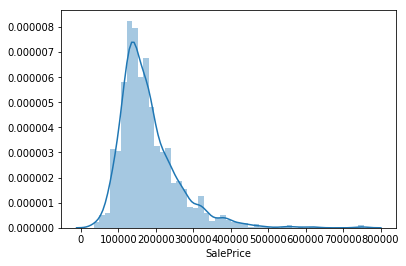

In [6]:
sns.distplot(target_variable)
#plt.savefig('SalePrice_skewed.png', dpi=300, bbox_inches='tight')

It is visible from the above distribution that the SalePrice is skewed to the left. It would be sensible to transform this to better fit a linear model. Let's take a look at the skewness and kurtosis of the SalePrice.

In [7]:
print("Skewness: %f" % target_variable.skew())
print("Kurtosis: %f" % target_variable.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


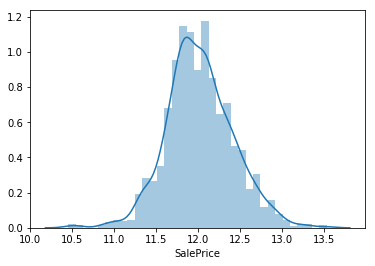

In [8]:
sns.distplot(np.log(target_variable))
plt.savefig('SalePrice_norm.png', dpi=300, bbox_inches='tight')

In [9]:
print("Skewness: %f" % np.log(target_variable.skew()))
print("Kurtosis: %f" % np.log(target_variable.kurt()))

Skewness: 0.632800
Kurtosis: 1.877368


This is much better.

Let's take a look at the columns:

In [10]:
df_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

Exploring the features:
At a first glance, I tried to use my intuition and domain knowldege to determine what features would heavily influence the SalePrice of a house. Based upon my judgement, the following features would be important:
 1. GrLivArea - The square foot area of General Living spaces in the house.
 2. 1stFlrSF - The square foot area of the 1st floor of the house
 3. 2ndFlrSF - The square foot area of the 2nd floor of the house
 4. OverallQual - The Overall quality of the house
 5. FullBath - The number of full bathrooms in the house.
 6. YearBuilt - The Year in which the house was built
 7. GarageArea - The square foot area of the garage.
 8. Neighborhood - The quality of the neighborhood.

The rest of the features, while also important, would not be as influential as the above features in deciding the SalePrice.

Let's use a couple of visualizations to explore these predictors. To start of lets combine the training and testing datasets.

In [11]:
df_full = df_train[df_train.columns.difference(['SalePrice'])].append(df_test, ignore_index = False)
df_full.shape

(2919, 80)

Extracting the numerical and categorical features into two separate dataframes

In [12]:
df_num = df_full.select_dtypes(include = ['int64','float64'])
df_car = df_full.select_dtypes(include = ['object'])
print(df_full.shape[1])
print(df_num.shape[1])
print(df_car.shape[1])

80
37
43


ScatterPlots for the numeric features against the target Variable will provide an understanding of their distributions

In [13]:
df_num.columns

Index([u'1stFlrSF', u'2ndFlrSF', u'3SsnPorch', u'BedroomAbvGr', u'BsmtFinSF1',
       u'BsmtFinSF2', u'BsmtFullBath', u'BsmtHalfBath', u'BsmtUnfSF',
       u'EnclosedPorch', u'Fireplaces', u'FullBath', u'GarageArea',
       u'GarageCars', u'GarageYrBlt', u'GrLivArea', u'HalfBath', u'Id',
       u'KitchenAbvGr', u'LotArea', u'LotFrontage', u'LowQualFinSF',
       u'MSSubClass', u'MasVnrArea', u'MiscVal', u'MoSold', u'OpenPorchSF',
       u'OverallCond', u'OverallQual', u'PoolArea', u'ScreenPorch',
       u'TotRmsAbvGrd', u'TotalBsmtSF', u'WoodDeckSF', u'YearBuilt',
       u'YearRemodAdd', u'YrSold'],
      dtype='object')

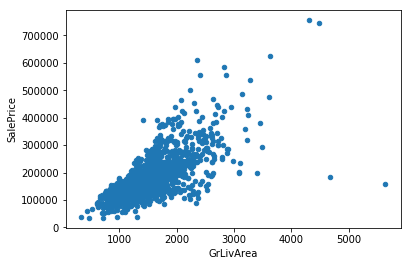

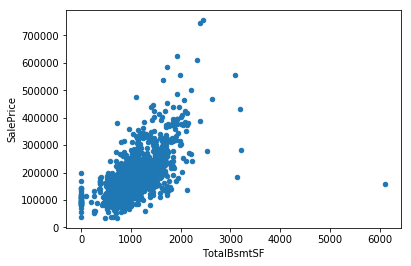

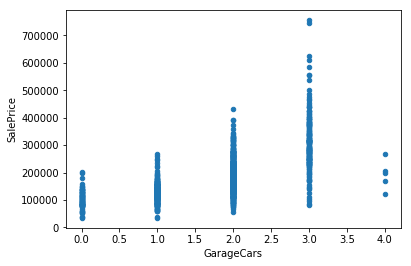

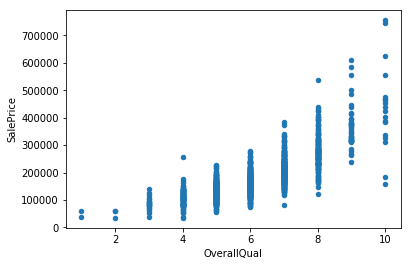

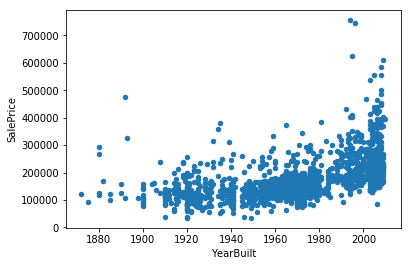

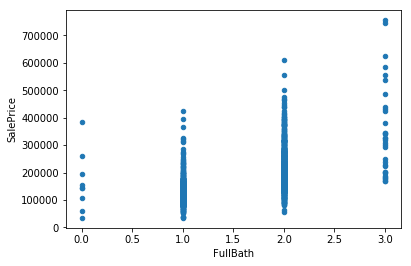

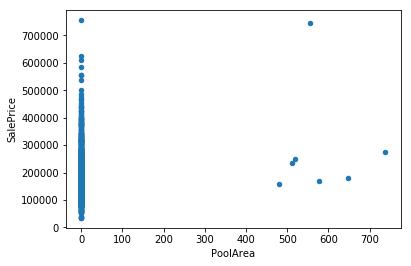

In [14]:
df_train.plot.scatter(x = 'GrLivArea', y = 'SalePrice')
plt.savefig('GrLivArea.png', dpi=300, bbox_inches='tight')
df_train.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice')
plt.savefig('TotalBsmtSF.png', dpi=300, bbox_inches='tight')
df_train.plot.scatter(x = 'GarageCars', y = 'SalePrice')
plt.savefig('GarageCars.png', dpi=300, bbox_inches='tight')
df_train.plot.scatter(x = 'OverallQual', y = 'SalePrice')
plt.savefig('OverallQual.png', dpi=300, bbox_inches='tight')
df_train.plot.scatter(x = 'YearBuilt', y = 'SalePrice')
plt.savefig('YearBuilt.png', dpi=300, bbox_inches='tight')
df_train.plot.scatter(x = 'FullBath', y = 'SalePrice')
plt.savefig('FullBath.png', dpi=300, bbox_inches='tight')
df_train.plot.scatter(x = 'PoolArea', y = 'SalePrice')
plt.savefig('PoolArea.png', dpi=300, bbox_inches='tight')

From these plots I can deduce that the GrLivArea, TotalBsmtSF, GarageCars, OverallQual, YearBuilt and FullBath have a pretty strong linear/exponential relationship with the response variable. In addition, I'd like to explore how some of the other variables mentioned earlier relate with these main features.

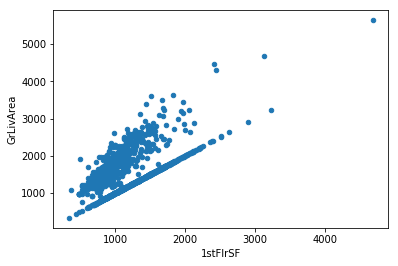

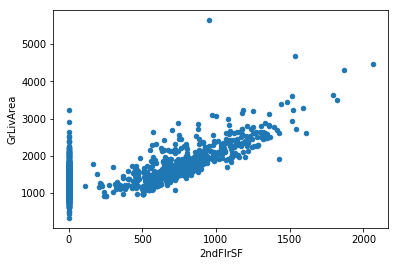

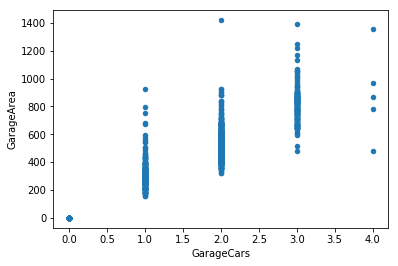

In [15]:
df_train.plot.scatter(x = '1stFlrSF', y = 'GrLivArea')
#plt.savefig('Scatter_GarageCars.png', dpi=300, bbox_inches='tight')
df_train.plot.scatter(x = '2ndFlrSF', y = 'GrLivArea')
#plt.savefig('Scatter_1.png', dpi=300, bbox_inches='tight')
df_train.plot.scatter(x = 'GarageCars', y = 'GarageArea')
#plt.savefig('Scatter_1.png', dpi=300, bbox_inches='tight')

From these plots, it is visible that the 1stFlrSF and 2ndFlrSF correlate quite strongly with the GrLivArea. Hence, they can probably be dropped and the GrLivArea feature should be sufficient to provide the necessary information gain. Similarly the scatter plot between the GarageArea and GarageCars features indicates that they share a strong correlation and that one of them can be dropped without reducing the information gain.

Hence, it seems that there might be multiple features with high correlations that could be dropped to reduce the dimensionality of the dataset. A correlation Heatmap and scatter plots between the highest correlated variables will help identify these features.

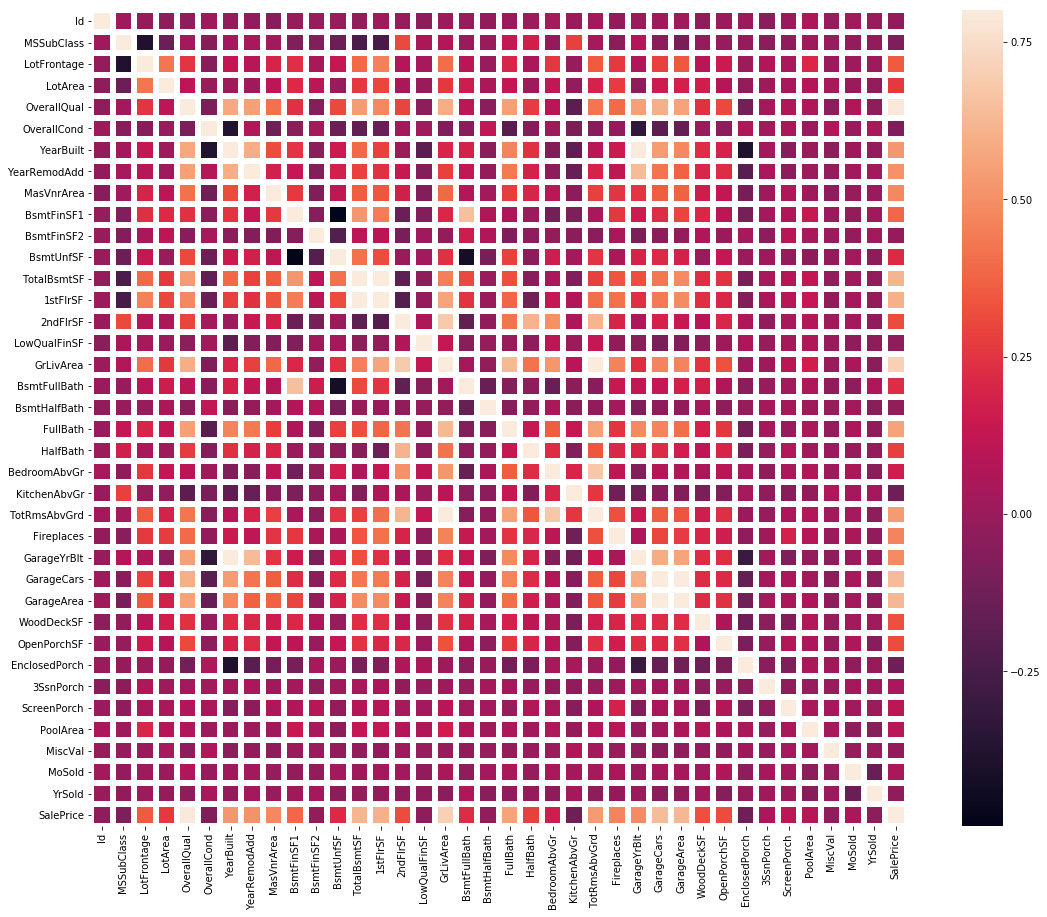

In [16]:
cor_matrix = df_train.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cor_matrix, vmax=0.8, square=True, annot=False, linewidth = 5)
plt.savefig('Heatmap_1.png', dpi=300, bbox_inches='tight')

From ths heatmap there are multiple features that seem to be highly correlated. This could lead to mutlicollinearity which is something I'd want to avoid. So a closer scrutiny of the heatmap will allow us to remove these redundant features.

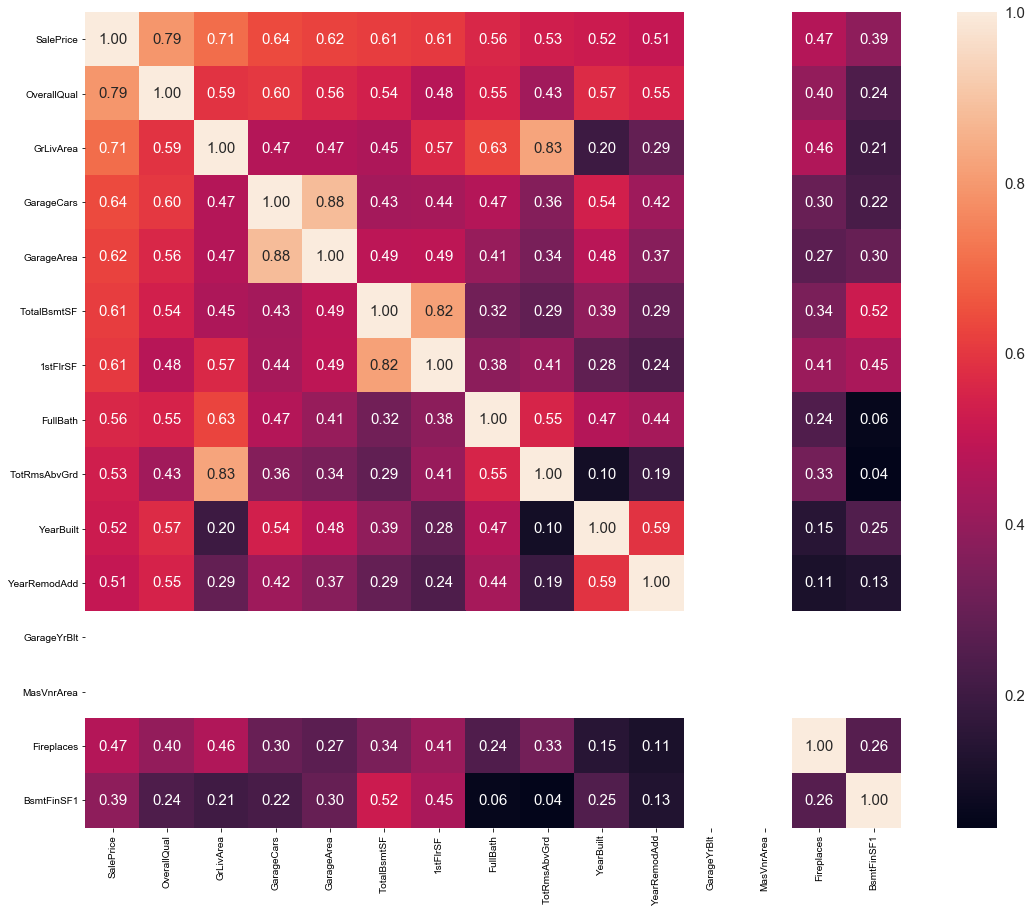

In [17]:
k = 15 #Looking for the top 15 features highly correlated with SalePrice
cols = cor_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('Heatmap_2.png', dpi=300, bbox_inches='tight')
plt.show()

Immediately we can see some features that stand out as important and some which can be dropped. For example, OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF and 1stFlrSF all have correlation scores higher than 0.6 with the response feature meriting their compulsory inclusion amongst the numerical features. At the same time the GarageCars and GarageAreas features are also highly correlated at 0.88 and so one of them can be dropped without too much information loss. Similarly, the TotRmsAbvGrd and GrLivArea are also quite highly correlated with a score of 0.83 and one of them can be dropped. Since, the GrLivArea feature is more highly correlated with the SalePrice, the TotRmsAbvGrd feature can be dropped. By examining the heatmap in this manner, more redundant numerical features can be dropped.

Next the Categorical Features can be explored to observe their relation with the SalePrice response.

In [18]:
df_car.columns

Index([u'Alley', u'BldgType', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1',
       u'BsmtFinType2', u'BsmtQual', u'CentralAir', u'Condition1',
       u'Condition2', u'Electrical', u'ExterCond', u'ExterQual',
       u'Exterior1st', u'Exterior2nd', u'Fence', u'FireplaceQu', u'Foundation',
       u'Functional', u'GarageCond', u'GarageFinish', u'GarageQual',
       u'GarageType', u'Heating', u'HeatingQC', u'HouseStyle', u'KitchenQual',
       u'LandContour', u'LandSlope', u'LotConfig', u'LotShape', u'MSZoning',
       u'MasVnrType', u'MiscFeature', u'Neighborhood', u'PavedDrive',
       u'PoolQC', u'RoofMatl', u'RoofStyle', u'SaleCondition', u'SaleType',
       u'Street', u'Utilities'],
      dtype='object')

Amongst these features, some that I would consider as quite important in influencing the SalePrice are BsmtQual, CentralAir, ExterCond, GarageCond/GarageQual, KitchenQual, Neighborhood and SaleCondition. We will use box plots to check their relationship with SalePrice and observe their distributions.

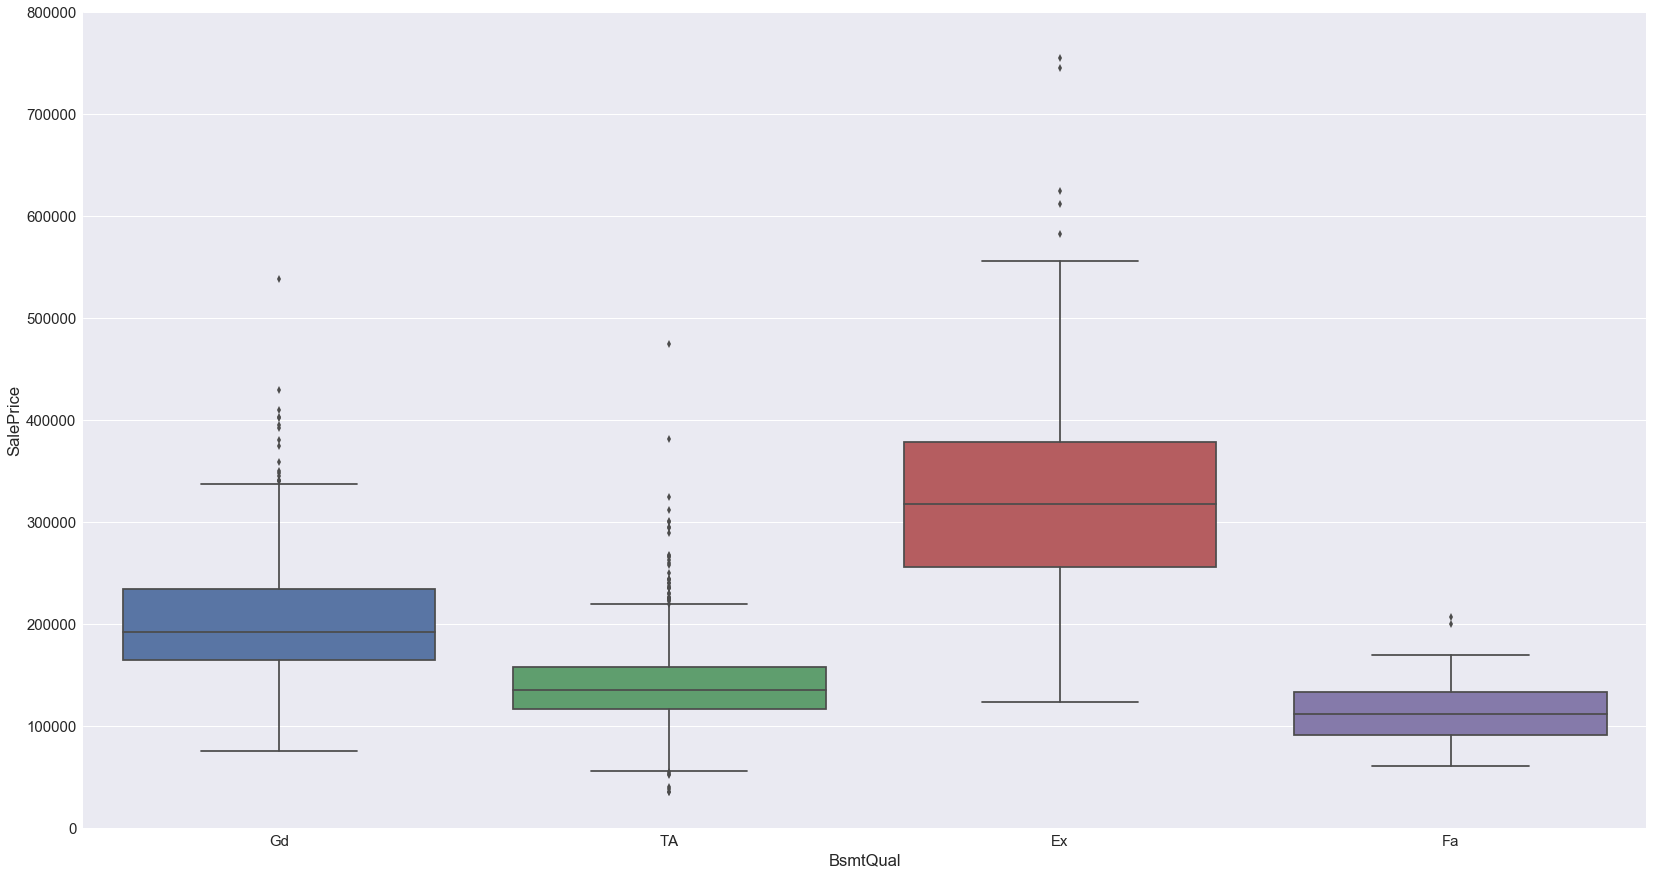

In [19]:
var = 'BsmtQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.savefig('BsmtQual.png', dpi=300, bbox_inches='tight')

This is as expected, the general trend of SalePrice increases with an increase in Basement Quality. There aren't any anomalies.

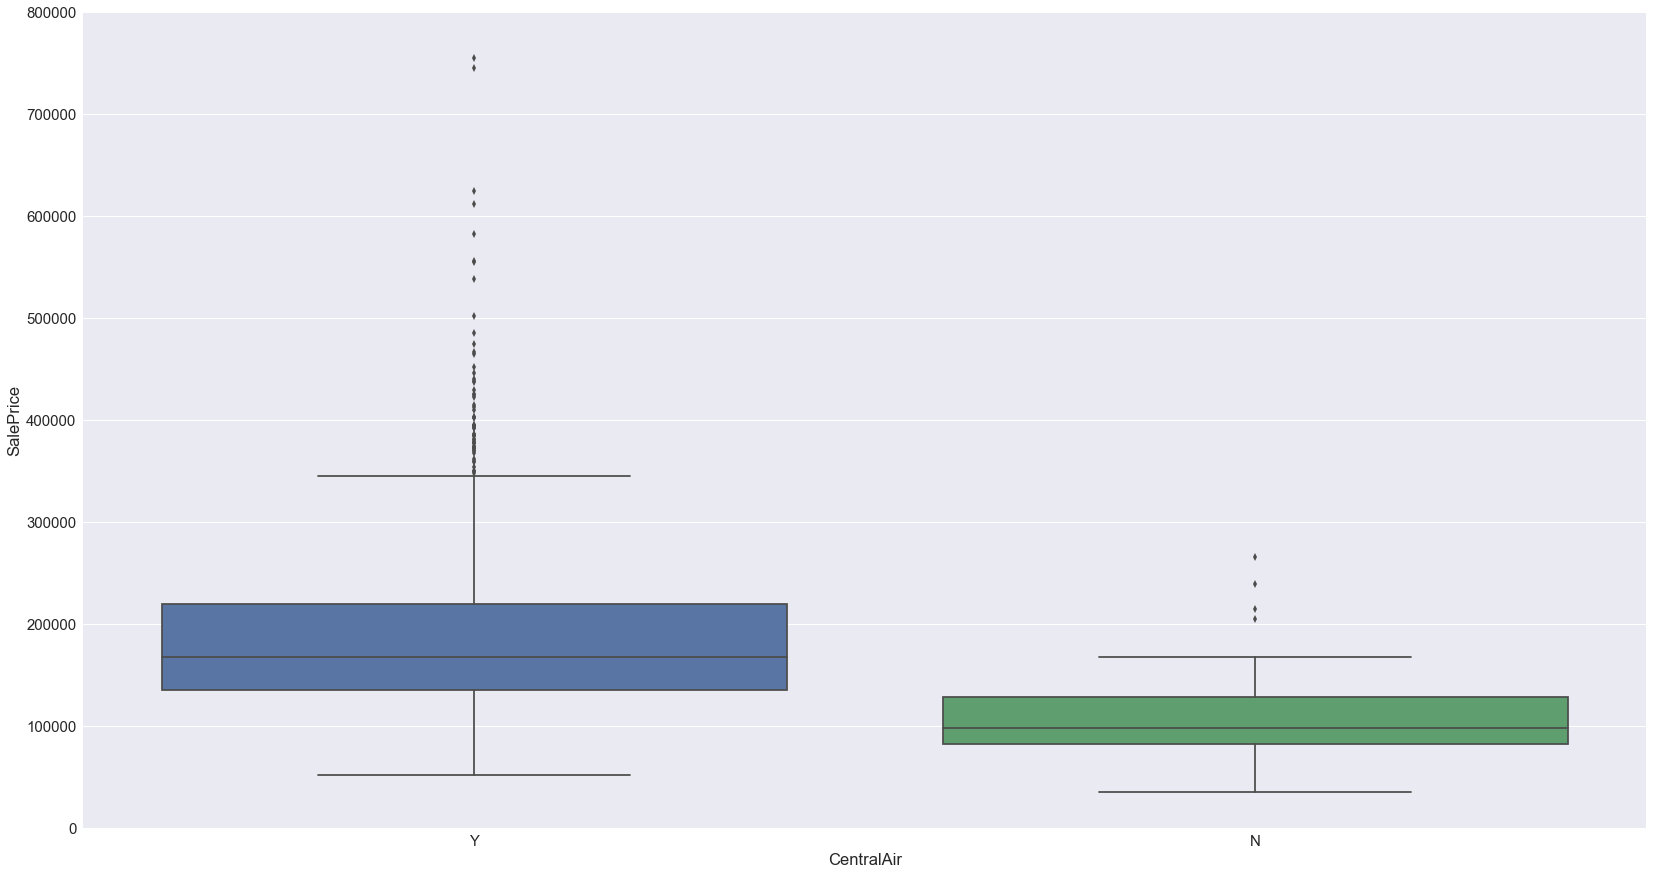

In [20]:
var = 'CentralAir'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.savefig('CentralAir.png', dpi=300, bbox_inches='tight')

It seems like the presence or absence of Central Air doesn't affect the SalePrice by much in 80-85% of the houses. There are certain outliers which show that Central Air does affect the SalePrice of some of the houses.

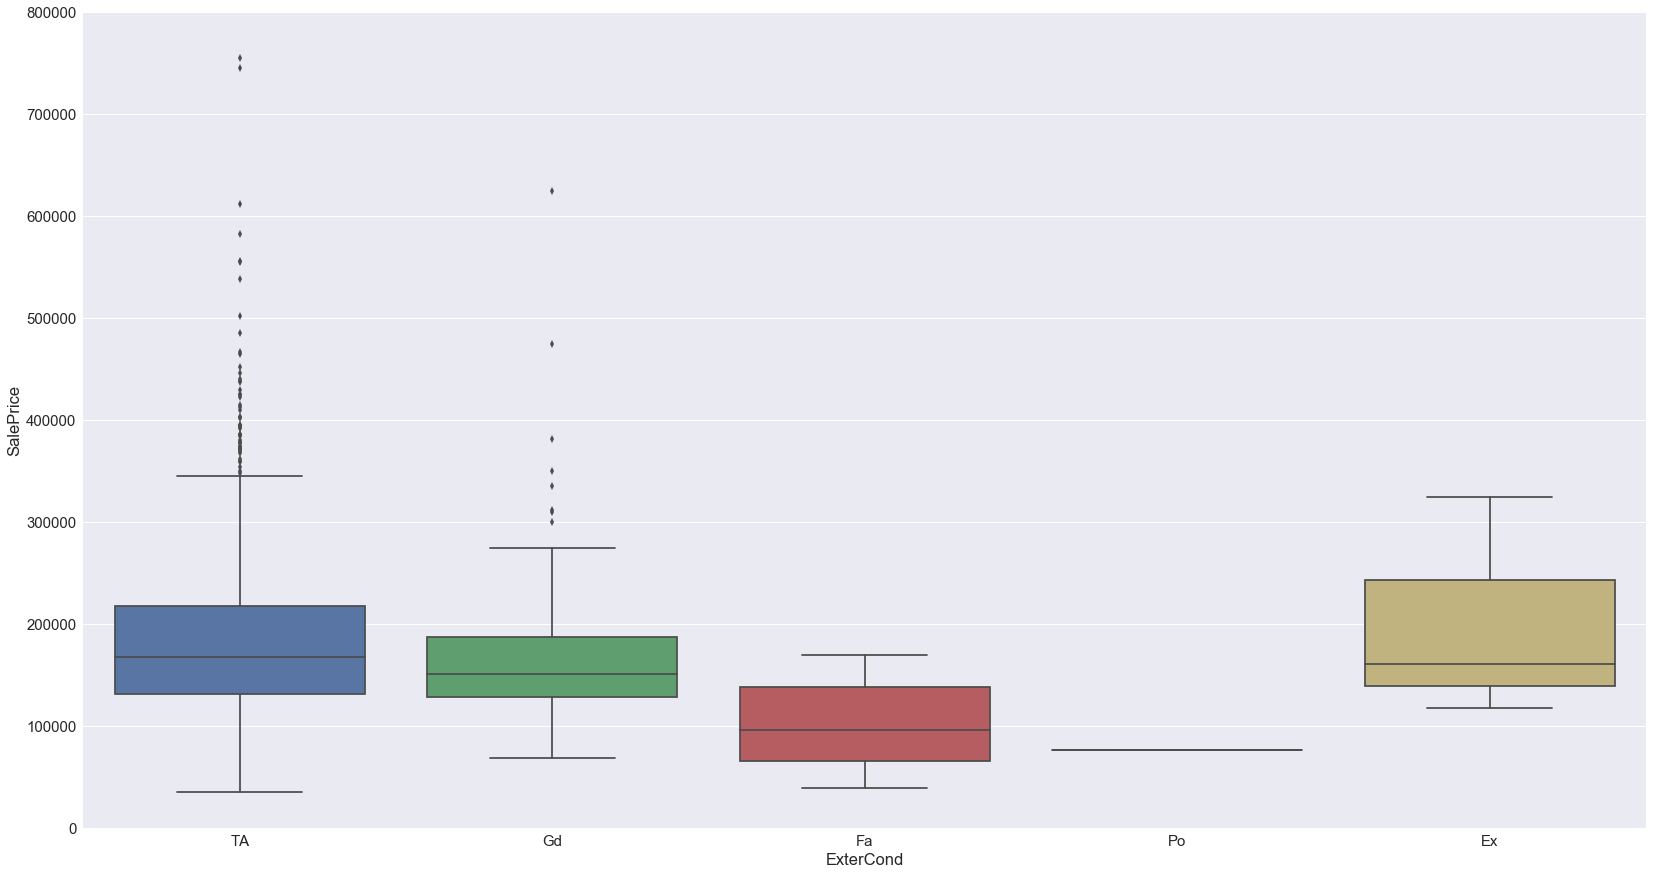

In [21]:
var = 'ExterCond'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.savefig('ExterCond.png', dpi=300, bbox_inches='tight')

Here, there are reasonable trends that show that the SalePrice increases with the Exterior Condition of the house. However, there some anomalies where houses with average Exterior Conditions still have quite high SalePrices.

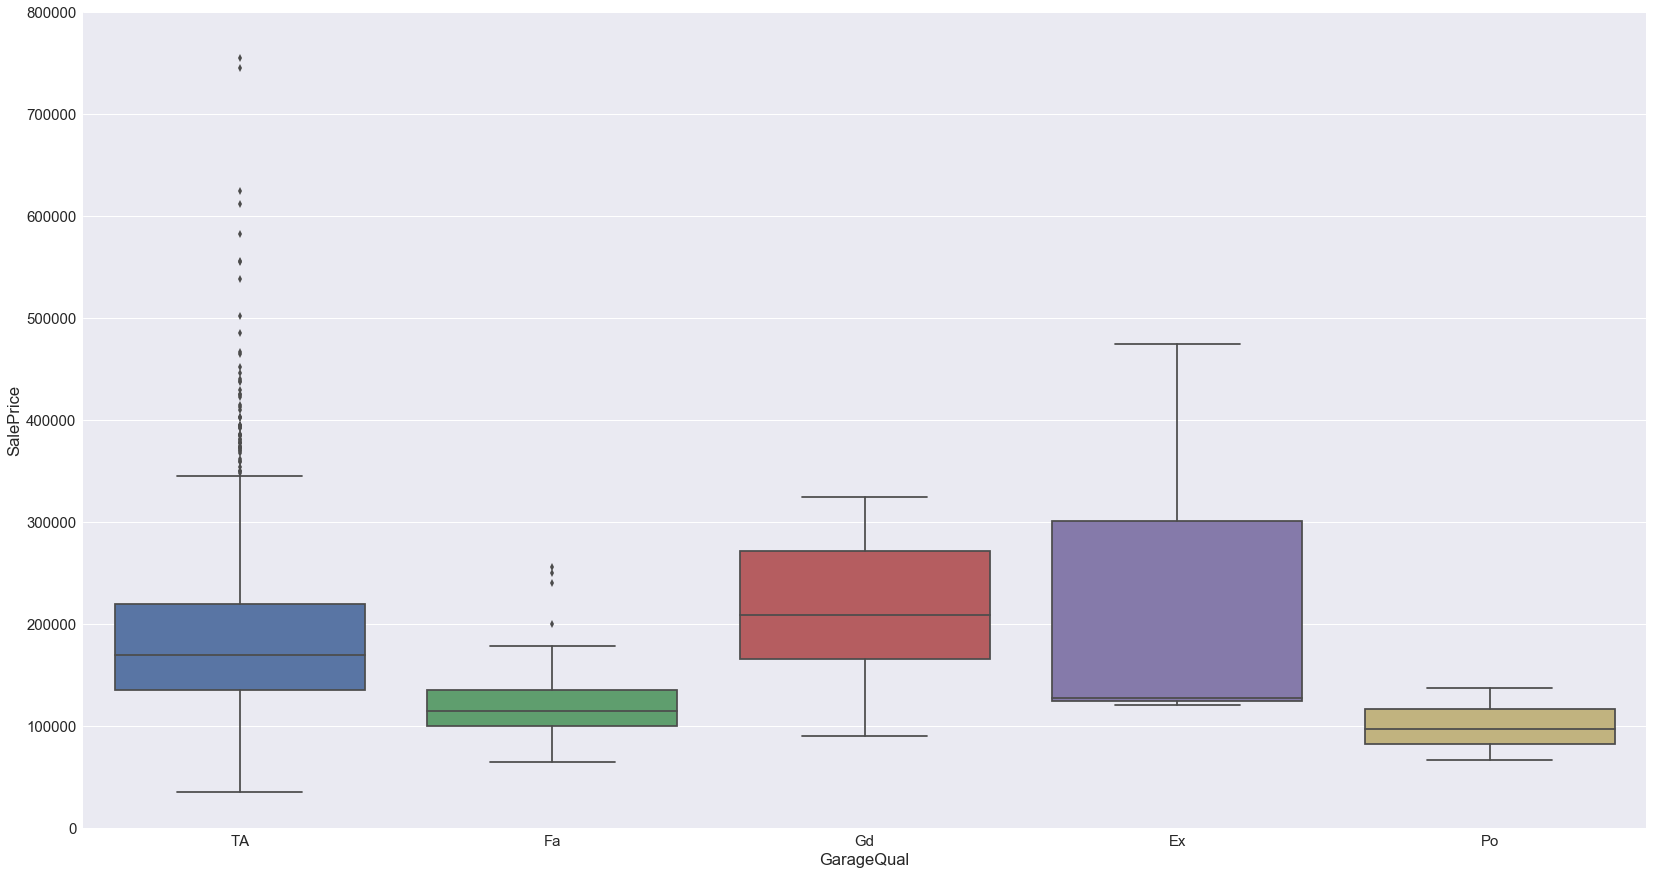

In [22]:
var = 'GarageQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.savefig('GarageQual.png', dpi=300, bbox_inches='tight')

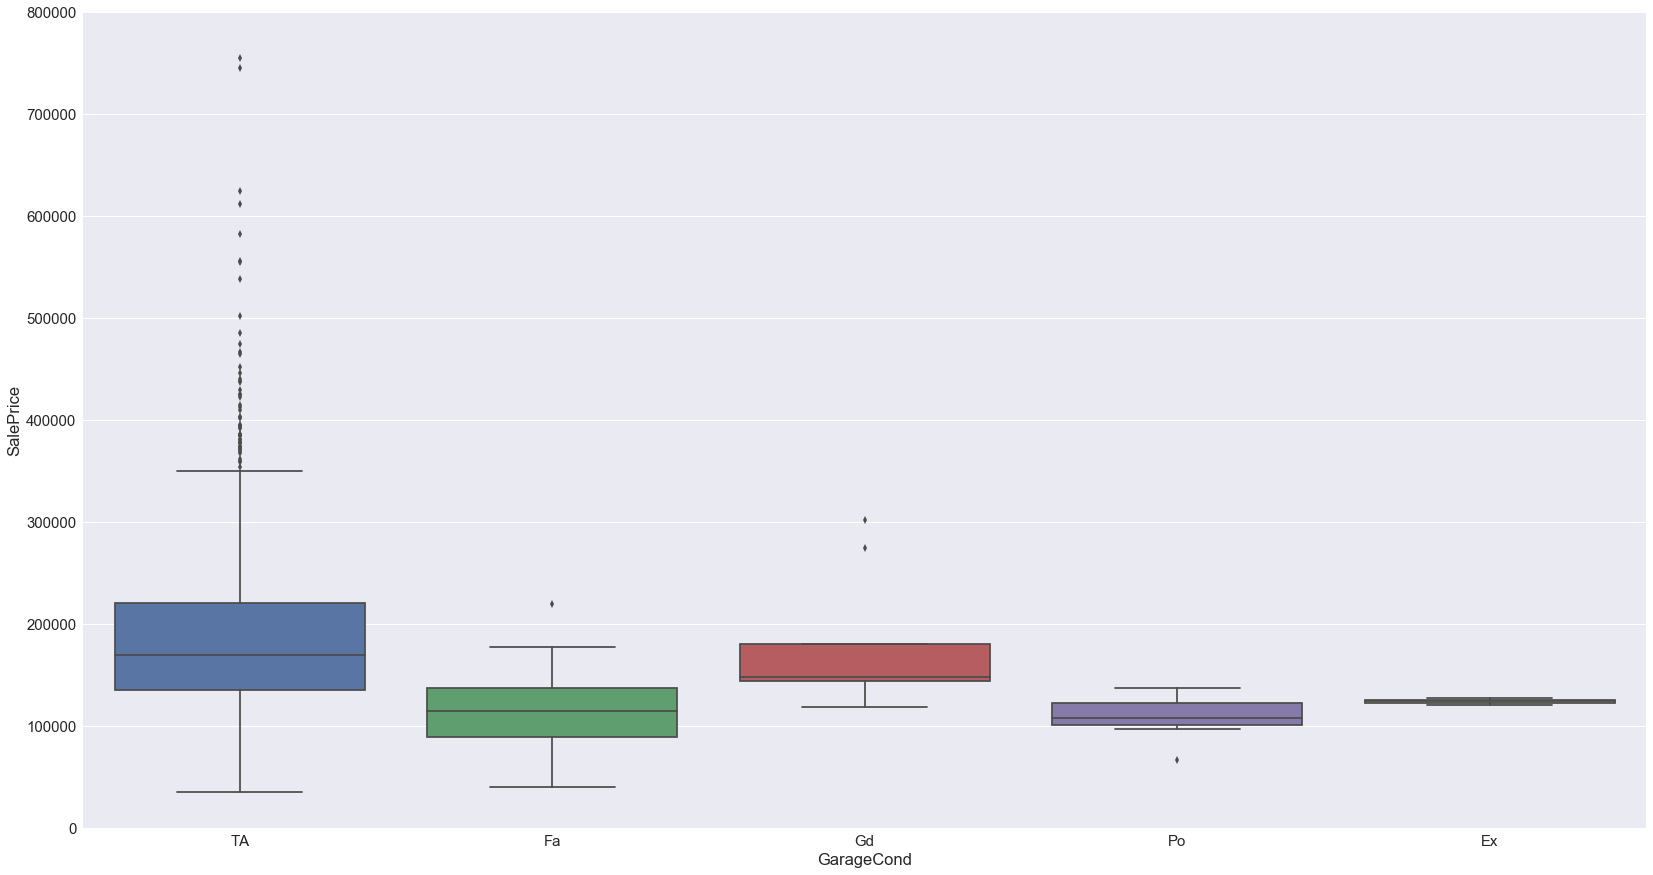

In [23]:
var = 'GarageCond'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.savefig('GarageCond.png', dpi=300, bbox_inches='tight')

Based upon the above boxplots, I can deduce that while there are some houses with average Quality/Condition of the basements that have rather high SalePrices, there isn't too much of variance in the SalePrice values irrespective of the GarageQuality.

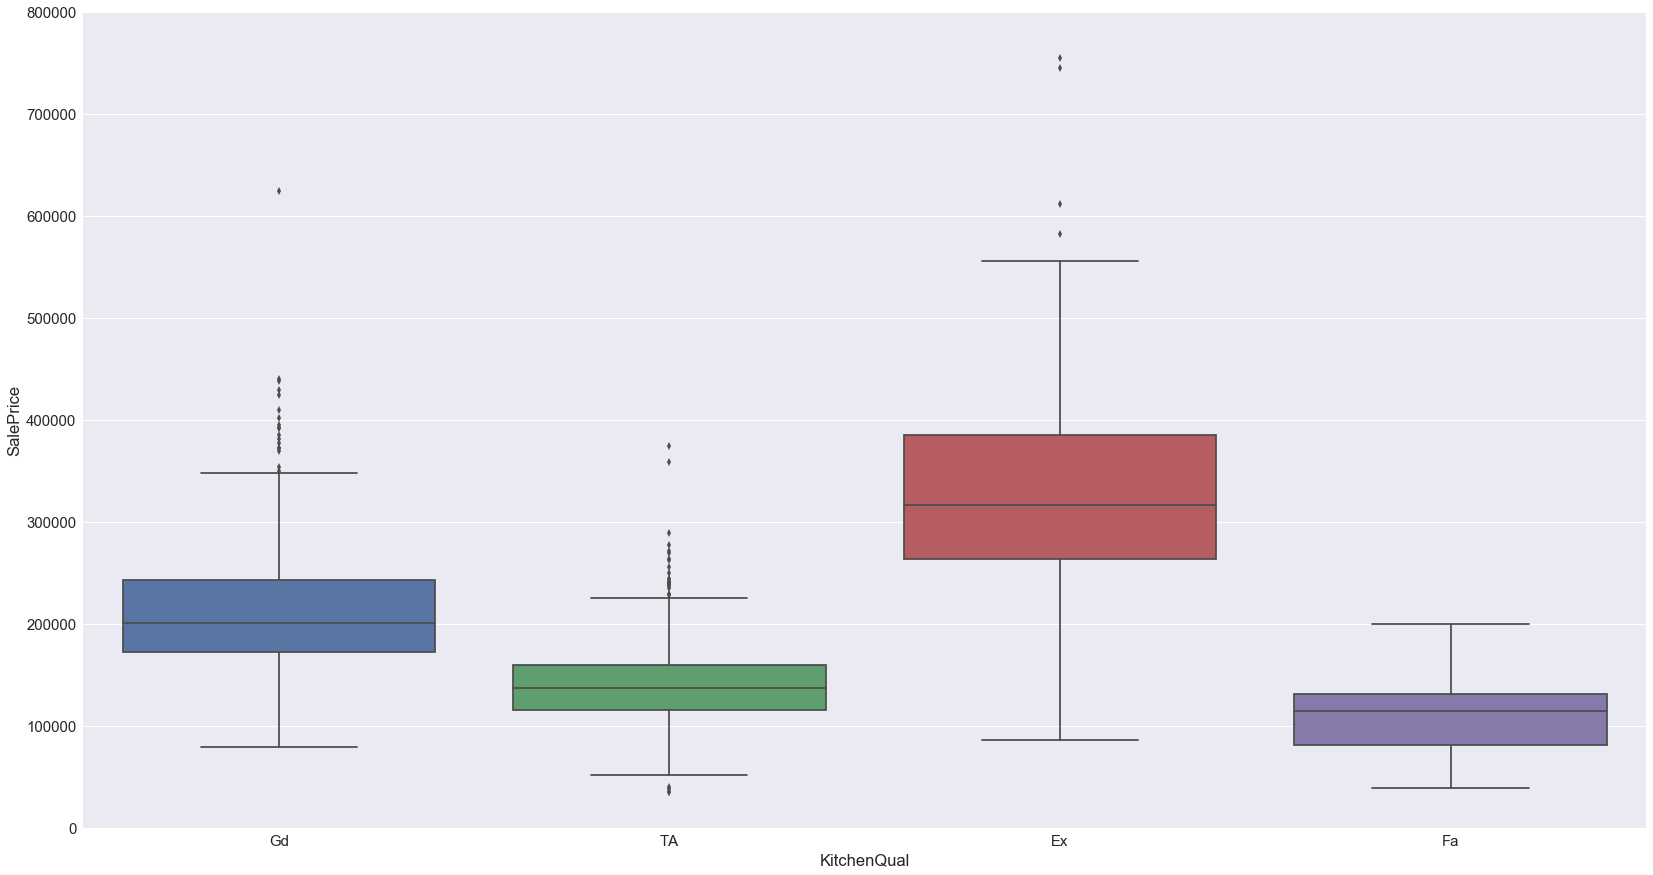

In [24]:
var = 'KitchenQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.savefig('KitchenQual.png', dpi=300, bbox_inches='tight')

Once again the KitchenQual boxplots show a reasonable trend and nothing out of the ordinary.

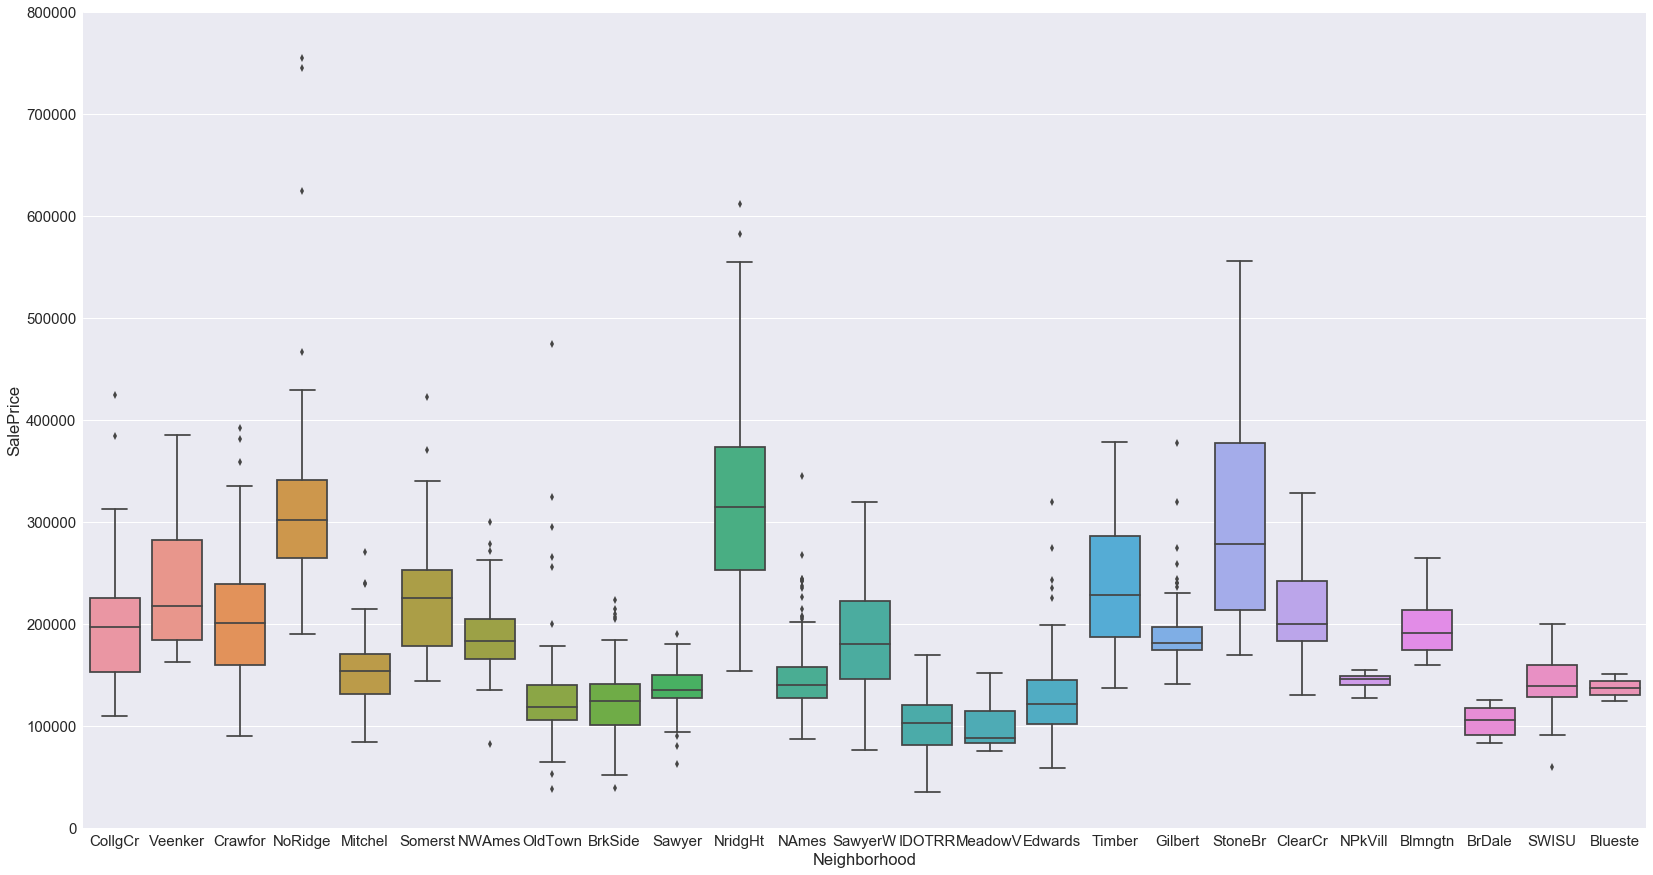

In [25]:
var = 'Neighborhood'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.savefig('Neighborhood.png', dpi=300, bbox_inches='tight')

This is a slightly more complicated feature to interpret independently. Most of the neighborhoods seem to have almost similar mean SalePrice values, with some of them showing some variance over the SalePrice. I would ratify that the neighborhood definitely does affect the SalePrice, in combination with features like OverallQual, GrLivArea, GarageArea and TotalBsmtSF, based upon my intuition and domain knowledge.

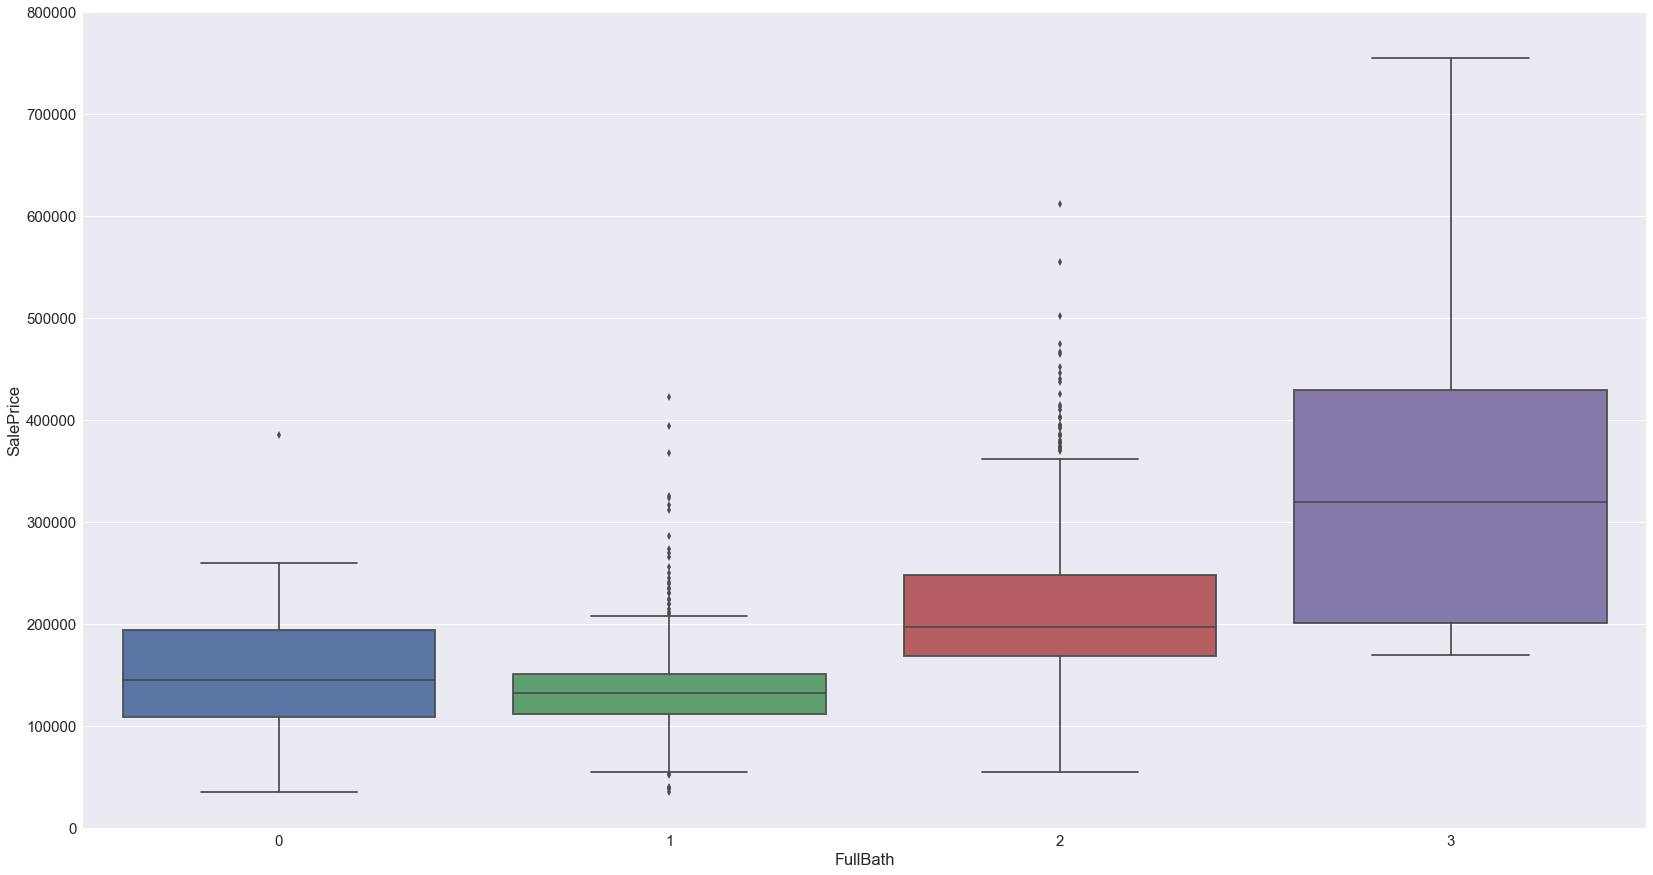

In [26]:
var = 'FullBath'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.savefig('FullBath.png', dpi=300, bbox_inches='tight')

The effect of the number of FullBathrooms remains almost the same when the number of bathrooms is between 0-2 but rises quite a bit when the bathrooms increase to 3.

These plots have given me a good amount of understanding into some of the important features and how they affect the SalePrice response variable. This will be helpful in constructing my Benchmark model and subsequent models. The next step is to explore the missing values in the dataset.

I will write a chunk which compites the sum of missing values and the percentage of them as well. 

In [27]:
#Imputing missing LotFrontage values
vec_lf = df_full.loc[df_full['LotFrontage'].isnull()].index.tolist()
df_full.ix[vec_lf,'LotFrontage'] = 70
df_full['LotFrontage'].isnull().sum()

0

In [28]:
total = df_full.isnull().sum().sort_values(ascending=False)
percent = (df_full.isnull().sum()/df_full.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total'] >= 1]

Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
GarageCond      159  0.054471
GarageFinish    159  0.054471
GarageQual      159  0.054471
GarageYrBlt     159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
BsmtHalfBath      2  0.000685
BsmtFullBath      2  0.000685
Functional        2  0.000685
Utilities         2  0.000685
KitchenQual       1  0.000343
GarageArea        1  0.000343
TotalBsmtSF       1  0.000343
Electrical        1  0.000343
BsmtFinSF2        1  0.000343
Exterior2nd       1  0.000343
GarageCars        1  0.000343
SaleType          1  0.000343
BsmtUnfSF         1  0.000343
BsmtFinSF1        1  0.000343
Exterior1st       1  0.000343

At first glance it's easy to see that some of the features have more than 90% of their values missing. I have decided to arbitarily select 20% missing as a threshold for missing values and any feature that has more than 20% of missng features will be dropped. This still leaves quite a few features to impute but I decided on 20% since I do not want to lose too much of information. The rest of the features with fewer missing values can be accounted for by checking the importance the feature and dropping it or simply deleting the rows with missing variables. It is possible that these are not missing features but instead indicate an absence of these features for the respetive houses. In that case, since more than 90% of these hosues do not have these features, the ones that do would more likely act as outliers fot the rest of the data. Hence, dropping them would make more sense.

The PoolQC, MiscFeature, Alley, Fence and FirePlaceQU features are automatically dropped since they all have more than 20% of missing values. As far as the rest are concerned I will explore them a bit more before deciding how to deal with them.

The Garage features involving the finish qulaity, Year built etc. don't seem to have too much of an influence on the SalePrice as has been seen earlier while exploring the categorical variables. The GarageCars feature seemed like the only feature that really mattered. So I will drop all the other Garage features.

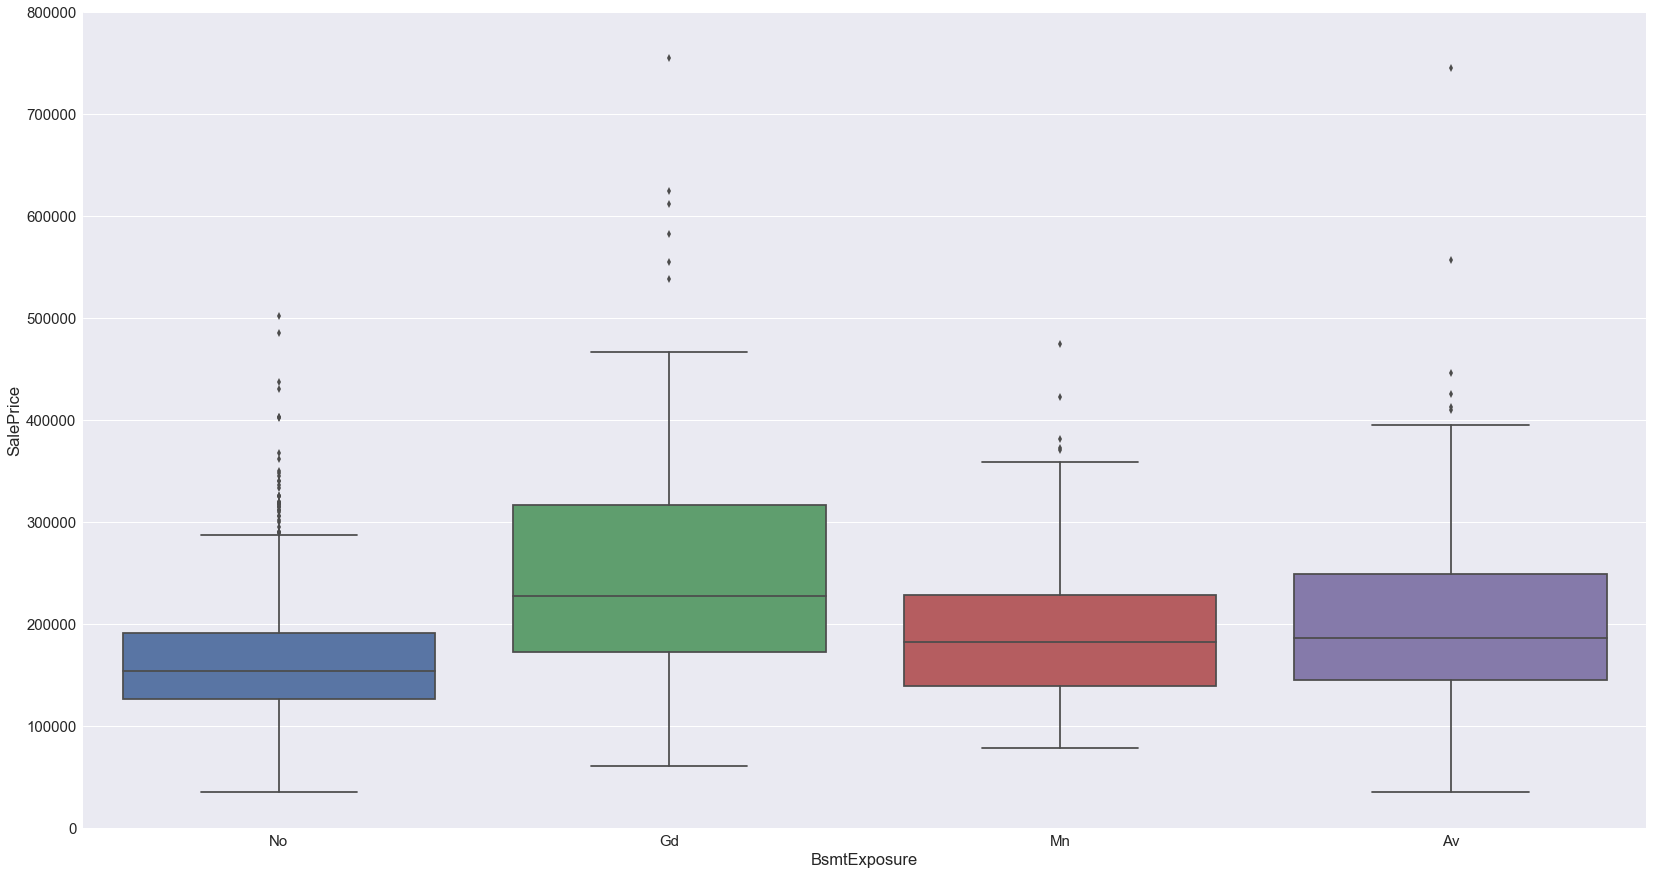

In [29]:
var = 'BsmtExposure'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

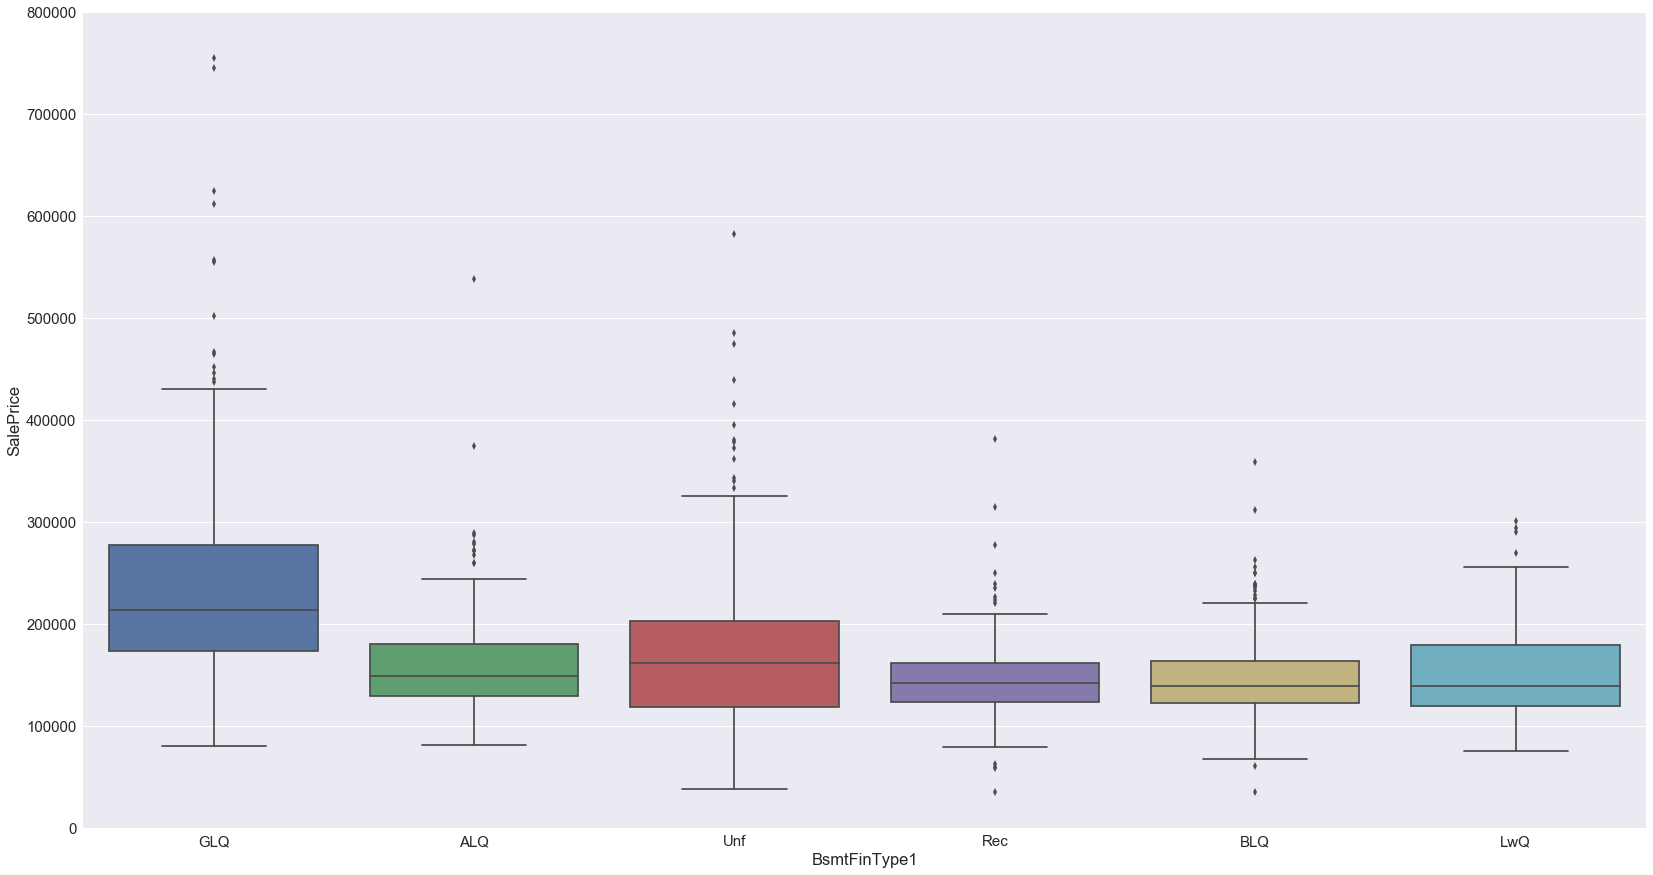

In [30]:
var = 'BsmtFinType1'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

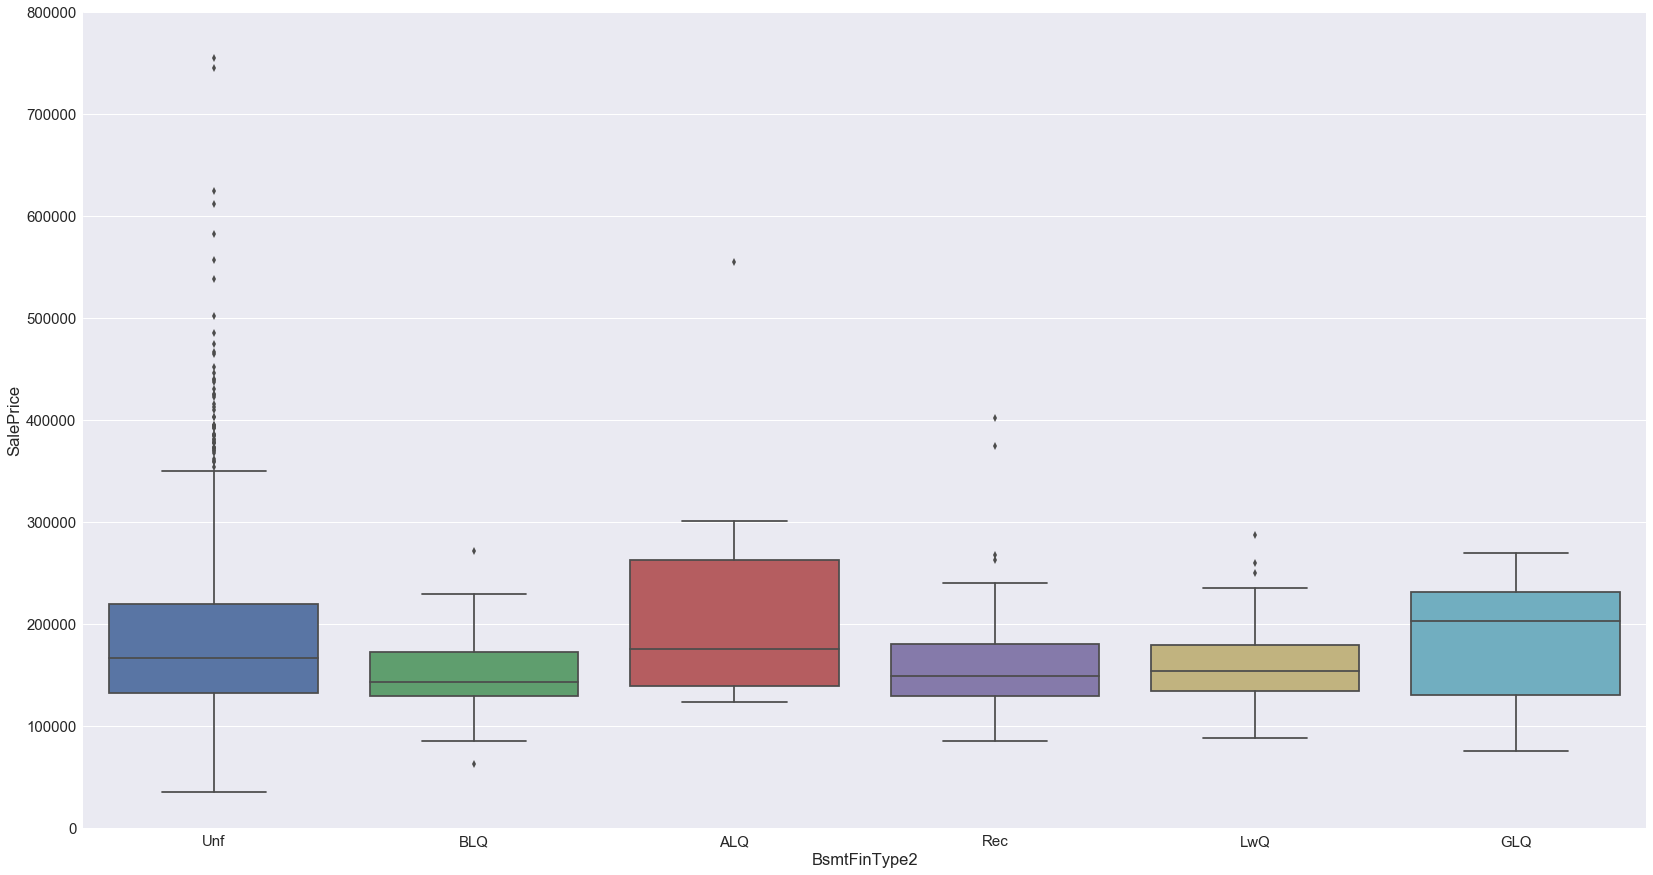

In [31]:
var = 'BsmtFinType2'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

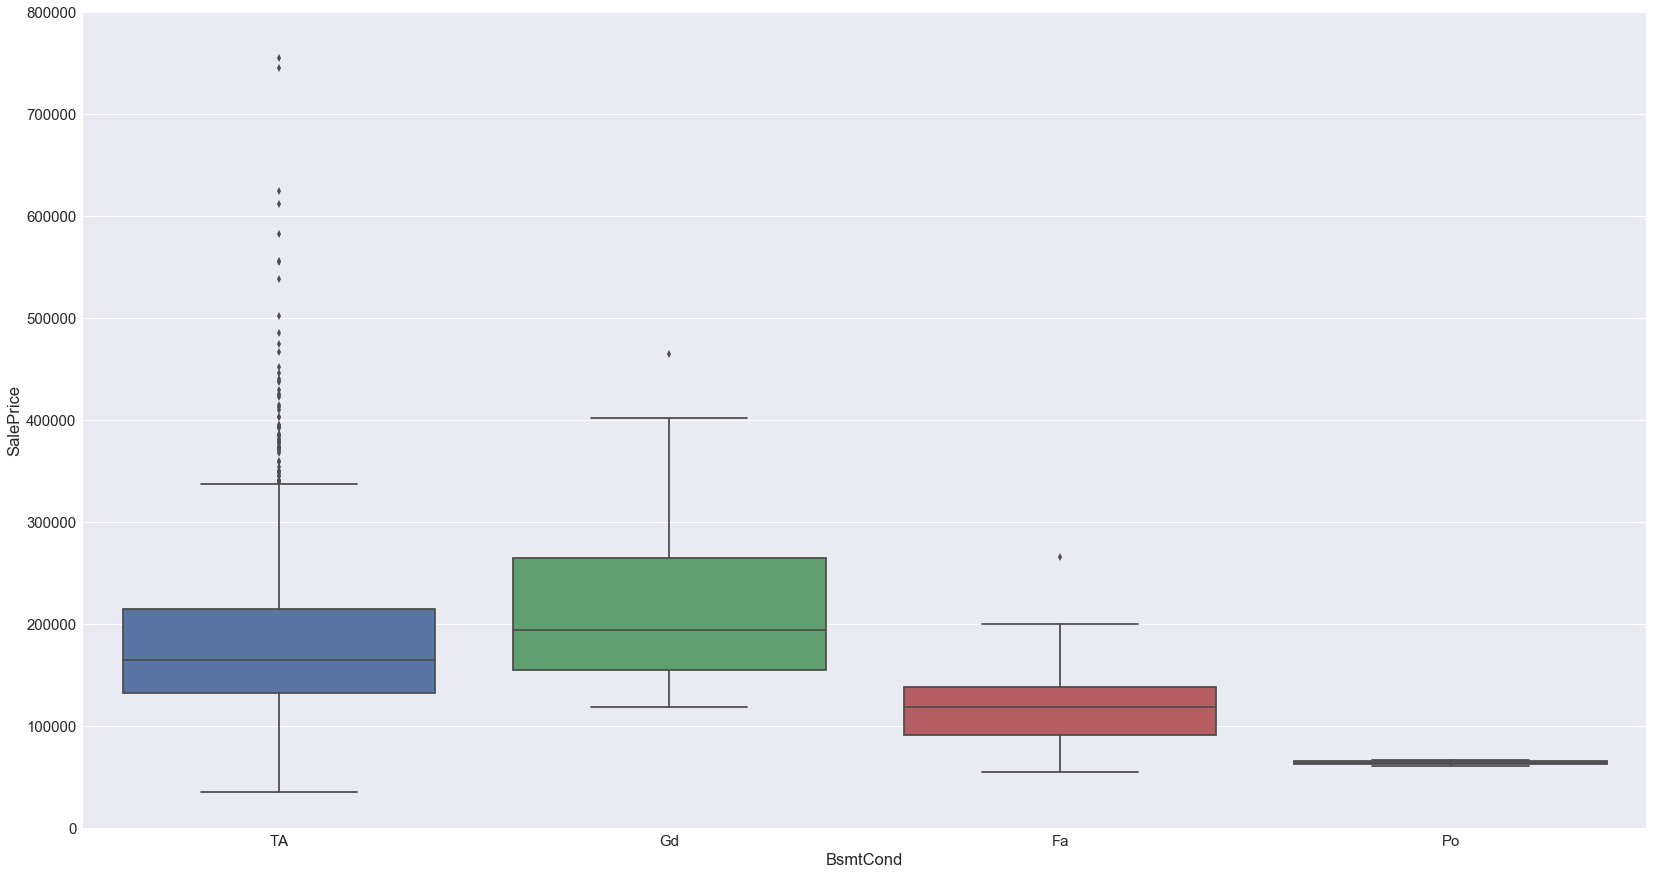

In [32]:
var = 'BsmtCond'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

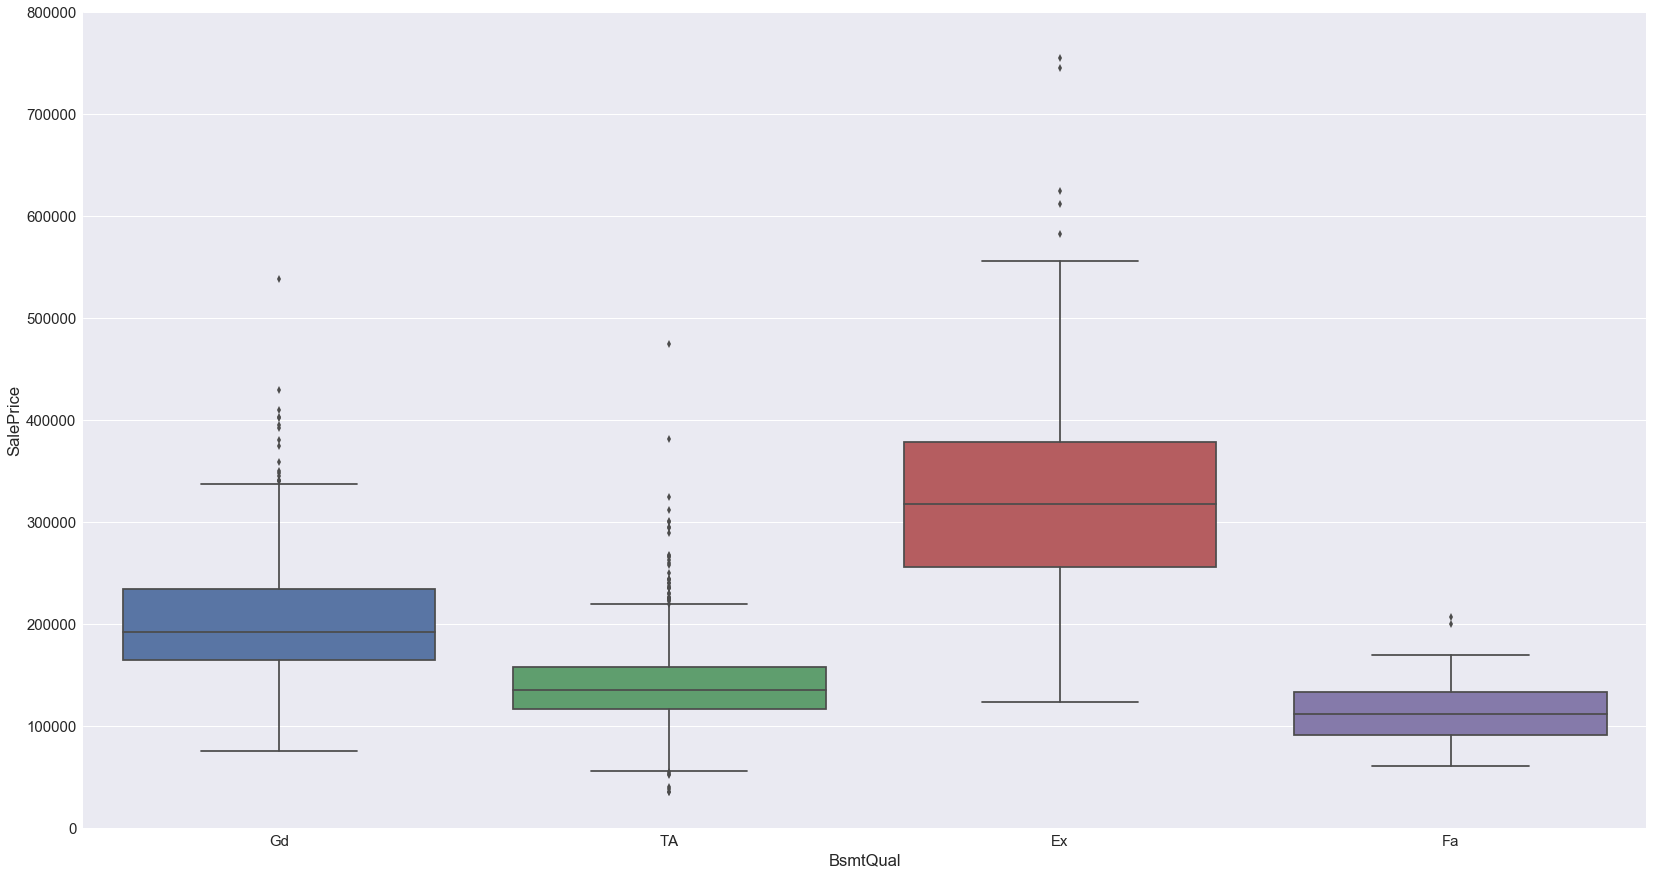

In [33]:
var = 'BsmtQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

It is clear that none of these Basement features explain a lot of variance for the SalePrice. SO I can drop them as well.

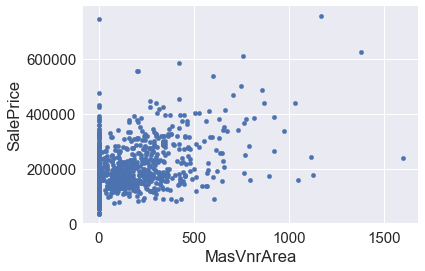

In [34]:
var = 'MasVnrArea'
df_train.plot.scatter(x = var, y = 'SalePrice')


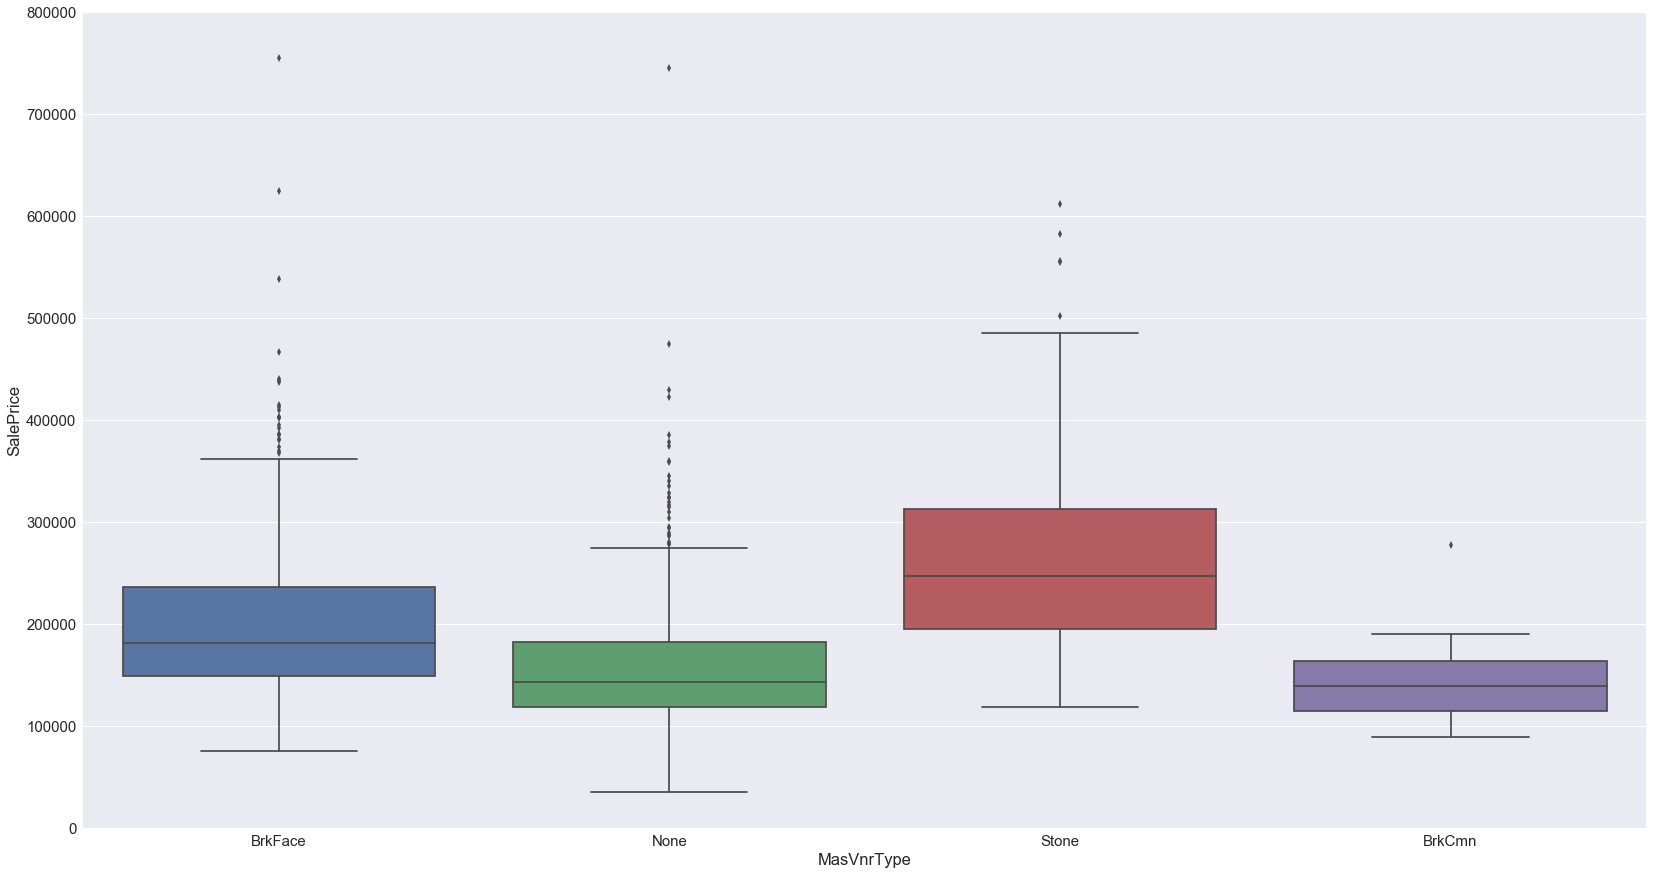

In [35]:
var = 'MasVnrType'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

From the above plots it is sufficient to say that the Mason Area feature shares a weak relationship with SalePrice while the Mason type feature again explains little or none of the SalePrice variance. Hence, they both can be dropped.

The last missing value feature is Electrical. Since this is just one missing row, I will simply drop the row from the dataset.

NOTE: I am removing features for the combined train and test datasets since I am working on the assumption that both test and train datasets should be drawn from the same sample. Hence, removal of features should be done on both the train and test data. Further I am not involving the target variable for the removal in any manner so as to avoid any chance of overfitting. after dropping the columns I will split the datasets into the original train and test sets again and drop rows with single missing values from the train set only.

In [36]:
df_full['LotFrontage'].shape

(2919L,)

In [37]:
total1 = df_full.isnull().sum().sort_values(ascending=False)
percent1 = (df_full.isnull().sum()/df_full.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total1, percent1], axis=1, keys=['Total', 'Percent'])
missing_data1[missing_data1['Total'] > 0]

Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
GarageCond      159  0.054471
GarageFinish    159  0.054471
GarageQual      159  0.054471
GarageYrBlt     159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
BsmtHalfBath      2  0.000685
BsmtFullBath      2  0.000685
Functional        2  0.000685
Utilities         2  0.000685
KitchenQual       1  0.000343
GarageArea        1  0.000343
TotalBsmtSF       1  0.000343
Electrical        1  0.000343
BsmtFinSF2        1  0.000343
Exterior2nd       1  0.000343
GarageCars        1  0.000343
SaleType          1  0.000343
BsmtUnfSF         1  0.000343
BsmtFinSF1        1  0.000343
Exterior1st       1  0.000343

In [38]:
df_full['LotFrontage'].isnull().sum()

0

In [39]:
missing_data1[missing_data1['Total'] > 1]

Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
GarageCond      159  0.054471
GarageFinish    159  0.054471
GarageQual      159  0.054471
GarageYrBlt     159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
BsmtHalfBath      2  0.000685
BsmtFullBath      2  0.000685
Functional        2  0.000685
Utilities         2  0.000685

In [40]:
df_full = df_full.drop((missing_data[missing_data['Total'] > 5]).index,1)

In [41]:
df_full['LotFrontage'].shape

(2919L,)

In [42]:
df_full.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtFullBath     2
BsmtHalfBath     2
BsmtUnfSF        1
CentralAir       0
Condition1       0
Condition2       0
Electrical       1
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      1
Exterior2nd      1
Fireplaces       0
Foundation       0
FullBath         0
Functional       2
GarageArea       1
GarageCars       1
GrLivArea        0
HalfBath         0
Heating          0
HeatingQC        0
HouseStyle       0
                ..
LandContour      0
LandSlope        0
LotArea          0
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         4
MiscVal          0
MoSold           0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         1
ScreenPorch 

In [43]:
total1 = df_full.isnull().sum().sort_values(ascending=False)
percent1 = (df_full.isnull().sum()/df_full.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total1, percent1], axis=1, keys=['Total', 'Percent'])
missing_data1[missing_data1['Total'] > 0]

Total   Percent
MSZoning          4  0.001370
Functional        2  0.000685
Utilities         2  0.000685
BsmtHalfBath      2  0.000685
BsmtFullBath      2  0.000685
Electrical        1  0.000343
Exterior2nd       1  0.000343
GarageArea        1  0.000343
BsmtUnfSF         1  0.000343
BsmtFinSF2        1  0.000343
SaleType          1  0.000343
BsmtFinSF1        1  0.000343
GarageCars        1  0.000343
KitchenQual       1  0.000343
TotalBsmtSF       1  0.000343
Exterior1st       1  0.000343

In [44]:
df_train = df_full[:df_train.shape[0]]
df_train['SalePrice'] = target_variable
df_train.head(10)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType  BsmtFinSF1  \
0       856       854          0             3     1Fam       706.0   
1      1262         0          0             3     1Fam       978.0   
2       920       866          0             3     1Fam       486.0   
3       961       756          0             3     1Fam       216.0   
4      1145      1053          0             4     1Fam       655.0   
5       796       566        320             1     1Fam       732.0   
6      1694         0          0             3     1Fam      1369.0   
7      1107       983          0             3     1Fam       859.0   
8      1022       752          0             2     1Fam         0.0   
9      1077         0          0             2   2fmCon       851.0   

   BsmtFinSF2  BsmtFullBath  BsmtHalfBath  BsmtUnfSF    ...     ScreenPorch  \
0         0.0           1.0           0.0      150.0    ...               0   
1         0.0           0.0           1.0      284.0    ...               0   
2         0.0           1.0           0.0      434.0    ...               0   
3         0.0           1.0           0.0      540.0    ...               0   
4         0.0           1.0           0.0      490.0    ...               0   
5         0.0           1.0           0.0       64.0    ...               0   
6         0.0           1.0           0.0      317.0    ...               0   
7        32.0           1.0           0.0      216.0    ...               0   
8         0.0           0.0           0.0      952.0    ...               0   
9         0.0           1.0           0.0      140.0    ...               0   

  Street TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt  \
0   Pave            8       856.0     AllPub          0      2003   
1   Pave            6      1262.0     AllPub        298      1976   
2   Pave            6       920.0     AllPub          0      2001   
3   Pave            7       756.0     AllPub          0      1915   
4   Pave            9      1145.0     AllPub        192      2000   
5   Pave            5       796.0     AllPub         40      1993   
6   Pave            7      1686.0     AllPub        255      2004   
7   Pave            7      1107.0     AllPub        235      1973   
8   Pave            8       952.0     AllPub         90      1931   
9   Pave            5       991.0     AllPub          0      1939   

  YearRemodAdd YrSold  SalePrice  
0         2003   2008     208500  
1         1976   2007     181500  
2         2002   2008     223500  
3         1970   2006     140000  
4         2000   2008     250000  
5         1995   2009     143000  
6         2005   2007     307000  
7         1973   2009     200000  
8         1950   2008     129900  
9         1950   2008     118000  

[10 rows x 64 columns]

In [45]:
df_test = df_full[df_train.shape[0]:]
df_test.shape
df_test.head(10)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType  BsmtFinSF1  \
0       896         0          0             2     1Fam       468.0   
1      1329         0          0             3     1Fam       923.0   
2       928       701          0             3     1Fam       791.0   
3       926       678          0             3     1Fam       602.0   
4      1280         0          0             2   TwnhsE       263.0   
5       763       892          0             3     1Fam         0.0   
6      1187         0          0             3     1Fam       935.0   
7       789       676          0             3     1Fam         0.0   
8      1341         0          0             2     1Fam       637.0   
9       882         0          0             2     1Fam       804.0   

   BsmtFinSF2  BsmtFullBath  BsmtHalfBath  BsmtUnfSF   ...   SaleType  \
0       144.0           0.0           0.0      270.0   ...         WD   
1         0.0           0.0           0.0      406.0   ...         WD   
2         0.0           0.0           0.0      137.0   ...         WD   
3         0.0           0.0           0.0      324.0   ...         WD   
4         0.0           0.0           0.0     1017.0   ...         WD   
5         0.0           0.0           0.0      763.0   ...         WD   
6         0.0           1.0           0.0      233.0   ...         WD   
7         0.0           0.0           0.0      789.0   ...         WD   
8         0.0           1.0           0.0      663.0   ...         WD   
9        78.0           1.0           0.0        0.0   ...         WD   

  ScreenPorch Street TotRmsAbvGrd  TotalBsmtSF Utilities WoodDeckSF YearBuilt  \
0         120   Pave            5        882.0    AllPub        140      1961   
1           0   Pave            6       1329.0    AllPub        393      1958   
2           0   Pave            6        928.0    AllPub        212      1997   
3           0   Pave            7        926.0    AllPub        360      1998   
4         144   Pave            5       1280.0    AllPub          0      1992   
5           0   Pave            7        763.0    AllPub        157      1993   
6           0   Pave            6       1168.0    AllPub        483      1992   
7           0   Pave            7        789.0    AllPub          0      1998   
8           0   Pave            5       1300.0    AllPub        192      1990   
9           0   Pave            4        882.0    AllPub        240      1970   

  YearRemodAdd  YrSold  
0         1961    2010  
1         1958    2010  
2         1998    2010  
3         1998    2010  
4         1992    2010  
5         1994    2010  
6         2007    2010  
7         1998    2010  
8         1990    2010  
9         1970    2010  

[10 rows x 63 columns]

In [46]:
#df_train['LotFrontage']
#df_test['LotFrontage']

In [47]:
total1 = df_train.isnull().sum().sort_values(ascending=False)
percent1 = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total1, percent1], axis=1, keys=['Total', 'Percent'])
missing_data1[missing_data1['Total'] > 0]

Total   Percent
Electrical      1  0.000685

In [48]:
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [49]:
total1 = df_train.isnull().sum().sort_values(ascending=False)
percent1 = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total1, percent1], axis=1, keys=['Total', 'Percent'])
missing_data1[missing_data1['Total'] > 0]

Empty DataFrame
Columns: [Total, Percent]
Index: []

In [50]:
df_train.shape

(1459, 64)

In [51]:
############################################################################################################################

In [52]:
df_test.shape

(1459, 63)

In [53]:
total2 = df_test.isnull().sum().sort_values(ascending=False)
percent2 = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
missing_data1[missing_data1['Total'] > 0]

Total   Percent
MSZoning          4  0.002742
Functional        2  0.001371
Utilities         2  0.001371
BsmtHalfBath      2  0.001371
BsmtFullBath      2  0.001371
BsmtFinSF2        1  0.000685
Exterior2nd       1  0.000685
GarageArea        1  0.000685
BsmtUnfSF         1  0.000685
Exterior1st       1  0.000685
SaleType          1  0.000685
BsmtFinSF1        1  0.000685
GarageCars        1  0.000685
KitchenQual       1  0.000685
TotalBsmtSF       1  0.000685

I will explore the summary statistics for these columns and impute using either median values or mean values

In [54]:
df_full['MSZoning'].describe()

count     2915
unique       5
top         RL
freq      2265
Name: MSZoning, dtype: object

In [55]:
vec = df_test.loc[df_test['MSZoning'].isnull()].index.tolist()
df_test.ix[vec,'MSZoning']
#df_test[df_test.loc[df_test['MSZoning'].isnull()].index.tolist()]

455     NaN
756     NaN
790     NaN
1444    NaN
Name: MSZoning, dtype: object

In [56]:
df_test.ix[vec,'MSZoning'] = 'RL'
df_test.ix[vec,'MSZoning']

455     RL
756     RL
790     RL
1444    RL
Name: MSZoning, dtype: object

In [57]:
df_full['Functional'].describe()

count     2917
unique       7
top        Typ
freq      2717
Name: Functional, dtype: object

In [58]:
vec = df_test.loc[df_test['Functional'].isnull()].index.tolist()
df_test.ix[vec,'Functional']
#df_test[df_test.loc[df_test['MSZoning'].isnull()].index.tolist()]

756     NaN
1013    NaN
Name: Functional, dtype: object

In [59]:
df_test.ix[vec,'Functional'] = 'Typ'
df_test.ix[vec,'Functional']

756     Typ
1013    Typ
Name: Functional, dtype: object

In [60]:
df_full['Utilities'].describe()

count       2917
unique         2
top       AllPub
freq        2916
Name: Utilities, dtype: object

In [61]:
vec = df_test.loc[df_test['Utilities'].isnull()].index.tolist()
df_test.ix[vec,'Utilities']
#df_test[df_test.loc[df_test['MSZoning'].isnull()].index.tolist()]

455    NaN
485    NaN
Name: Utilities, dtype: object

In [62]:
df_test.ix[vec,'Utilities'] = 'AllPub'
df_test.ix[vec,'Utilities']

455    AllPub
485    AllPub
Name: Utilities, dtype: object

In [63]:
df_full['BsmtHalfBath'].describe()

count    2917.000000
mean        0.061364
std         0.245687
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

In [64]:
vec = df_test.loc[df_test['BsmtHalfBath'].isnull()].index.tolist()
df_test.ix[vec,'BsmtHalfBath']
#df_test[df_test.loc[df_test['MSZoning'].isnull()].index.tolist()]

660   NaN
728   NaN
Name: BsmtHalfBath, dtype: float64

In [65]:
df_test.ix[vec,'BsmtHalfBath'] = 0
df_test.ix[vec,'BsmtHalfBath']

660    0.0
728    0.0
Name: BsmtHalfBath, dtype: float64

In [66]:
df_test.shape

(1459, 63)

In [67]:
df_full['BsmtFullBath'].describe()

count    2917.000000
mean        0.429894
std         0.524736
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

In [68]:
vec = df_test.loc[df_test['BsmtFullBath'].isnull()].index.tolist()
df_test.ix[vec,'BsmtFullBath']
#df_test[df_test.loc[df_test['MSZoning'].isnull()].index.tolist()]

660   NaN
728   NaN
Name: BsmtFullBath, dtype: float64

In [69]:
df_test.ix[vec,'BsmtFullBath'] = 0
df_test.ix[vec,'BsmtFullBath']

660    0.0
728    0.0
Name: BsmtFullBath, dtype: float64

In [70]:
df_test.shape

(1459, 63)

In [71]:
df_full['BsmtFinSF2'].describe()

count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

In [72]:
vec = df_test.loc[df_test['BsmtFinSF2'].isnull()].index.tolist()
df_test.ix[vec,'BsmtFinSF2']
#df_test[df_test.loc[df_test['MSZoning'].isnull()].index.tolist()]

660   NaN
Name: BsmtFinSF2, dtype: float64

In [73]:
df_test.ix[vec,'BsmtFinSF2'] = 0
df_test.ix[vec,'BsmtFinSF2']

660    0.0
Name: BsmtFinSF2, dtype: float64

In [74]:
df_test.shape

(1459, 63)

In [75]:
total2 = df_test.isnull().sum().sort_values(ascending=False)
percent2 = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
missing_data1[missing_data1['Total'] > 0]

Total   Percent
SaleType         1  0.000685
BsmtFinSF1       1  0.000685
Exterior2nd      1  0.000685
BsmtUnfSF        1  0.000685
GarageArea       1  0.000685
GarageCars       1  0.000685
Exterior1st      1  0.000685
TotalBsmtSF      1  0.000685
KitchenQual      1  0.000685

In [76]:
df_full['SaleType'].describe()

count     2918
unique       9
top         WD
freq      2525
Name: SaleType, dtype: object

In [77]:
vec = df_test.loc[df_test['SaleType'].isnull()].index.tolist()
df_test.ix[vec,'SaleType']
#df_test[df_test.loc[df_test['MSZoning'].isnull()].index.tolist()]

1029    NaN
Name: SaleType, dtype: object

In [78]:
df_test.ix[vec,'SaleType'] = 'WD'
df_test.ix[vec,'SaleType']

1029    WD
Name: SaleType, dtype: object

In [79]:
df_test.shape

(1459, 63)

In [80]:
df_full['Exterior1st'].describe()

count        2918
unique         15
top       VinylSd
freq         1025
Name: Exterior1st, dtype: object

In [81]:
vec = df_test.loc[df_test['Exterior1st'].isnull()].index.tolist()
df_test.ix[vec,'Exterior1st']
#df_test[df_test.loc[df_test['MSZoning'].isnull()].index.tolist()]

691    NaN
Name: Exterior1st, dtype: object

In [82]:
df_test.ix[vec,'Exterior1st'] = 'VinylSd'
df_test.ix[vec,'Exterior1st']

691    VinylSd
Name: Exterior1st, dtype: object

In [83]:
df_test.shape

(1459, 63)

In [84]:
df_full['KitchenQual'].describe()

count     2918
unique       4
top         TA
freq      1492
Name: KitchenQual, dtype: object

In [85]:
vec = df_test.loc[df_test['KitchenQual'].isnull()].index.tolist()
df_test.ix[vec,'KitchenQual']
#df_test[df_test.loc[df_test['MSZoning'].isnull()].index.tolist()]

95    NaN
Name: KitchenQual, dtype: object

In [86]:
df_test.ix[vec,'KitchenQual'] = 'TA'
df_test.ix[vec,'KitchenQual']

95    TA
Name: KitchenQual, dtype: object

In [87]:
df_test.shape

(1459, 63)

In [88]:
df_full['Exterior2nd'].describe()

count        2918
unique         16
top       VinylSd
freq         1014
Name: Exterior2nd, dtype: object

In [89]:
vec = df_test.loc[df_test['Exterior2nd'].isnull()].index.tolist()
df_test.ix[vec,'Exterior2nd']
#df_test[df_test.loc[df_test['MSZoning'].isnull()].index.tolist()]

691    NaN
Name: Exterior2nd, dtype: object

In [90]:
df_test.ix[vec,'Exterior2nd'] = 'VinylSd'
df_test.ix[vec,'Exterior2nd']

691    VinylSd
Name: Exterior2nd, dtype: object

In [91]:
total2 = df_test.isnull().sum().sort_values(ascending=False)
percent2 = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
missing_data1[missing_data1['Total'] > 0]

Total   Percent
GarageCars       1  0.000685
TotalBsmtSF      1  0.000685
BsmtFinSF1       1  0.000685
BsmtUnfSF        1  0.000685
GarageArea       1  0.000685

In [92]:
df_test.shape

(1459, 63)

In [93]:
df_test.ix[df_test.loc[df_test['GarageArea'].isnull()].index.tolist(),'GarageArea'] = 0
df_test.ix[df_test.loc[df_test['TotalBsmtSF'].isnull()].index.tolist(),'TotalBsmtSF'] = 0
df_test.ix[df_test.loc[df_test['GarageCars'].isnull()].index.tolist(),'GarageCars'] = 0
df_test.ix[df_test.loc[df_test['BsmtFinSF1'].isnull()].index.tolist(),'BsmtFinSF1'] = 0
df_test.ix[df_test.loc[df_test['BsmtUnfSF'].isnull()].index.tolist(),'BsmtUnfSF'] = 0


In [94]:
df_test.shape

(1459, 63)

In [95]:
total2 = df_test.isnull().sum().sort_values(ascending=False)
percent2 = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
missing_data1[missing_data1['Total'] > 0]

Empty DataFrame
Columns: [Total, Percent]
Index: []

In [96]:
df_test.shape

(1459, 63)

So all of the missing values in the training and testing datasets have been handled.

###########################################################################################################################

In [97]:
#df_full['LotFrontage']

Since all the missing values from the training set have been removed I will now move onto checking any outliers.

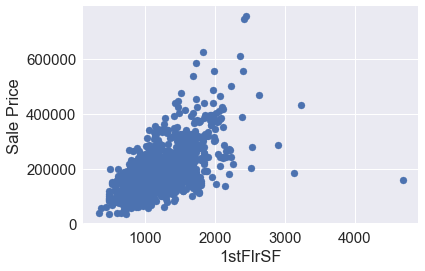

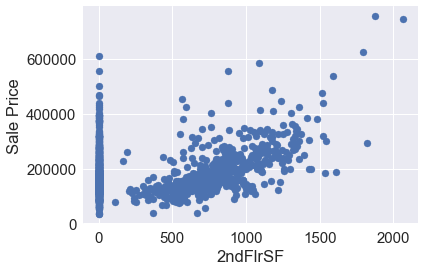

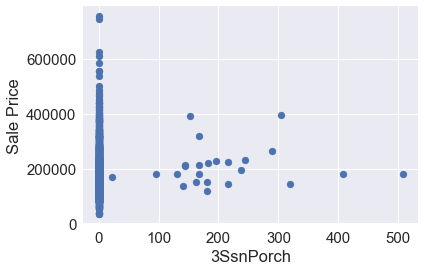

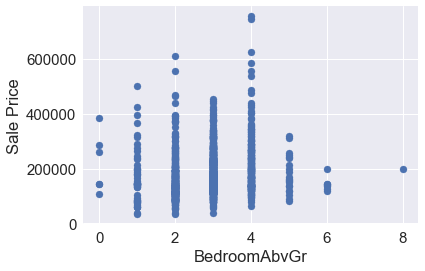

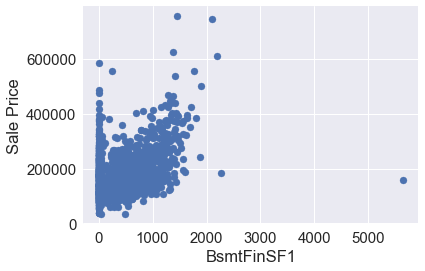

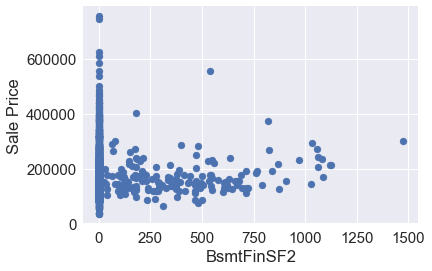

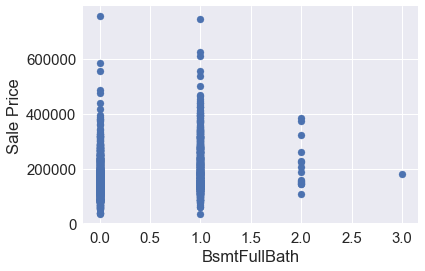

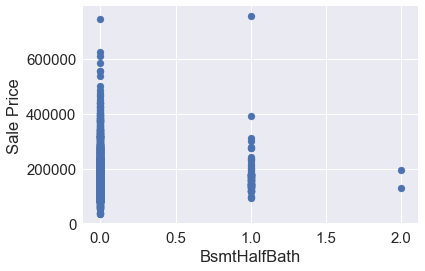

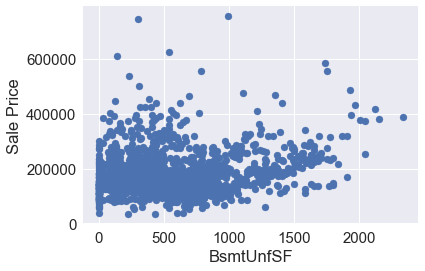

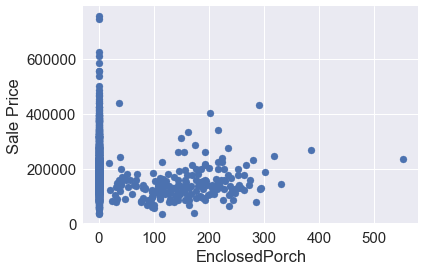

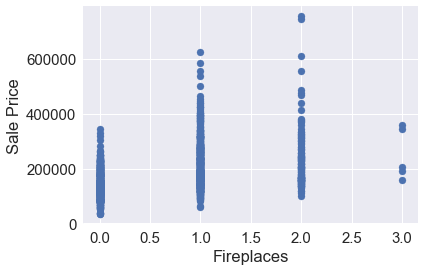

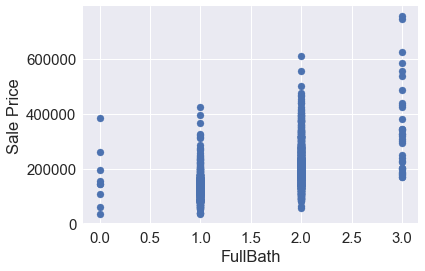

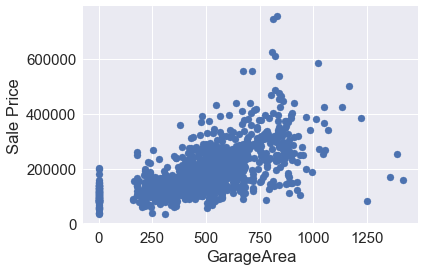

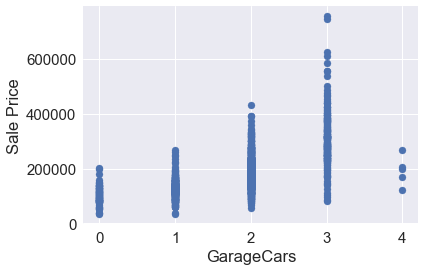

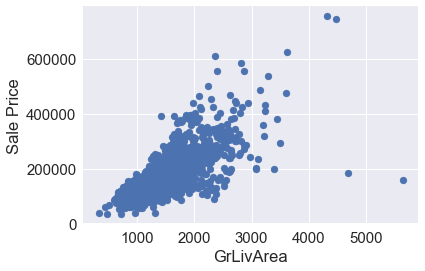

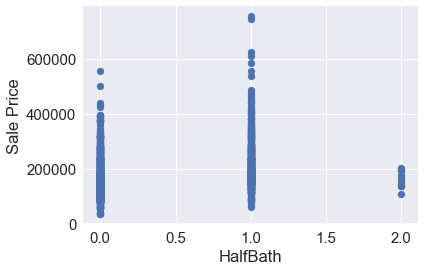

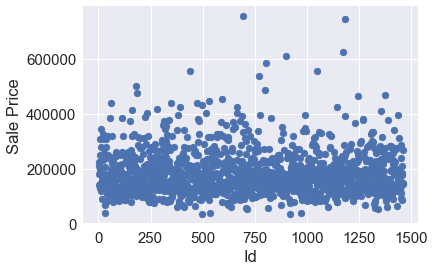

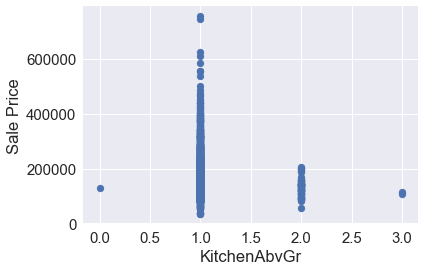

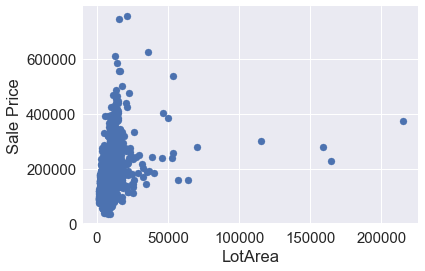

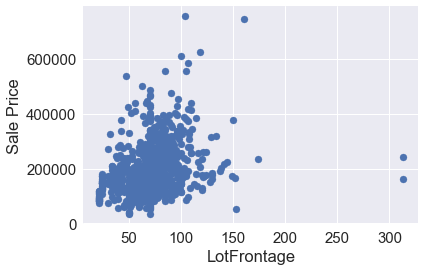

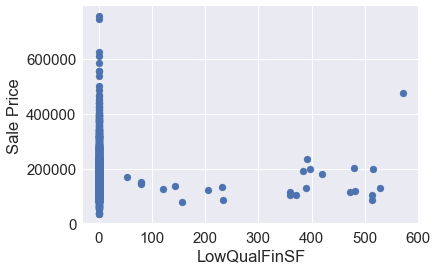

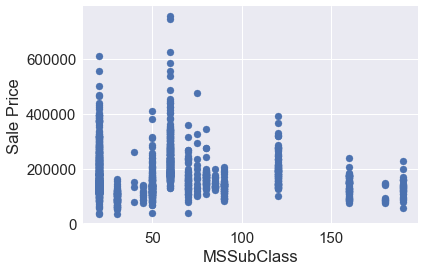

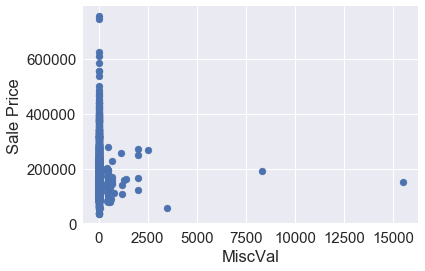

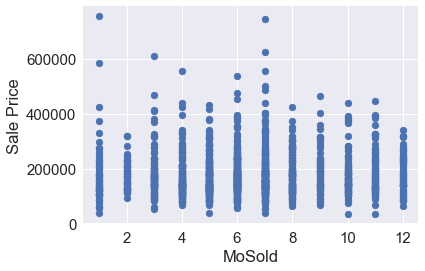

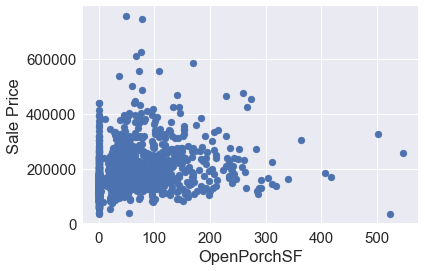

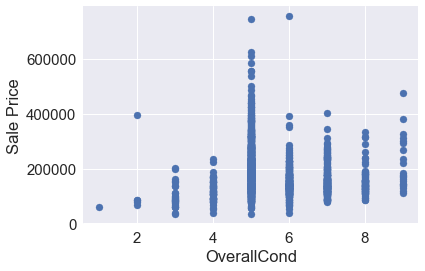

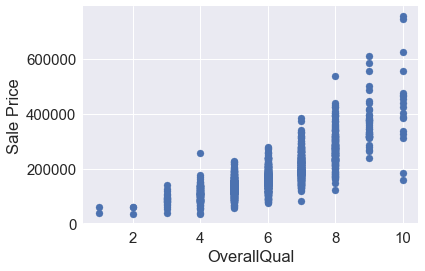

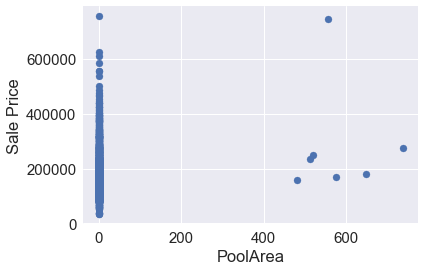

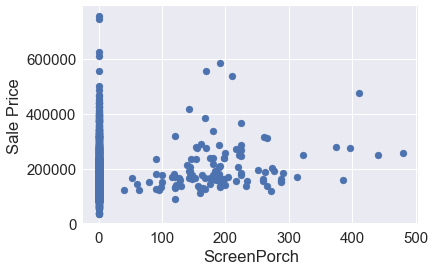

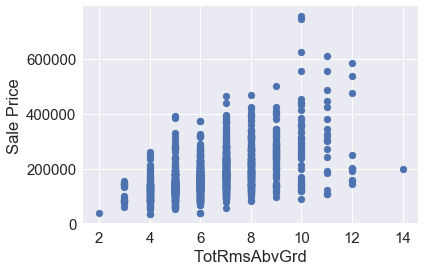

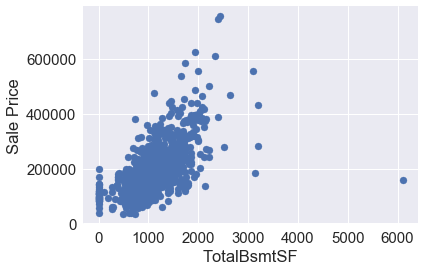

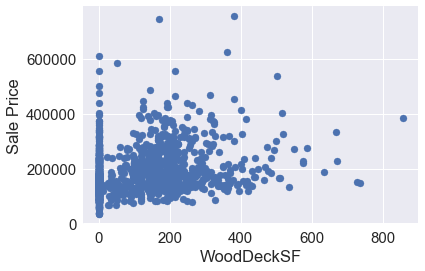

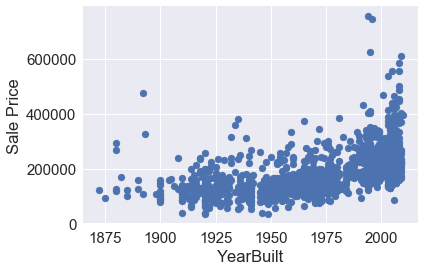

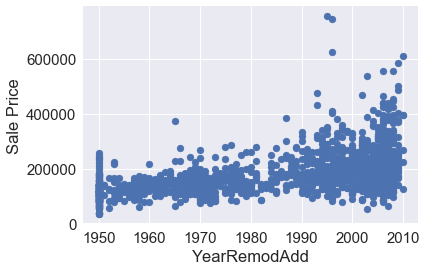

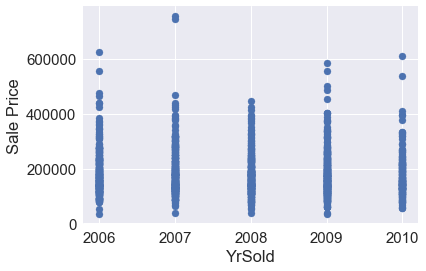

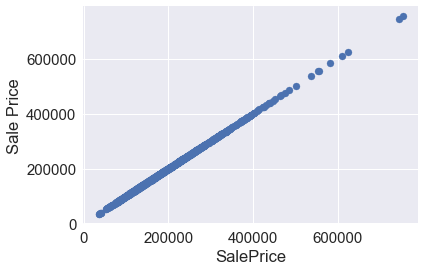

In [98]:

for colname, col in df_train.select_dtypes(include = ['int64','float64']).iteritems():
    plt.scatter(df_train[colname], df_train['SalePrice'])
    plt.ylabel('Sale Price')
    plt.xlabel(colname)
    plt.show()

From the above data, there are only one or two outliers in the entire dataset for the numeric features. i don;t think these are worth removing. SO now we can move onto fitting the benchmark model.

For my benchmark I will be running a simple Linear regression on a selection of features that I consider important based on domain knowledge.

In [99]:
df_lin_full = df_train[df_train.columns.difference(['SalePrice'])].append(df_test, ignore_index = False)
df_lin_full.shape

(2918, 63)

In [100]:
imp_feats = ['Id','GrLivArea','OverallQual','GarageCars','TotalBsmtSF','1stFlrSF','FullBath']
df_lin_full = df_lin_full[imp_feats]
df_lin_full.shape

(2918, 7)

In [101]:
df_lin_train = df_lin_full[:df_train.shape[0]]
df_lin_train.head(5)

Id  GrLivArea  OverallQual  GarageCars  TotalBsmtSF  1stFlrSF  FullBath
0   1       1710            7         2.0        856.0       856         2
1   2       1262            6         2.0       1262.0      1262         2
2   3       1786            7         2.0        920.0       920         2
3   4       1717            7         3.0        756.0       961         1
4   5       2198            8         3.0       1145.0      1145         2

In [102]:
df_lin_test = df_lin_full[df_train.shape[0]:]
df_lin_test.head(5)
df_lin_test.isnull().sum()

Id             0
GrLivArea      0
OverallQual    0
GarageCars     0
TotalBsmtSF    0
1stFlrSF       0
FullBath       0
dtype: int64

Now that the data has been preprocessed the next step will be to run a benchmark model.

########################################################################################################################################################################################################################################################

I will use the following rmse_cv() function that will use K-Fold Cross Validation to score the performance of a model on the training dataset. This will give me a way to score my own models and gauge their performance since the scoring on the test data will be done by Kaggle.

In [103]:
#Creating a scoring function to check mdoel performance using k-Fold Sampling of the training dataset
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

print('Done')

Done


############################################################################################################################

In [104]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# Log transforming the SalePrice variable since it is left skewed
X = df_lin_train.drop('Id',1)
y = np.log(df_train['SalePrice'])

lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
benchmark_model = pd.DataFrame(zip(X.columns,lm.coef_), columns = ['features','Model Coefficients'])
benchmark_model

features  Model Coefficients
0    GrLivArea            0.000173
1  OverallQual            0.125567
2   GarageCars            0.113717
3  TotalBsmtSF            0.000124
4     1stFlrSF            0.000038
5     FullBath            0.039277

In [106]:
#sns.pairplot(X, x_vars=['GrLivArea'], y_vars=y, size=7, aspect=0.7, kind='reg')

In [107]:
benchmark_pred = lm.predict(df_lin_test.drop('Id',1))
len(benchmark_pred)


1459

We will now write this submission to a csv and submit to the Kaggle page to get our logarithmic RMSE score

In [108]:
benchmark_sub = pd.DataFrame(np.exp(benchmark_pred), columns = ['SalePrice'])
benchmark_sub['Id'] = df_lin_test['Id']
#One of the Id values has become null. I will ahev to fill it back in
benchmark_sub.loc[benchmark_sub['Id'].isnull()].index.tolist()
benchmark_sub.ix[1379,'Id'] = 2840
benchmark_sub.ix[1375:1380,]

benchmark_sub['Id'] = benchmark_sub['Id'].astype('int64')
benchmark_sub.head(10)

SalePrice    Id
0  113286.306489  1461
1  148683.388484  1462
2  150880.737460  1463
3  170274.802658  1464
4  219112.118924  1465
5  167329.710889  1466
6  164851.297130  1467
7  162603.641306  1468
8  188678.709157  1469
9  111622.449339  1470

In [98]:
#writing to a csv file
benchmark_sub.to_csv('benchmark_submission.csv')

This submission was uploaded to the Kaggle competition page to score it and get the benchmark RMSE. The image is posted below:

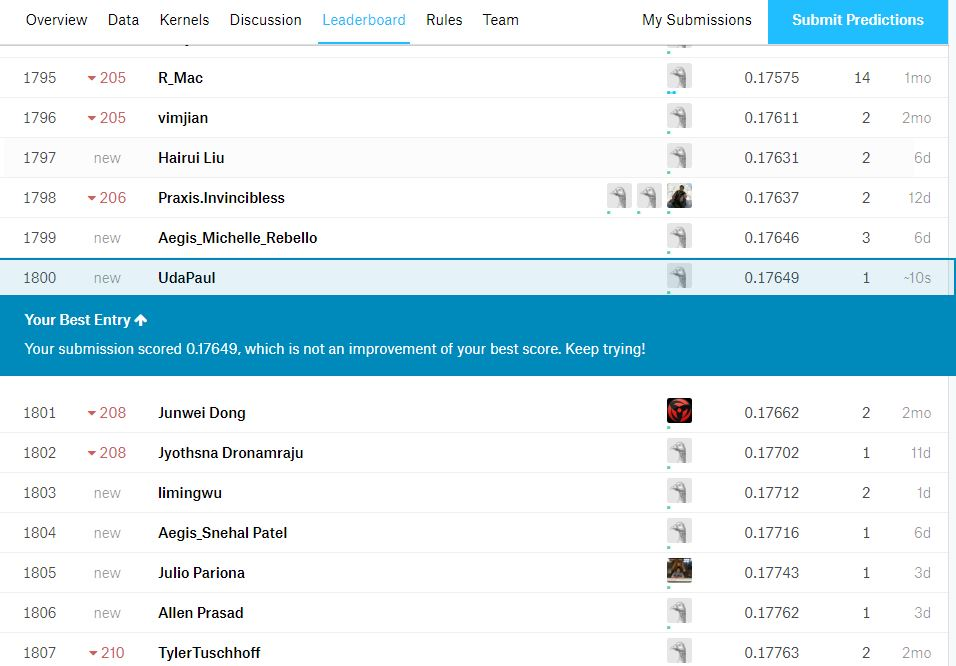

In [99]:
from IPython.display import Image
Image(filename='Benchmark_Sub.jpg')

We can see that our benchmark RMSE is 0.17649. The relative position is 1800 out of 2307 teams as of 2017-11-13 18:30.

########################################################################################################################################################################################################################################################

Now that the benchmark has been set, the next step is to work on creating a final optimized model. For this step I have shortlisted 3 approaches:
1. RandomForest with GridSearch Cross Validation as a stand alone result.
2. Gradient Bossted Trees with GridSearch Cross Validation as a stand alone result.
3. Lasso Regression to check if regularization improves the performance of the humble Linear regression.
4. Averaging the results from the above two models together OR using a weighted average of the results of the two models.

############################################################################################################################

RandomForest Model with GridSearch Cross Validation

In [106]:
df_fl = df_train[df_train.columns.difference(['SalePrice'])].append(df_test, ignore_index = False)
df_fl = pd.get_dummies(df_fl)
df_fl.head(10)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       856       854          0             3       706.0         0.0   
1      1262         0          0             3       978.0         0.0   
2       920       866          0             3       486.0         0.0   
3       961       756          0             3       216.0         0.0   
4      1145      1053          0             4       655.0         0.0   
5       796       566        320             1       732.0         0.0   
6      1694         0          0             3      1369.0         0.0   
7      1107       983          0             3       859.0        32.0   
8      1022       752          0             2         0.0         0.0   
9      1077         0          0             2       851.0         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch        ...         \
0           1.0           0.0      150.0              0        ...          
1           0.0           1.0      284.0              0        ...          
2           1.0           0.0      434.0              0        ...          
3           1.0           0.0      540.0            272        ...          
4           1.0           0.0      490.0              0        ...          
5           1.0           0.0       64.0              0        ...          
6           1.0           0.0      317.0              0        ...          
7           1.0           0.0      216.0            228        ...          
8           0.0           0.0      952.0            205        ...          
9           1.0           0.0      140.0              0        ...          

   SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0               0               0               0             0             0   
1               0               0               0             0             0   
2               0               0               0             0             0   
3               0               0               0             0             0   
4               0               0               0             0             0   
5               0               0               0             0             0   
6               0               0               0             0             0   
7               0               0               0             0             0   
8               0               0               0             0             0   
9               0               0               0             0             0   

   SaleType_WD  Street_Grvl  Street_Pave  Utilities_AllPub  Utilities_NoSeWa  
0            1            0            1                 1                 0  
1            1            0            1                 1                 0  
2            1            0            1                 1                 0  
3            1            0            1                 1                 0  
4            1            0            1                 1                 0  
5            1            0            1                 1                 0  
6            1            0            1                 1                 0  
7            1            0            1                 1                 0  
8            1            0            1                 1                 0  
9            1            0            1                 1                 0  

[10 rows x 222 columns]

In [107]:
df_train = df_fl[:df_train.shape[0]]
df_train['SalePrice'] = target_variable
df_test = df_fl[df_train.shape[0]:]

In [108]:
#pd.get_dummies(df_train).head(10)
df_train.head(10)
#df_train.shape
#df_test['LotFrontage']

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       856       854          0             3       706.0         0.0   
1      1262         0          0             3       978.0         0.0   
2       920       866          0             3       486.0         0.0   
3       961       756          0             3       216.0         0.0   
4      1145      1053          0             4       655.0         0.0   
5       796       566        320             1       732.0         0.0   
6      1694         0          0             3      1369.0         0.0   
7      1107       983          0             3       859.0        32.0   
8      1022       752          0             2         0.0         0.0   
9      1077         0          0             2       851.0         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch    ...      \
0           1.0           0.0      150.0              0    ...       
1           0.0           1.0      284.0              0    ...       
2           1.0           0.0      434.0              0    ...       
3           1.0           0.0      540.0            272    ...       
4           1.0           0.0      490.0              0    ...       
5           1.0           0.0       64.0              0    ...       
6           1.0           0.0      317.0              0    ...       
7           1.0           0.0      216.0            228    ...       
8           0.0           0.0      952.0            205    ...       
9           1.0           0.0      140.0              0    ...       

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   
5               0               0             0             0            1   
6               0               0             0             0            1   
7               0               0             0             0            1   
8               0               0             0             0            1   
9               0               0             0             0            1   

   Street_Grvl  Street_Pave  Utilities_AllPub  Utilities_NoSeWa  SalePrice  
0            0            1                 1                 0     208500  
1            0            1                 1                 0     181500  
2            0            1                 1                 0     223500  
3            0            1                 1                 0     140000  
4            0            1                 1                 0     250000  
5            0            1                 1                 0     143000  
6            0            1                 1                 0     307000  
7            0            1                 1                 0     200000  
8            0            1                 1                 0     129900  
9            0            1                 1                 0     118000  

[10 rows x 223 columns]

In [109]:
pd.get_dummies(df_test).head(10)
df_test.head(10)
#df_test.shape

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       896         0          0             2       468.0       144.0   
1      1329         0          0             3       923.0         0.0   
2       928       701          0             3       791.0         0.0   
3       926       678          0             3       602.0         0.0   
4      1280         0          0             2       263.0         0.0   
5       763       892          0             3         0.0         0.0   
6      1187         0          0             3       935.0         0.0   
7       789       676          0             3         0.0         0.0   
8      1341         0          0             2       637.0         0.0   
9       882         0          0             2       804.0        78.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch        ...         \
0           0.0           0.0      270.0              0        ...          
1           0.0           0.0      406.0              0        ...          
2           0.0           0.0      137.0              0        ...          
3           0.0           0.0      324.0              0        ...          
4           0.0           0.0     1017.0              0        ...          
5           0.0           0.0      763.0              0        ...          
6           1.0           0.0      233.0              0        ...          
7           0.0           0.0      789.0              0        ...          
8           1.0           0.0      663.0              0        ...          
9           1.0           0.0        0.0              0        ...          

   SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0               0               0               0             0             0   
1               0               0               0             0             0   
2               0               0               0             0             0   
3               0               0               0             0             0   
4               0               0               0             0             0   
5               0               0               0             0             0   
6               0               0               0             0             0   
7               0               0               0             0             0   
8               0               0               0             0             0   
9               0               0               0             0             0   

   SaleType_WD  Street_Grvl  Street_Pave  Utilities_AllPub  Utilities_NoSeWa  
0            1            0            1                 1                 0  
1            1            0            1                 1                 0  
2            1            0            1                 1                 0  
3            1            0            1                 1                 0  
4            1            0            1                 1                 0  
5            1            0            1                 1                 0  
6            1            0            1                 1                 0  
7            1            0            1                 1                 0  
8            1            0            1                 1                 0  
9            1            0            1                 1                 0  

[10 rows x 222 columns]

############################################################################################################################

The first approach will be using RandomForests (RF). RFs work by creating N number of 'fully grown' decision trees/estimators that have a Low Bias and High Variance and then averaging their results. These trees/estimators are uncorrelated so that the variance of the model is reduced i.e. it reduces error by minimizing variance. But the bias of the model will be bounded by the bias of the individual trees in the ensemble. As, a result this is a Low Variance and High Bias model. Normally the initial bias of the model is kept low by estimating with large trees that are unpruned.

In [232]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from random import seed

seed(124578)
enc = OneHotEncoder()
rfg = RandomForestRegressor()
tuned_parameters = {'n_estimators': [100, 150, 200, 250, 300, 400, 500, 700, 800, 1000], 'max_depth': [1, 2, 3], 'min_samples_split': [1.0, 2, 3]}

clf = GridSearchCV(rfg, tuned_parameters, cv=10, n_jobs=-1, verbose=1)


X_train = df_train.drop('SalePrice',1)
y_train = np.log(df_train['SalePrice'])
clf.fit(X_train, y_train )

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 18.3min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 400, 500, 700, 800, 1000], 'min_samples_split': [1.0, 2, 3], 'max_depth': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [233]:
rf_best = clf.best_estimator_
#plt.hist(rf_best.feature_importances_, label = df_test.columns)
rf_best

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [238]:
#Writing model to pickle file
filename = 'randomforest_model.sav'
pickle.dump(rf_best, open(filename, 'wb'))

In [239]:
#Loading model from pickle file
rf_model_load = pickle.load(open(filename, 'rb'))
rf_model_load

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [169]:
rf_best.fit(X_train, y_train)
print('Model Fitting done....')

Model Fitting done....


In [234]:
rf_rmse = rmsle_cv(rf_best)
rf_rmse.mean()

0.19574561285696407

In [170]:
rf_opt_pred = rf_best.predict(df_test)
print('Prediction with optimium model on test set done...')

Prediction with optimium model on test set done...


In [171]:
rf_sub = pd.DataFrame(np.exp(rf_opt_pred), columns = ['SalePrice'])
rf_sub['Id'] = df_test['Id']
rf_sub.head(10)

SalePrice    Id
0  127038.590453  1461
1  133420.211646  1462
2  163696.547540  1463
3  171180.937243  1464
4  234238.784445  1465
5  167113.968978  1466
6  138866.190884  1467
7  166668.517590  1468
8  193022.655999  1469
9  122606.143899  1470

In [839]:
#writing this result to a csv and making another submission
rf_sub.to_csv('rf_submission.csv')

This submission gives a score about 0.2 which indicates that the model might be overfitting due to errors in my suggested parameter grid.

############################################################################################################################

I decided to use the make_scorer to determine the best n_estimators to reduce the RMSE of the model.

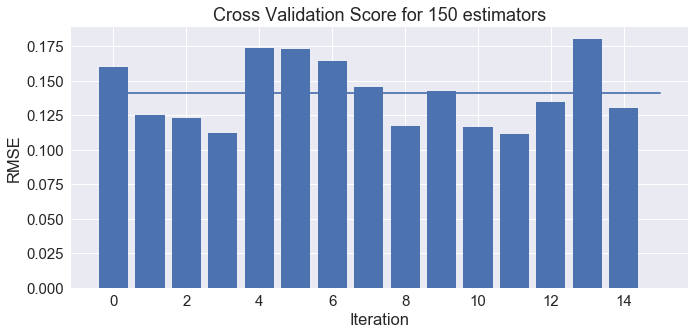

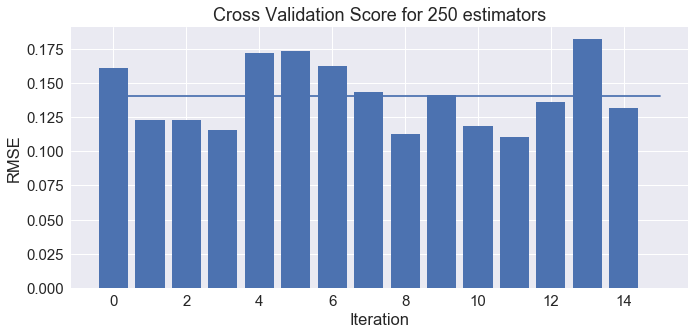

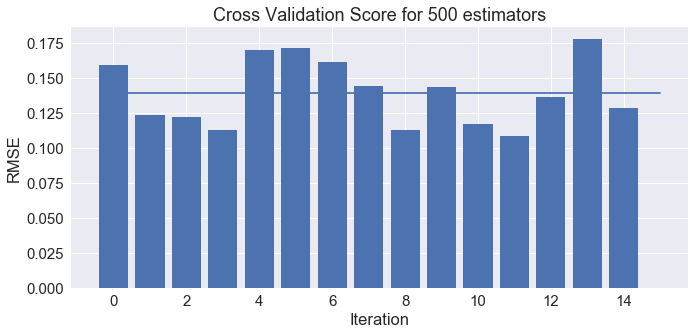

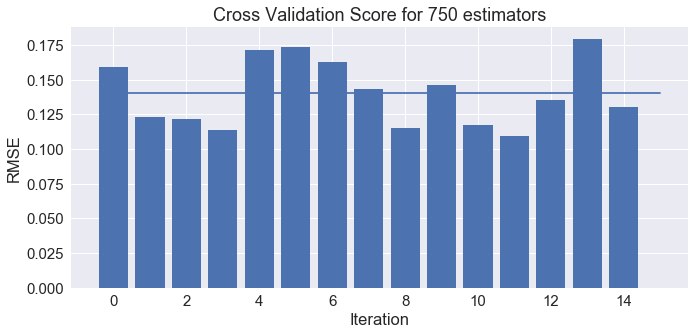

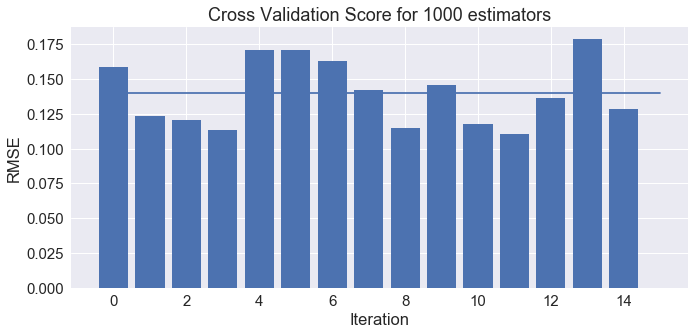

In [840]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.cross_validation import cross_val_score

rf_scorer = make_scorer(mean_squared_error, False)
n_est = [150,250,500,750,1000]

for i in n_est:
    rf_clf = RandomForestRegressor(n_estimators=i, n_jobs=-1)
    rf_cv_score = np.sqrt(-cross_val_score(estimator=rf_clf, X=X_train, y=y_train, cv=15, scoring = rf_scorer))

    plt.figure(figsize=(10,5))
    plt.bar(range(len(rf_cv_score)), rf_cv_score)
    plt.title('Cross Validation Score for '+ str(i) + " estimators")
    plt.ylabel('RMSE')
    plt.xlabel('Iteration')

    plt.plot(range(len(rf_cv_score) + 1), [rf_cv_score.mean()] * (len(rf_cv_score) + 1))
    plt.tight_layout()

Based on these plots an n_estimator of around 400 to 600 would be sufficient. The average RMSE values are approximately 0.14.

In [243]:
#rf_best = clf.best_estimator_
rf_best = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [244]:
#Writing model to pickle file
filename = 'randomforest_model.sav'
pickle.dump(rf_best, open(filename, 'wb'))

In [245]:
#Loading model from pickle file
rf_model_load = pickle.load(open(filename, 'rb'))
rf_model_load

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [246]:
rmsle_cv(rf_best).mean()

0.1424812017467626

In [842]:
rf_best.fit(X_train, y_train)
print('Model Fitting done....')

Model Fitting done....


In [843]:
rf_opt_pred = rf_best.predict(df_test)
print('Prediction with optimium model on test set done...')

Prediction with optimium model on test set done...


In [844]:
rf_sub = pd.DataFrame(np.exp(rf_opt_pred), columns = ['SalePrice'])
rf_sub['Id'] = df_test['Id']
rf_sub.head(10)

SalePrice    Id
0  126567.560981  1461
1  152771.779615  1462
2  176137.018113  1463
3  183061.022238  1464
4  197102.403994  1465
5  183379.209828  1466
6  164717.953281  1467
7  175840.924075  1468
8  182619.227074  1469
9  120605.737562  1470

In [845]:
#writing this result to a csv and making another submission
rf_sub.to_csv('rf_submission.csv')

This is submitted to Kaggle to generate the RMSE score. The score was 0.14544. This was a 21.4% improvement over the 0.17649 benchmark and raises my rank from 1800 to 1395 as of 2017-11-13 19:34. That is a jump of 408 up the ranks.

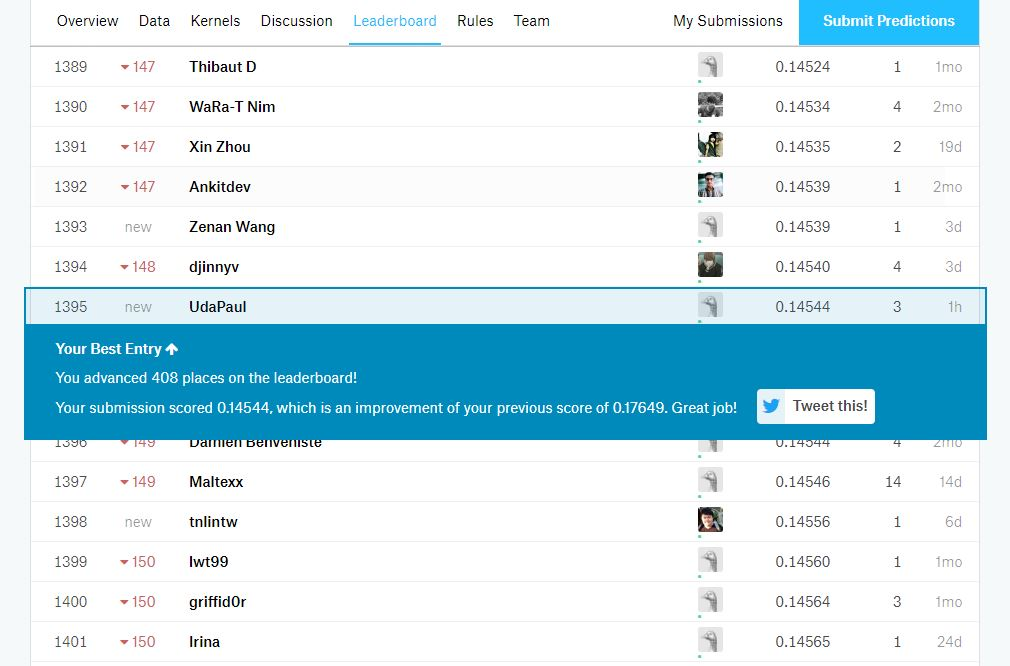

In [115]:
from IPython.display import Image
Image(filename='RF_N500_Sub.jpg')

############################################################################################################################

The next approach will be using the XGBoost model. Unlike Random Forests, Boosting works differently by using a bag of 'Weak Learners' i.e. trees with shallow depths or perhaps even simple decision stumps that have high bias and low variance. The aim is to reduce the error by minimizing the bias of the boosted model. Additionally by aggregating the results from the weak learners, Boosting is able to reduce variance to some extent as well.

In [ ]:
##########################################################################################################################

########################################################################################################################

In [104]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold

seed(235689)

xg_model = XGBRegressor()

#GridSearchCV
n_estimators = [50, 100, 150, 200, 250, 300, 500, 750, 1000]
max_depth = [2, 3, 4, 5, 6]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate = learning_rate)

k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
grid_search = GridSearchCV(xg_model, param_grid, scoring="neg_mean_squared_log_error", n_jobs=-1, cv=10, verbose=1)
print("GridSearch done ...")

GridSearch done ...


In [110]:
X_train = df_train.drop('SalePrice',1)
y_train = np.log(df_train['SalePrice'])
final_result = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 58.7min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 66.1min finished


In [111]:
print("Best: %f using %s" % (final_result.best_score_, final_result.best_params_))

Best: -0.000090 using {'n_estimators': 500, 'learning_rate': 0.2, 'max_depth': 2}


In [125]:
final_result.grid_scores_

[mean: -4.50929, std: 0.00969, params: {'n_estimators': 50, 'learning_rate': 0.0001, 'max_depth': 2},
 mean: -4.35755, std: 0.00956, params: {'n_estimators': 100, 'learning_rate': 0.0001, 'max_depth': 2},
 mean: -4.21426, std: 0.00944, params: {'n_estimators': 150, 'learning_rate': 0.0001, 'max_depth': 2},
 mean: -4.07869, std: 0.00932, params: {'n_estimators': 200, 'learning_rate': 0.0001, 'max_depth': 2},
 mean: -3.95024, std: 0.00921, params: {'n_estimators': 250, 'learning_rate': 0.0001, 'max_depth': 2},
 mean: -3.82833, std: 0.00909, params: {'n_estimators': 300, 'learning_rate': 0.0001, 'max_depth': 2},
 mean: -3.39694, std: 0.00865, params: {'n_estimators': 500, 'learning_rate': 0.0001, 'max_depth': 2},
 mean: -2.95780, std: 0.00816, params: {'n_estimators': 750, 'learning_rate': 0.0001, 'max_depth': 2},
 mean: -2.60074, std: 0.00771, params: {'n_estimators': 1000, 'learning_rate': 0.0001, 'max_depth': 2},
 mean: -4.50929, std: 0.00969, params: {'n_estimators': 50, 'learning_rat

In [250]:
final_xgb_model = final_result.best_estimator_
final_xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [128]:
print('Beginning Model Fitting....')
final_xgb_model.fit(X_train, y_train)
print('Model fitting completed...')

Beginning Model Fitting....
Model fitting completed...


In [263]:
#Writing model to pickle file
filename = 'xgboost_model.sav'
pickle.dump(final_xgb_model, open(filename, 'wb'))

In [264]:
#Loading model from pickle file
xg_model_load = pickle.load(open('xgboost_model.sav', 'rb'))
xg_model_load

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=nan, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [251]:
rmsle_cv(final_xgb_model).mean()

0.1273398676231188

In [129]:
xgb_pred = final_xgb_model.predict(df_test)
print('Prediction with optimium model on test set done...')

Prediction with optimium model on test set done...


In [133]:
xgb_sub = pd.DataFrame(np.exp(xgb_pred), columns = ['SalePrice'])
xgb_sub['Id'] = df_test['Id']
xgb_sub.head(10)

SalePrice    Id
0  121341.210938  1461
1  161283.671875  1462
2  195942.671875  1463
3  193405.906250  1464
4  190142.671875  1465
5  180305.593750  1466
6  164580.812500  1467
7  174187.453125  1468
8  179692.593750  1469
9  124722.992188  1470

In [161]:
#writing this result to a csv and making another submission
xgb_sub.to_csv('xgb_submission.csv')

This XGB model was Cross Validated using k-fold Cross Validation and the best parameters were estimated. The best model was fitted to the training data and then used to predict on the test dataset. The RMSE for this model was 0.14029, a 25.8% increase over our benchmark score of 0.17649. In term's of relative performance, over the 1800 rank achieved by the benchmark, the XGBoost model has achieved the highest rank so far of 1318 as of 2017-11-14 15:57.

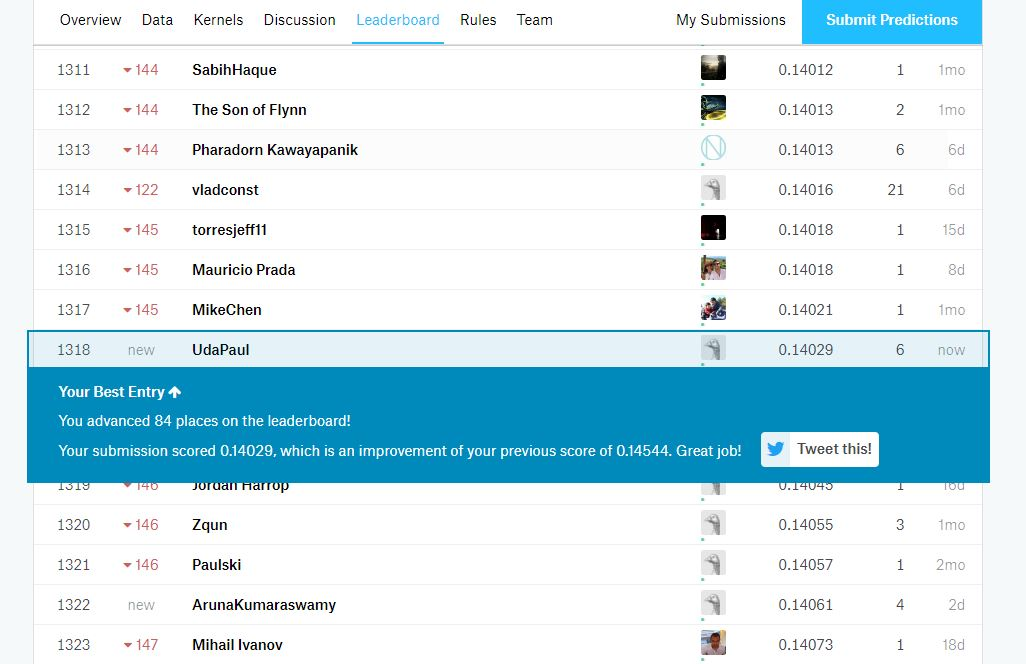

In [135]:
from IPython.display import Image
Image(filename='XGB_Sub.jpg')

In [142]:
datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')

'2017-11-14 15:57:49'

############################################################################################################################

I will now run a Lasso Regression on the data

In [116]:
from sklearn.linear_model import Lasso
from sklearn.grid_search import GridSearchCV

seed(785623)

lasso_model = Lasso()

#GridSearchCV
alpha = [0.0001, 0.0002, 0.0003, 0.0004,0.0005,0.0006,0.007, 0.0008,0.0009,0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09, 0.1, 0.2, 0.3,0.4]
param_grid_ls = param_grid = dict(alpha=alpha)

grid_search_ls = GridSearchCV(lasso_model, param_grid_ls, scoring="neg_mean_squared_error", n_jobs=-1, cv=15, verbose=1)
print("GridSearch done ...")



GridSearch done ...


In [117]:
X_train = df_train.drop('SalePrice',1)
y_train = np.log(df_train['SalePrice'])
final_result_ls = grid_search_ls.fit(X_train, y_train)

Fitting 15 folds for each of 31 candidates, totalling 465 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 465 out of 465 | elapsed:  3.1min finished


In [118]:
final_lasso_model = final_result_ls.best_estimator_
final_lasso_model

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [119]:
final_result_ls.grid_scores_

[mean: -0.02122, std: 0.01965, params: {'alpha': 0.0001},
 mean: -0.02059, std: 0.01995, params: {'alpha': 0.0002},
 mean: -0.02030, std: 0.02004, params: {'alpha': 0.0003},
 mean: -0.02021, std: 0.02022, params: {'alpha': 0.0004},
 mean: -0.02025, std: 0.02034, params: {'alpha': 0.0005},
 mean: -0.02037, std: 0.02046, params: {'alpha': 0.0006},
 mean: -0.02678, std: 0.02383, params: {'alpha': 0.007},
 mean: -0.02073, std: 0.02057, params: {'alpha': 0.0008},
 mean: -0.02100, std: 0.02051, params: {'alpha': 0.0009},
 mean: -0.02131, std: 0.02043, params: {'alpha': 0.001},
 mean: -0.02341, std: 0.02139, params: {'alpha': 0.002},
 mean: -0.02449, std: 0.02247, params: {'alpha': 0.003},
 mean: -0.02522, std: 0.02296, params: {'alpha': 0.004},
 mean: -0.02581, std: 0.02323, params: {'alpha': 0.005},
 mean: -0.02633, std: 0.02358, params: {'alpha': 0.006},
 mean: -0.02678, std: 0.02383, params: {'alpha': 0.007},
 mean: -0.02703, std: 0.02392, params: {'alpha': 0.008},
 mean: -0.02719, std: 0

In [266]:
#Writing model to pickle file
filename = 'lasso_model.sav'
pickle.dump(final_lasso_model, open(filename, 'wb'))

In [268]:
#Loading model from pickle file
ls_model_load = pickle.load(open('lasso_model.sav', 'rb'))
ls_model_load

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [255]:
rmsle_cv(final_lasso_model).mean()

0.13771555329290702

In [110]:
print('Beginning Model Fitting....')
final_lasso_model.fit(X_train, y_train)
print('Model fitting completed...')

Beginning Model Fitting....
Model fitting completed...


In [111]:
lasso_pred = final_lasso_model.predict(df_test)
print('Prediction with optimium model on test set done...')

Prediction with optimium model on test set done...


In [112]:
lasso_sub = pd.DataFrame(np.exp(lasso_pred), columns = ['SalePrice'])
lasso_sub['Id'] = df_test['Id']
lasso_sub.head(10)

SalePrice    Id
0  119476.635218  1461
1  145010.856875  1462
2  172693.333895  1463
3  196725.496865  1464
4  198360.531318  1465
5  168639.663449  1466
6  188311.048111  1467
7  161526.544814  1468
8  183930.461005  1469
9  120370.194446  1470

In [160]:
#writing this result to a csv and making another submission
lasso_sub.to_csv('lasso_submission.csv')

This Lasso model was Cross Validated using k-fold Cross Validation and the best parameters were estimated. The best model was fitted to the training data and then used to predict on the test dataset. The RMSE for this model was 0.12671, approximately a 40% increase over our benchmark score of 0.17649. In term's of relative performance, over the 1800 rank achieved by the benchmark, the XGBoost model has achieved the highest rank so far of 902, up from XGB's 1318, as of 2017-11-14 16:45.

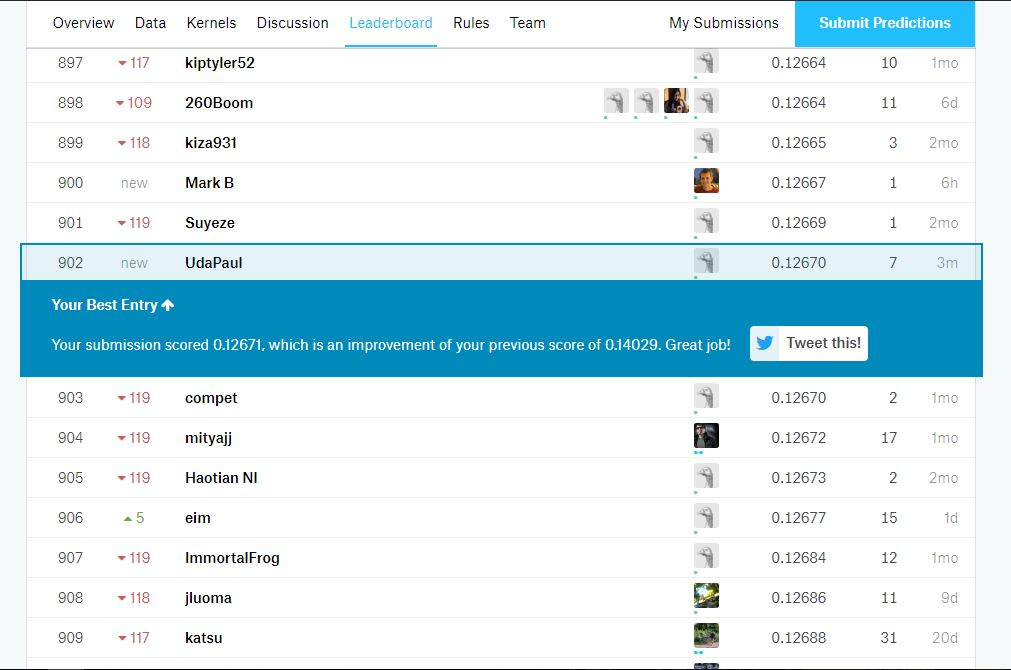

In [162]:
from IPython.display import Image
Image(filename='Lasso_Sub.jpg')

############################################################################################################################

Hence, so far I have trained a series of models and tested their Logarithmic RMSE scores using the Kaggle Submission portal. In conclusion, I will use a stacked regression model by taking a weighted average of the two best models, the XGBoost and the Lasso Regression, and checking it's performance against the individual models' Logarithmic RMSE scores. The model performance summary has been shown below in the figure:

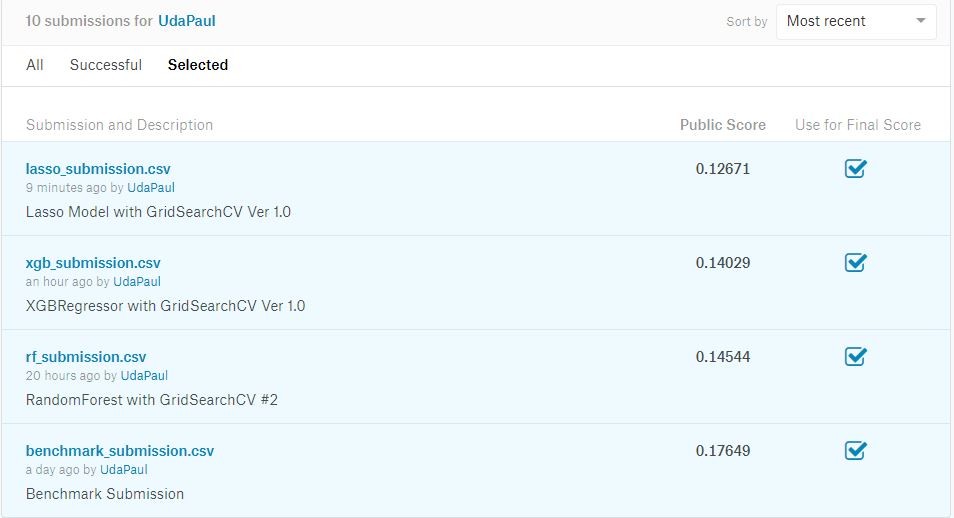

In [163]:
from IPython.display import Image
Image(filename='Final_Models.jpg')

############################################################################################################################

Summarizing all the models and their performances. I will create two dictionaries of the models. One with their Cross Validated RMSLE and one with their Test score RMSLE values from Kaggle. A visulaiztion will help compare them, as well as trace my progress.

In [104]:
#Loading saved models from pickle files
rf_model_load = pickle.load(open('randomforest_model.sav', 'rb'))
xg_model_load = pickle.load(open('xgboost_model.sav', 'rb'))
ls_model_load = pickle.load(open('lasso_model.sav', 'rb'))

In [105]:
ls_model_load

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [106]:
X_train = df_train.drop('SalePrice',1)
y_train = np.log(df_train['SalePrice'])
X_train.head(10)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType  BsmtFinSF1  \
0       856       854          0             3     1Fam       706.0   
1      1262         0          0             3     1Fam       978.0   
2       920       866          0             3     1Fam       486.0   
3       961       756          0             3     1Fam       216.0   
4      1145      1053          0             4     1Fam       655.0   
5       796       566        320             1     1Fam       732.0   
6      1694         0          0             3     1Fam      1369.0   
7      1107       983          0             3     1Fam       859.0   
8      1022       752          0             2     1Fam         0.0   
9      1077         0          0             2   2fmCon       851.0   

   BsmtFinSF2  BsmtFullBath  BsmtHalfBath  BsmtUnfSF   ...   SaleType  \
0         0.0           1.0           0.0      150.0   ...         WD   
1         0.0           0.0           1.0      284.0   ...         WD   
2         0.0           1.0           0.0      434.0   ...         WD   
3         0.0           1.0           0.0      540.0   ...         WD   
4         0.0           1.0           0.0      490.0   ...         WD   
5         0.0           1.0           0.0       64.0   ...         WD   
6         0.0           1.0           0.0      317.0   ...         WD   
7        32.0           1.0           0.0      216.0   ...         WD   
8         0.0           0.0           0.0      952.0   ...         WD   
9         0.0           1.0           0.0      140.0   ...         WD   

  ScreenPorch Street TotRmsAbvGrd  TotalBsmtSF Utilities WoodDeckSF YearBuilt  \
0           0   Pave            8        856.0    AllPub          0      2003   
1           0   Pave            6       1262.0    AllPub        298      1976   
2           0   Pave            6        920.0    AllPub          0      2001   
3           0   Pave            7        756.0    AllPub          0      1915   
4           0   Pave            9       1145.0    AllPub        192      2000   
5           0   Pave            5        796.0    AllPub         40      1993   
6           0   Pave            7       1686.0    AllPub        255      2004   
7           0   Pave            7       1107.0    AllPub        235      1973   
8           0   Pave            8        952.0    AllPub         90      1931   
9           0   Pave            5        991.0    AllPub          0      1939   

  YearRemodAdd  YrSold  
0         2003    2008  
1         1976    2007  
2         2002    2008  
3         1970    2006  
4         2000    2008  
5         1995    2009  
6         2005    2007  
7         1973    2009  
8         1950    2008  
9         1950    2008  

[10 rows x 63 columns]

In [116]:
raw_data = {'Models': ['Benchmark Linear regression', 'Random Forest Regressor', 'XGBoost Regressor', 'Lasso Regularized Linear Regression'],
        'train_rmsle_score': [0,rmsle_cv(rf_model_load).mean(),rmsle_cv(xg_model_load).mean(),rmsle_cv(ls_model_load).mean()],
        'test_rmsle_score': [0.17649,0.14544,0.14029,0.12671]}
df = pd.DataFrame(raw_data, columns = ['Models', 'train_rmsle_score', 'test_rmsle_score'])
df.shape

(4, 3)

In [117]:
1-df['train_rmsle_score']

0    1.000000
1    0.857756
2    0.872660
3    0.862284
Name: train_rmsle_score, dtype: float64

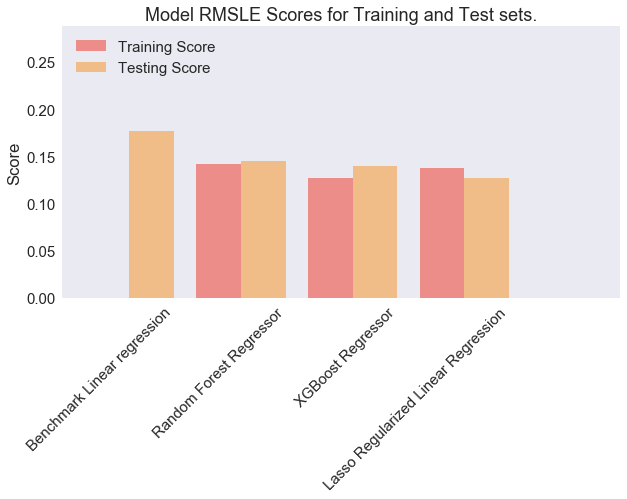

In [118]:
# Setting the positions and width for the bars
pos = list(range(len(df['train_rmsle_score']))) 
width = 0.4 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with train_rmsle_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['train_rmsle_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['Models'][0]) 

# Create a bar with test_rmsle_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['test_rmsle_score'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['Models'][1]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Model RMSLE Scores for Training and Test sets.')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Models'], rotation=45, ha='right')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['train_rmsle_score'] + df['test_rmsle_score'])])

# Adding the legend and showing the plot
plt.legend(['Training Score', 'Testing Score'], loc='upper left')
plt.grid()
plt.show()

In [119]:
accuracies = pd.DataFrame(df['Models'])
accuracies['Train_accuracy'] = 1 - df['train_rmsle_score']
accuracies['Test_accuracy'] = 1 - df['test_rmsle_score']
accuracies.ix[0,'Train_accuracy'] = 0
accuracies

Models  Train_accuracy  Test_accuracy
0          Benchmark Linear regression        0.000000        0.82351
1              Random Forest Regressor        0.857756        0.85456
2                    XGBoost Regressor        0.872660        0.85971
3  Lasso Regularized Linear Regression        0.862284        0.87329

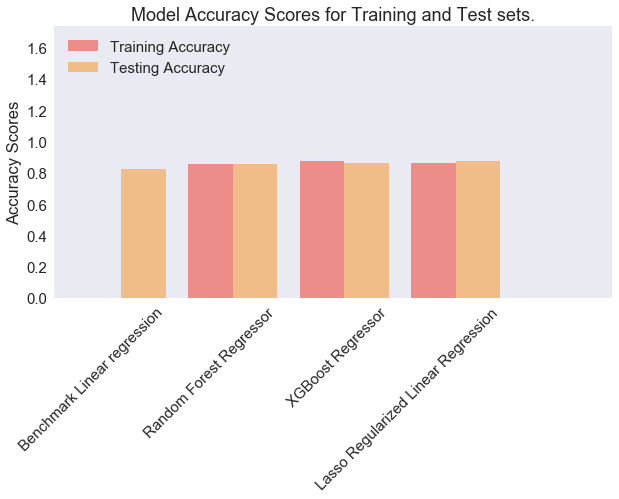

In [125]:
# Setting the positions and width for the bars
pos = list(range(len(accuracies['Train_accuracy']))) 
width = 0.4 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with train_rmsle_score data,
# in position pos,
plt.bar(pos, 
        #using accuracies['Train_accuracy'] data,
        accuracies['Train_accuracy'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=accuracies['Models'][0]) 

# Create a bar with test_rmsle_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using accuracies['Test_accuracy'] data,
        accuracies['Test_accuracy'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=accuracies['Models'][1]) 

# Set the y axis label
ax.set_ylabel('Accuracy Scores')

# Set the chart's title
ax.set_title('Model Accuracy Scores for Training and Test sets.')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(accuracies['Models'], rotation=45, ha='right')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(accuracies['Train_accuracy'] + accuracies['Test_accuracy'])])

# Adding the legend and showing the plot
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper left')
plt.grid()
plt.show()

I can see from these plots that the overall RMSLE scores have progressively reduced with time which is good news. On the whole, the XGBoost has performed better on the training data compared to the test set, which was what I expected. Surprsingly the Lasso regression model has performed slightly better on the Test set compared to the Training set. It seems like a weighted average of these two may or may not improve my score.

In [120]:
#fitting the three models to the training data
rf_model_load.fit(X_train, y_train)
print('Random Forest model fitted')
xg_model_load.fit(X_train, y_train)
print('XGBoost model fitted')
ls_model_load.fit(X_train, y_train)
print('Lasso model fitted')

Random Forest model fitted
XGBoost model fitted
Lasso model fitted


In [121]:
#Generating predictions on the test data for the three models loaded from pickle data files.
rf_pred_wa = rf_model_load.predict(df_test)
xg_pred_wa = xg_model_load.predict(df_test)
ls_pred_wa = ls_model_load.predict(df_test)
rf_pred_wa

array([ 11.75271254,  11.94187926,  12.07729196, ...,  11.95548711,
        11.64301437,  12.35888743])

In [122]:
#Generating predictions on the test data for the three models loaded from pickle data files.
#rf_pred_wat = np.exp(rf_model_load.predict(X_train))
#xg_pred_wat = np.exp(xg_model_load.predict(X_train))
#ls_pred_wat = np.exp(ls_model_load.predict(X_train))

rf_pred_wat = rf_model_load.predict(X_train)
xg_pred_wat = xg_model_load.predict(X_train)
ls_pred_wat = ls_model_load.predict(X_train)

In [123]:
#Defining a rmse calculator to check training accuracy
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [124]:
x1 = rf_pred_wa
x2 = xg_pred_wa
x3 = ls_pred_wa
#y_actual = np.exp(y_train)

#df_stack = pd.DataFrame(x1,x2,x3,y_actual, columns=['RandomForest','XGBoost','LassoRegression','ActualValues'])
df_stack_tst = pd.DataFrame(x1,columns=['RandomForest'])
df_stack_tst['XGBoost'] = x2
df_stack_tst['LassoRegression'] = x3
#df_stack_tst['ActualValues'] = y_train
df_stack_tst.head(5)

RandomForest    XGBoost  LassoRegression
0     11.752713  11.706362        11.690876
1     11.941879  11.990920        11.884564
2     12.077292  12.185577        12.059273
3     12.110061  12.172546        12.189565
4     12.193918  12.155530        12.197842

In [125]:
y1 = rf_pred_wat
y2 = xg_pred_wat
y3 = ls_pred_wat
#y_actual = np.exp(y_train)

#df_stack = pd.DataFrame(x1,x2,x3,y_actual, columns=['RandomForest','XGBoost','LassoRegression','ActualValues'])
df_stack_trn = pd.DataFrame(x1,columns=['RandomForest'])
df_stack_trn['XGBoost'] = y2
df_stack_trn['LassoRegression'] = y3
df_stack_trn['ActualValues'] = y_train
df_stack_trn.head(5)

RandomForest    XGBoost  LassoRegression  ActualValues
0     11.752713  12.236493        12.250856     12.247694
1     11.941879  12.102070        12.127488     12.109011
2     12.077292  12.244861        12.265879     12.317167
3     12.110061  11.890103        12.056431     11.849398
4     12.193918  12.465961        12.587916     12.429216

In [126]:
results = pd.DataFrame(columns=['XGBoost Weight','Lasso Weight','Training RMSLE'])
results['XGBoost Weight'] = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
results['Lasso Weight'] = [1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]
results

XGBoost Weight  Lasso Weight Training RMSLE
0              0.0           1.0            NaN
1              0.1           0.9            NaN
2              0.2           0.8            NaN
3              0.3           0.7            NaN
4              0.4           0.6            NaN
5              0.5           0.5            NaN
6              0.6           0.4            NaN
7              0.7           0.3            NaN
8              0.8           0.2            NaN
9              0.9           0.1            NaN
10             1.0           0.0            NaN

In [127]:
wghts = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
index = [0,1,2,3,4,5,6,7,8,9]

dfr = []
x = 0
for i in wghts:
    stacked1 =  (df_stack_trn['XGBoost']*i + df_stack_trn['LassoRegression']*(1.0-i))
    r = rmsle(y_train,stacked1)
    dfr.append(r)
    #results.ix[index,'Lasso Weight'] = (1.0-i)
    #results.ix[index,'Training RMSLE'] = r
    
#stacked1.head(5)
dfr

[0.106871410590232,
 0.10021749433662396,
 0.093729518346549176,
 0.087444424421776204,
 0.081409222405108381,
 0.075683706403259152,
 0.070343547124049832,
 0.065483085264512728,
 0.061216691224334076,
 0.057676340879130254,
 0.055002419088321437]

In [128]:
results['Training RMSLE'] = dfr
results

XGBoost Weight  Lasso Weight  Training RMSLE
0              0.0           1.0        0.106871
1              0.1           0.9        0.100217
2              0.2           0.8        0.093730
3              0.3           0.7        0.087444
4              0.4           0.6        0.081409
5              0.5           0.5        0.075684
6              0.6           0.4        0.070344
7              0.7           0.3        0.065483
8              0.8           0.2        0.061217
9              0.9           0.1        0.057676
10             1.0           0.0        0.055002

From this table I can see that the XGBoost model performs better on the training set. The RMSLE score reduces as the weight on the XGBoost model increases. From the earlier bar plots we had seen that the XGBoost model had a higher RMSLE score for the training set than the test set. This might be due to some level of overfitting since the XGBoost model was cross validated on the training set. The Lasso model does have a lower RMSLE error for the test set compared to the Training set. Hence I feel like it should have a slightly higher weightage than 0.0. I will test the RMSLE scores for the test data from Kaggle for the following stacked models:

Model 1 :: XGBoost(0.9) + Lasso(0.1)
Model 2 :: XGBoost(0.7) + Lasso(0.3)
Model 3 :: XGBoost(0.6) + Lasso(0.4)
Model 4 :: XGBoost(0.2) + Lasso(0.8)

In [135]:
i = 0.9
model_1 = df_stack_tst['XGBoost']*i + df_stack_tst['LassoRegression']*(1.0-i)
#odel_1 = np.exp(model_1)
stack_pred_1 = pd.DataFrame(np.exp(model_1), columns = ['SalePrice'])
stack_pred_1['Id'] = df_test['Id']
stack_pred_1.to_csv('Stacked_Model_1.csv')
stack_pred_1.head(5)

SalePrice    Id
0  121153.450198  1461
1  159577.431104  1462
2  193483.273822  1463
3  193735.326461  1464
4  190948.845035  1465

In [136]:
i = 0.7
model_2 = df_stack_tst['XGBoost']*i + df_stack_tst['LassoRegression']*(1.0-i)
#odel_1 = np.exp(model_1)
stack_pred_2 = pd.DataFrame(np.exp(model_2), columns = ['SalePrice'])
stack_pred_2['Id'] = df_test['Id']
stack_pred_2.to_csv('Stacked_Model_2.csv')
stack_pred_2.head(5)

SalePrice    Id
0  120778.802423  1461
1  156218.898934  1462
2  188657.063068  1463
3  194395.856490  1464
4  192571.642872  1465

In [137]:
i = 0.6
model_3 = df_stack_tst['XGBoost']*i + df_stack_tst['LassoRegression']*(1.0-i)
#odel_1 = np.exp(model_1)
stack_pred_3 = pd.DataFrame(np.exp(model_3), columns = ['SalePrice'])
stack_pred_3['Id'] = df_test['Id']
stack_pred_3.to_csv('Stacked_Model_3.csv')
stack_pred_3.head(5)

SalePrice    Id
0  120591.970714  1461
1  154566.233463  1462
2  186289.202355  1463
3  194727.058393  1464
4  193388.206305  1465

In [138]:
i = 0.2
model_4 = df_stack_tst['XGBoost']*i + df_stack_tst['LassoRegression']*(1.0-i)
#odel_1 = np.exp(model_1)
stack_pred_4 = pd.DataFrame(np.exp(model_4), columns = ['SalePrice'])
stack_pred_4['Id'] = df_test['Id']
stack_pred_4.to_csv('Stacked_Model_4.csv')
stack_pred_4.head(5)

SalePrice    Id
0  119847.243757  1461
1  148128.463953  1462
2  177111.288414  1463
3  196057.051043  1464
4  196689.044408  1465

Next I uploaded each of these four models to Kaggle to get the test data RMSLE scores. Honestly I did not expect to see a drastic improvement, but i still wanted to explore how stacking/combining the models would affect the overall performance.

The output of all 4 stacked models are shown below:

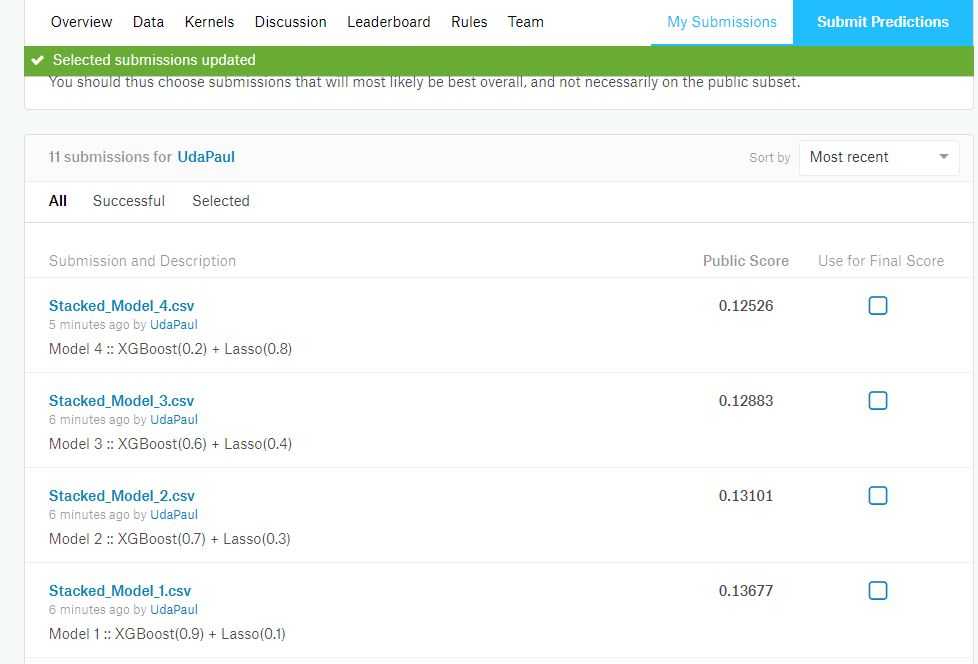

In [331]:
from IPython.display import Image
Image(filename='All_Stacked.jpg')

The output for the 4th Stacked model is hown below. It socred the best at 0.12526, a 40.5% improvement over the benchmark score of 0.17649. This model advanced me in terms of relative scoring by 76 places from the previous best performance of 0.12671 achieved by the Lasso Regression.

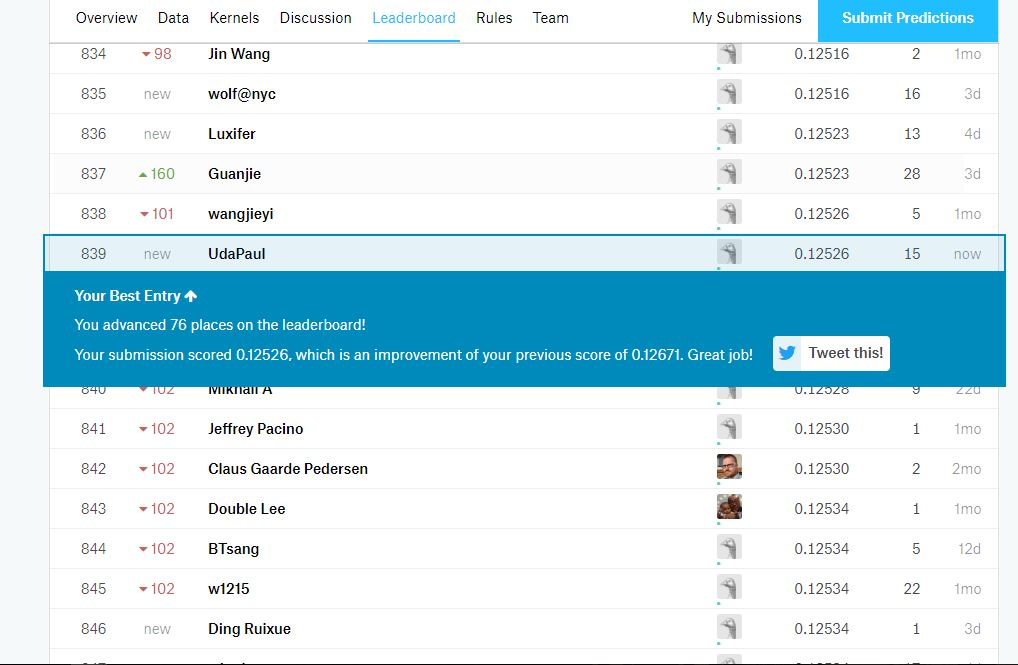

In [330]:
from IPython.display import Image
Image(filename='Stackd_Model_4.jpg')

The 4th stacked model was the best amongst them all. Just to be sure I will check one more Stacked model with the following configuration:
Model 5 :: XGBoost(0.1) + Lasso(0.9)

In [139]:
i = 0.1
model_5 = df_stack_tst['XGBoost']*i + df_stack_tst['LassoRegression']*(1.0-i)
#odel_1 = np.exp(model_1)
stack_pred_5 = pd.DataFrame(np.exp(model_5), columns = ['SalePrice'])
stack_pred_5['Id'] = df_test['Id']
stack_pred_5.to_csv('Stacked_Model_5.csv')
stack_pred_5.head(5)

SalePrice    Id
0  119661.796010  1461
1  146561.371055  1462
2  174888.361153  1463
3  196390.989560  1464
4  197523.019806  1465

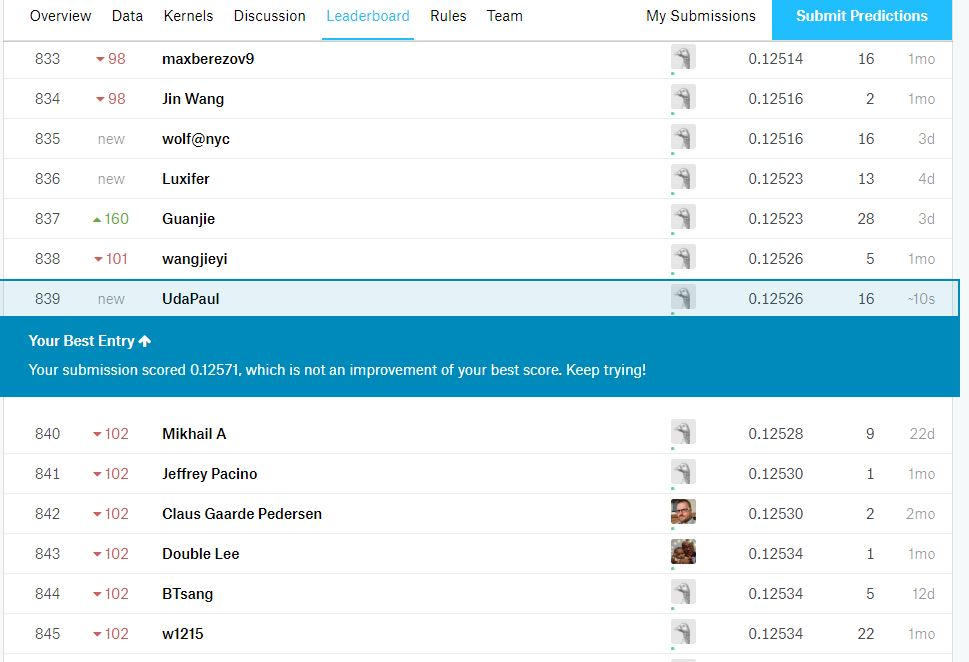

In [333]:
from IPython.display import Image
Image(filename='Stackd_Model_5.jpg')

This did not improve the score so it makes more sense to explore models which are some more in between the Lasso and XGBoost mdoels.The next model will be an averaged out:
Model 6 :: XGBoost(0.5) + Lasso(0.5)

In [140]:
i = 0.5
model_6 = df_stack_tst['XGBoost']*i + df_stack_tst['LassoRegression']*(1.0-i)
#odel_1 = np.exp(model_1)
stack_pred_6 = pd.DataFrame(np.exp(model_6), columns = ['SalePrice'])
stack_pred_6['Id'] = df_test['Id']
stack_pred_6.to_csv('Stacked_Model_6.csv')
stack_pred_6.head(5)

SalePrice    Id
0  120405.313186  1461
1  152930.978889  1462
2  183951.060987  1463
3  195058.638559  1464
4  194208.139613  1465

This did not improve the score. Stacked Model 6 had a score of 0.12714.
I will now check two more configurations:
Model 7 :: XGBoost(0.3) + Lasso(0.7)
Model 8 :: XGBoost(0.4) + Lasso(0.6)

In [141]:
i = 0.3
model_7 = df_stack_tst['XGBoost']*i + df_stack_tst['LassoRegression']*(1.0-i)
#odel_1 = np.exp(model_1)
stack_pred_7 = pd.DataFrame(np.exp(model_7), columns = ['SalePrice'])
stack_pred_7['Id'] = df_test['Id']
stack_pred_7.to_csv('Stacked_Model_7.csv')
stack_pred_7.head(5)

SalePrice    Id
0  120033.007524  1461
1  149712.330683  1462
2  179362.491685  1463
3  195723.727012  1464
4  195858.590195  1465

In [142]:
i = 0.4
model_8 = df_stack_tst['XGBoost']*i + df_stack_tst['LassoRegression']*(1.0-i)
#odel_1 = np.exp(model_1)
stack_pred_8 = pd.DataFrame(np.exp(model_8), columns = ['SalePrice'])
stack_pred_8['Id'] = df_test['Id']
stack_pred_8.to_csv('Stacked_Model_8.csv')
stack_pred_8.head(5)

SalePrice    Id
0  120219.001900  1461
1  151313.096866  1462
2  181642.265952  1463
3  195390.876508  1464
4  195031.642299  1465

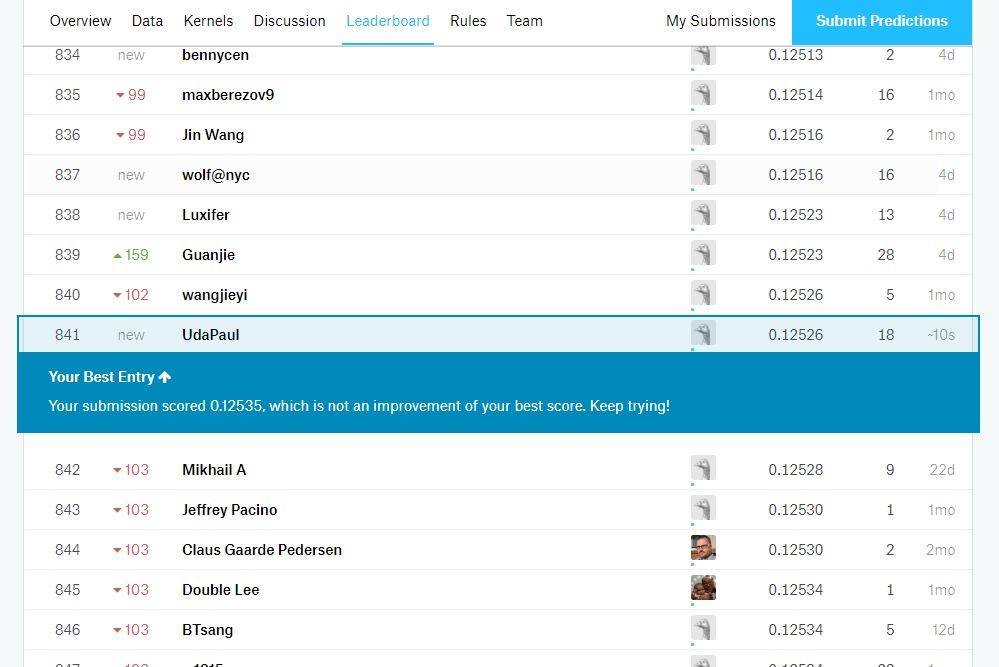

In [344]:
#Model 7 :: XGBoost(0.3) + Lasso(0.7)
from IPython.display import Image
Image(filename='Stackd_Model_7.jpg')

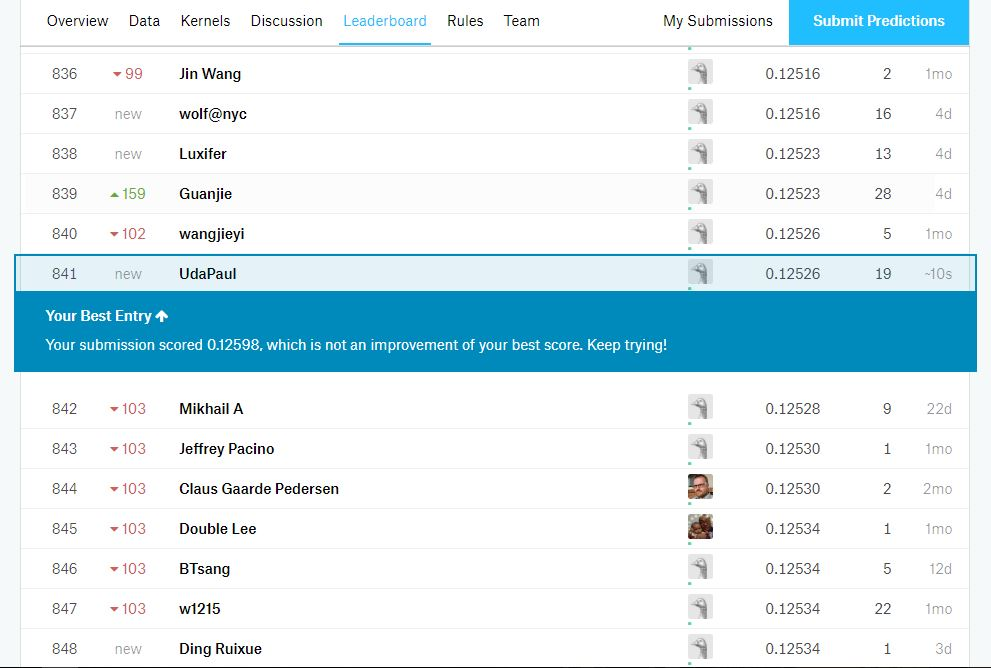

In [345]:
#Model 8 :: XGBoost(0.4) + Lasso(0.6)
from IPython.display import Image
Image(filename='Stackd_Model_8.jpg')

As a final step will create some visualizations to summarize the test data RMSLE scores obtained from Kaggle. I will also use a plot of predictions on the training data superimposed on the training response label using the best performer which was  the Stacked Model no.4

In [143]:
i = 0.2
stacked_pred_trn = df_stack_trn['XGBoost']*i + df_stack_trn['LassoRegression']*(1.0-i)

pred_comp1 = pd.DataFrame(np.exp(stacked_pred_trn), columns = ['Stacked Predicted_SalePrice'])
pred_comp1['Actual_SalePrice'] = target_variable
pred_comp1['Id'] = df_test['Id']
pred_comp1.head(5)

Stacked Predicted_SalePrice  Actual_SalePrice    Id
0                208560.356059            208500  1461
1                183947.197075            181500  1462
2                211435.609472            223500  1463
3                166569.132092            140000  1464
4                285936.521642            250000  1465

In [144]:

stacked_pred_trn_ls = ls_model_load.predict(X_train)

pred_comp2 = pd.DataFrame(np.exp(stacked_pred_trn_ls), columns = ['Lasso Predicted_SalePrice'])
pred_comp2['Actual_SalePrice'] = target_variable
pred_comp2['Id'] = df_test['Id']
pred_comp2.head(5)

Lasso Predicted_SalePrice  Actual_SalePrice    Id
0              209160.303284            208500  1461
1              184884.681240            181500  1462
2              212326.284587            223500  1463
3              172203.325604            140000  1464
4              292996.472359            250000  1465

In [147]:

stacked_pred_trn_lm = lm.predict(df_lin_test.drop('Id',1))

pred_comp3 = pd.DataFrame(np.exp(stacked_pred_trn_lm), columns = ['Benchmark Predicted_SalePrice'])
pred_comp3['Actual_SalePrice'] = target_variable
pred_comp3['Id'] = df_test['Id']
pred_comp3.head(5)

Benchmark Predicted_SalePrice  Actual_SalePrice    Id
0                  113286.306489            208500  1461
1                  148683.388484            181500  1462
2                  150880.737460            223500  1463
3                  170274.802658            140000  1464
4                  219112.118924            250000  1465

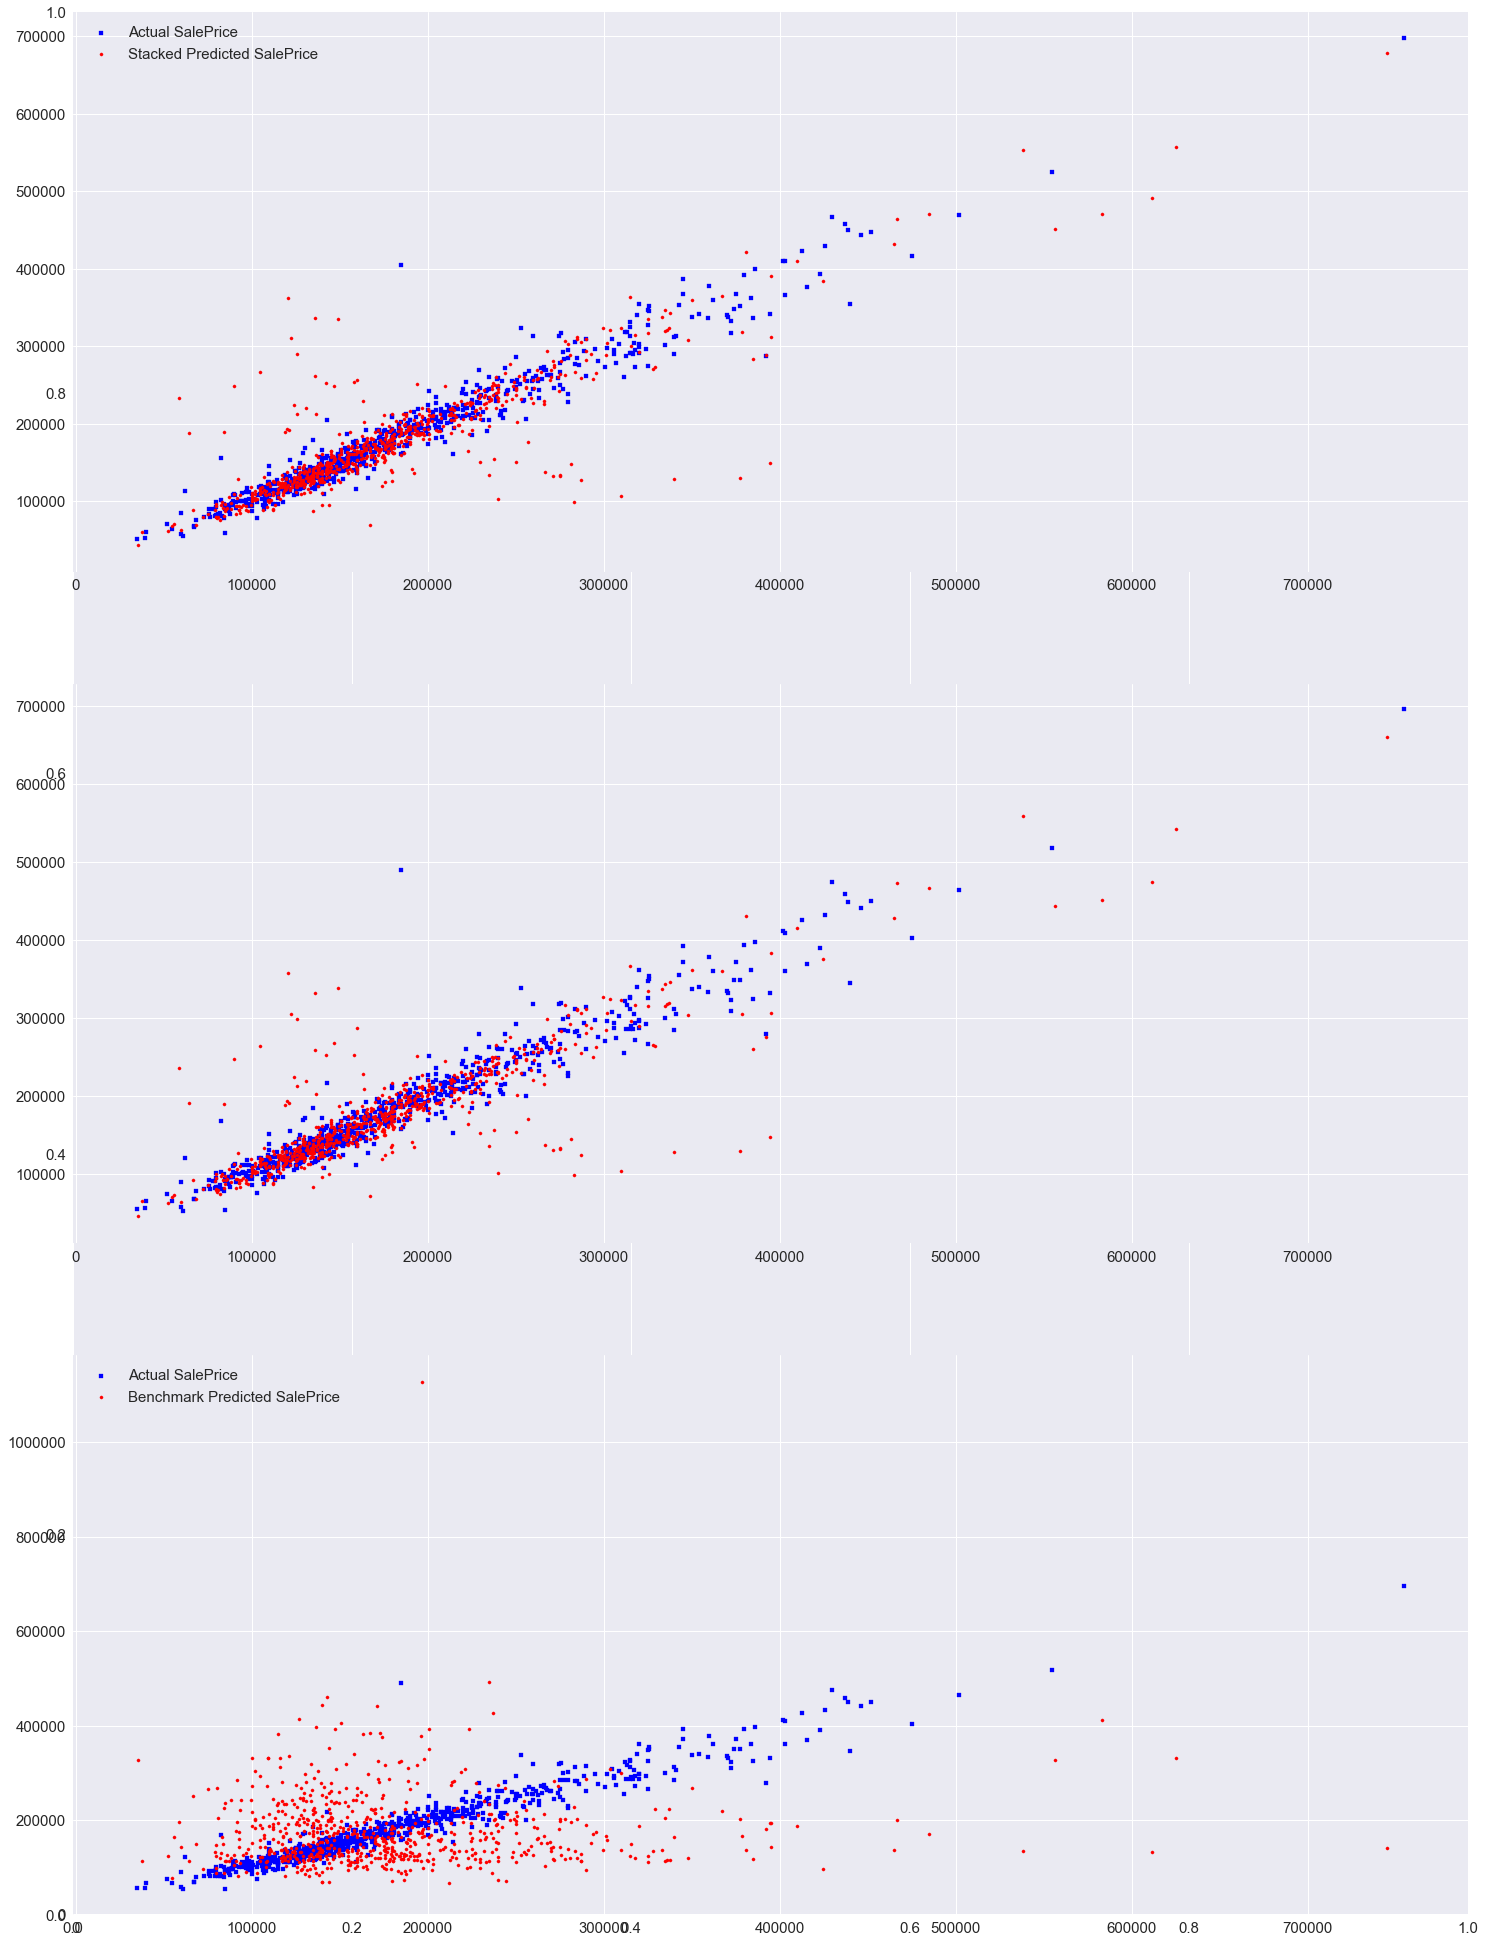

In [149]:
#Plotting these results to check how the model fot's the training data
x = pred_comp1['Actual_SalePrice']
y = pred_comp1['Stacked Predicted_SalePrice']
z = pred_comp2['Lasso Predicted_SalePrice']
w = pred_comp3['Benchmark Predicted_SalePrice']
ids = pred_comp1.shape[0]/2
fig,ax1 = plt.subplots(figsize=(25,35))

ax1 = fig.add_subplot(311)
ax1.scatter(x[:ids], y[:ids], s=10, c='b', marker="s", label='Actual SalePrice')
ax1.scatter(x[ids:],y[ids:], s=10, c='r', marker="o", label='Stacked Predicted SalePrice')
plt.legend(loc='upper left');

ax1 = fig.add_subplot(312)
ax1.scatter(x[:ids], z[:ids], s=10, c='b', marker="s", label='Actual SalePrice')
ax1.scatter(x[ids:],z[ids:], s=10, c='r', marker="o", label='Lasso Predicted SalePrice')

ax1 = fig.add_subplot(313)
ax1.scatter(x[:ids], z[:ids], s=10, c='b', marker="s", label='Actual SalePrice')
ax1.scatter(x[ids:],w[ids:], s=10, c='r', marker="o", label='Benchmark Predicted SalePrice')

plt.legend(loc='upper left');

plt.show()

I can see from these plots that both the stacked and Lasso mooels had good fits to the training data while the Benchmark model had a very low degree of fit. These observations were reinforced by the RMSLE scores on the test data. I will also use a bar chart to depict the progression of the test set RMSLE scores obtained from Kaggle for all the models I trained.

In [130]:
final_df_models = ['Benchmark Model','Random Forest Try 1','Random Forest Try 2','Gradient Boosting XGBoost','Lasso Regression','Stacked Model 1 :: XGBoost(0.9) + Lasso(0.1)','Stacked Model 2 :: XGBoost(0.7) + Lasso(0.3)','Stacked Model 3 :: XGBoost(0.6) + Lasso(0.4)','Stacked Model 4 :: XGBoost(0.2) + Lasso(0.8)','Stacked Model 5 :: XGBoost(0.1) + Lasso(0.9)','Stacked Model 6 :: XGBoost(0.5) + Lasso(0.5)','Stacked Model 7 :: XGBoost(0.3) + Lasso(0.7)','Stacked Model 8 :: XGBoost(0.4) + Lasso(0.6)']
final_df_scores = [0.17649,0.20190,0.14544,0.14029,0.12671,0.13677,0.13101,0.12883,0.12526,0.12571,0.12714,0.12535,0.12598]

final_sum_df = pd.DataFrame(np.column_stack([final_df_models, final_df_scores]),columns = ['Models','Test data RMSLE from Kaggle'])

final_sum_df['Test data RMSLE from Kaggle'] = final_sum_df['Test data RMSLE from Kaggle'].astype('float64')
final_sum_df

Models  Test data RMSLE from Kaggle
0                                Benchmark Model                      0.17649
1                            Random Forest Try 1                      0.20190
2                            Random Forest Try 2                      0.14544
3                      Gradient Boosting XGBoost                      0.14029
4                               Lasso Regression                      0.12671
5   Stacked Model 1 :: XGBoost(0.9) + Lasso(0.1)                      0.13677
6   Stacked Model 2 :: XGBoost(0.7) + Lasso(0.3)                      0.13101
7   Stacked Model 3 :: XGBoost(0.6) + Lasso(0.4)                      0.12883
8   Stacked Model 4 :: XGBoost(0.2) + Lasso(0.8)                      0.12526
9   Stacked Model 5 :: XGBoost(0.1) + Lasso(0.9)                      0.12571
10  Stacked Model 6 :: XGBoost(0.5) + Lasso(0.5)                      0.12714
11  Stacked Model 7 :: XGBoost(0.3) + Lasso(0.7)                      0.12535
12  Stacked Model 8 :: XGBoost(0.4) + Lasso(0.6)                      0.12598

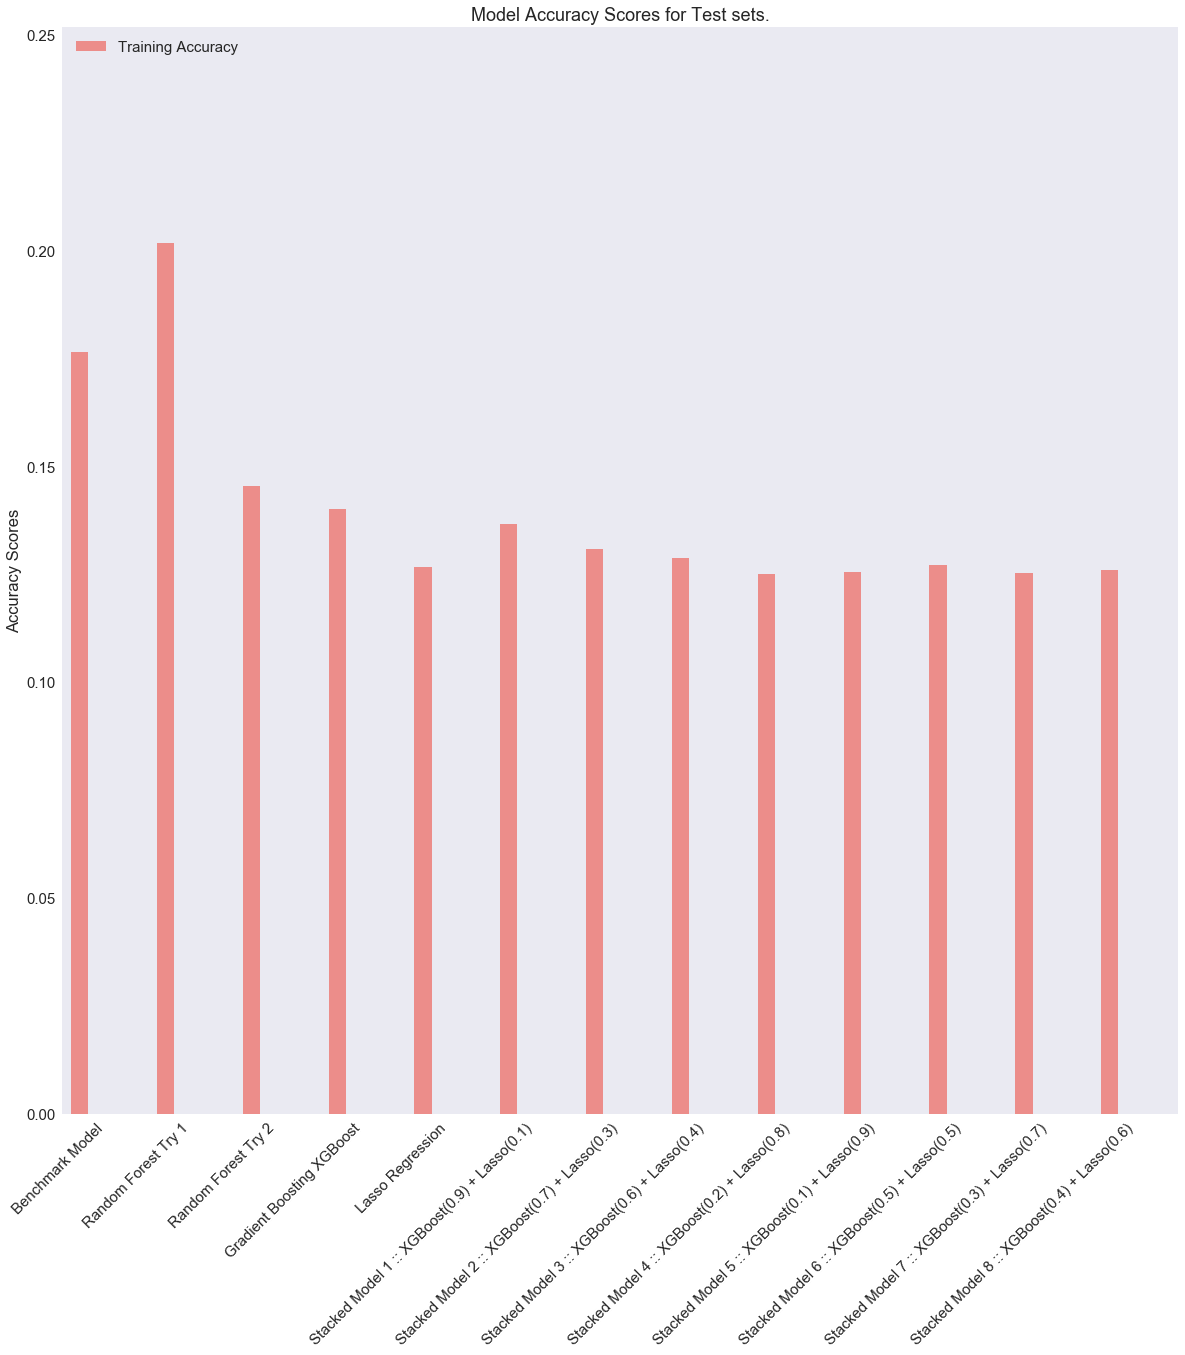

In [185]:
pos = list(range(len(final_sum_df['Models']))) 
width = 0.2 

# Plotting the bars
fig, ax = plt.subplots(figsize=(20,20))

# Create a bar with train_rmsle_score data,
# in position pos,
plt.bar(pos, 
        #using accuracies['Train_accuracy'] data,
        final_sum_df['Test data RMSLE from Kaggle'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=final_sum_df['Models'][0]) 



# Set the y axis label
ax.set_ylabel('Accuracy Scores')

# Set the chart's title
ax.set_title('Model Accuracy Scores for Test sets.')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(final_sum_df['Models'], rotation=45, ha='right')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 0.05+max(final_sum_df['Test data RMSLE from Kaggle'])])

# Adding the legend and showing the plot
plt.legend(['Training Accuracy'], loc='upper left')
plt.grid()
plt.show()

In [155]:
lasso_coef = ls_model_load.coef_

In [159]:
lasso_cols = X_train.columns
lasso_cols.shape

(222L,)

In [168]:
lasso_df = pd.DataFrame(np.column_stack([lasso_cols,lasso_coef]), columns = ['Feature','Lasso Coefficient'])
lasso_df.sort_values(by ='Lasso Coefficient', ascending = False).head(25)

Feature Lasso Coefficient
167  Neighborhood_Crawfor          0.111982
183  Neighborhood_StoneBr         0.0967219
177  Neighborhood_NridgHt         0.0767032
116        Functional_Typ         0.0685115
76    Exterior1st_BrkFace         0.0608658
26            OverallQual         0.0594323
136        KitchenQual_Ex         0.0517885
44        Condition1_Norm         0.0478576
182  Neighborhood_Somerst         0.0445438
165  Neighborhood_ClearCr         0.0415725
13             GarageCars         0.0410513
25            OverallCond         0.0410417
148     LotConfig_CulDSac         0.0387781
6            BsmtFullBath         0.0357381
176  Neighborhood_NoRidge         0.0333464
164  Neighborhood_BrkSide         0.0293501
36        BldgType_2fmCon         0.0275068
123          HeatingQC_Ex         0.0274382
10             Fireplaces         0.0270841
106      Foundation_PConc         0.0268771
145         LandSlope_Mod         0.0257899
119          Heating_GasW         0.0240859
207  SaleCondition_Normal         0.0212228
68           ExterCond_TA         0.0193664
11               FullBath         0.0191352

In [155]:
final_df_models1 = ['Benchmark Model','Random Forest Try 1','Random Forest Try 2','Gradient Boosting XGBoost','Lasso Regression','Stacked Model 1 :: XGBoost(0.9) + Lasso(0.1)','Stacked Model 2 :: XGBoost(0.7) + Lasso(0.3)','Stacked Model 3 :: XGBoost(0.6) + Lasso(0.4)','Stacked Model 4 :: XGBoost(0.2) + Lasso(0.8)','Stacked Model 5 :: XGBoost(0.1) + Lasso(0.9)','Stacked Model 6 :: XGBoost(0.5) + Lasso(0.5)','Stacked Model 7 :: XGBoost(0.3) + Lasso(0.7)','Stacked Model 8 :: XGBoost(0.4) + Lasso(0.6)']
final_df_scores1 = [0.17649,0.20190,0.14544,0.14029,0.12671,0.13677,0.13101,0.12883,0.12526,0.12571,0.12714,0.12535,0.12598]
final_df_ranks1 = [1800,1800,1395,1318,902,902,902,902,839,839,839,839,839]

final_sum_df1 = pd.DataFrame(np.column_stack([final_df_models1, final_df_scores1, final_df_ranks1]),columns = ['Models','Test data RMSLE from Kaggle','Leadership Board Ranking'])

final_sum_df1['Test data RMSLE from Kaggle'] = final_sum_df1['Test data RMSLE from Kaggle'].astype('float64')
final_sum_df1['Leadership Board Ranking'] = final_sum_df1['Leadership Board Ranking'].astype('int64')

final_sum_df1.sort_values(by = 'Leadership Board Ranking', ascending = False)
final_sum_df1

Models  Test data RMSLE from Kaggle  \
0                                Benchmark Model                      0.17649   
1                            Random Forest Try 1                      0.20190   
2                            Random Forest Try 2                      0.14544   
3                      Gradient Boosting XGBoost                      0.14029   
4                               Lasso Regression                      0.12671   
5   Stacked Model 1 :: XGBoost(0.9) + Lasso(0.1)                      0.13677   
6   Stacked Model 2 :: XGBoost(0.7) + Lasso(0.3)                      0.13101   
7   Stacked Model 3 :: XGBoost(0.6) + Lasso(0.4)                      0.12883   
8   Stacked Model 4 :: XGBoost(0.2) + Lasso(0.8)                      0.12526   
9   Stacked Model 5 :: XGBoost(0.1) + Lasso(0.9)                      0.12571   
10  Stacked Model 6 :: XGBoost(0.5) + Lasso(0.5)                      0.12714   
11  Stacked Model 7 :: XGBoost(0.3) + Lasso(0.7)                      0.12535   
12  Stacked Model 8 :: XGBoost(0.4) + Lasso(0.6)                      0.12598   

    Leadership Board Ranking  
0                       1800  
1                       1800  
2                       1395  
3                       1318  
4                        902  
5                        902  
6                        902  
7                        902  
8                        839  
9                        839  
10                       839  
11                       839  
12                       839

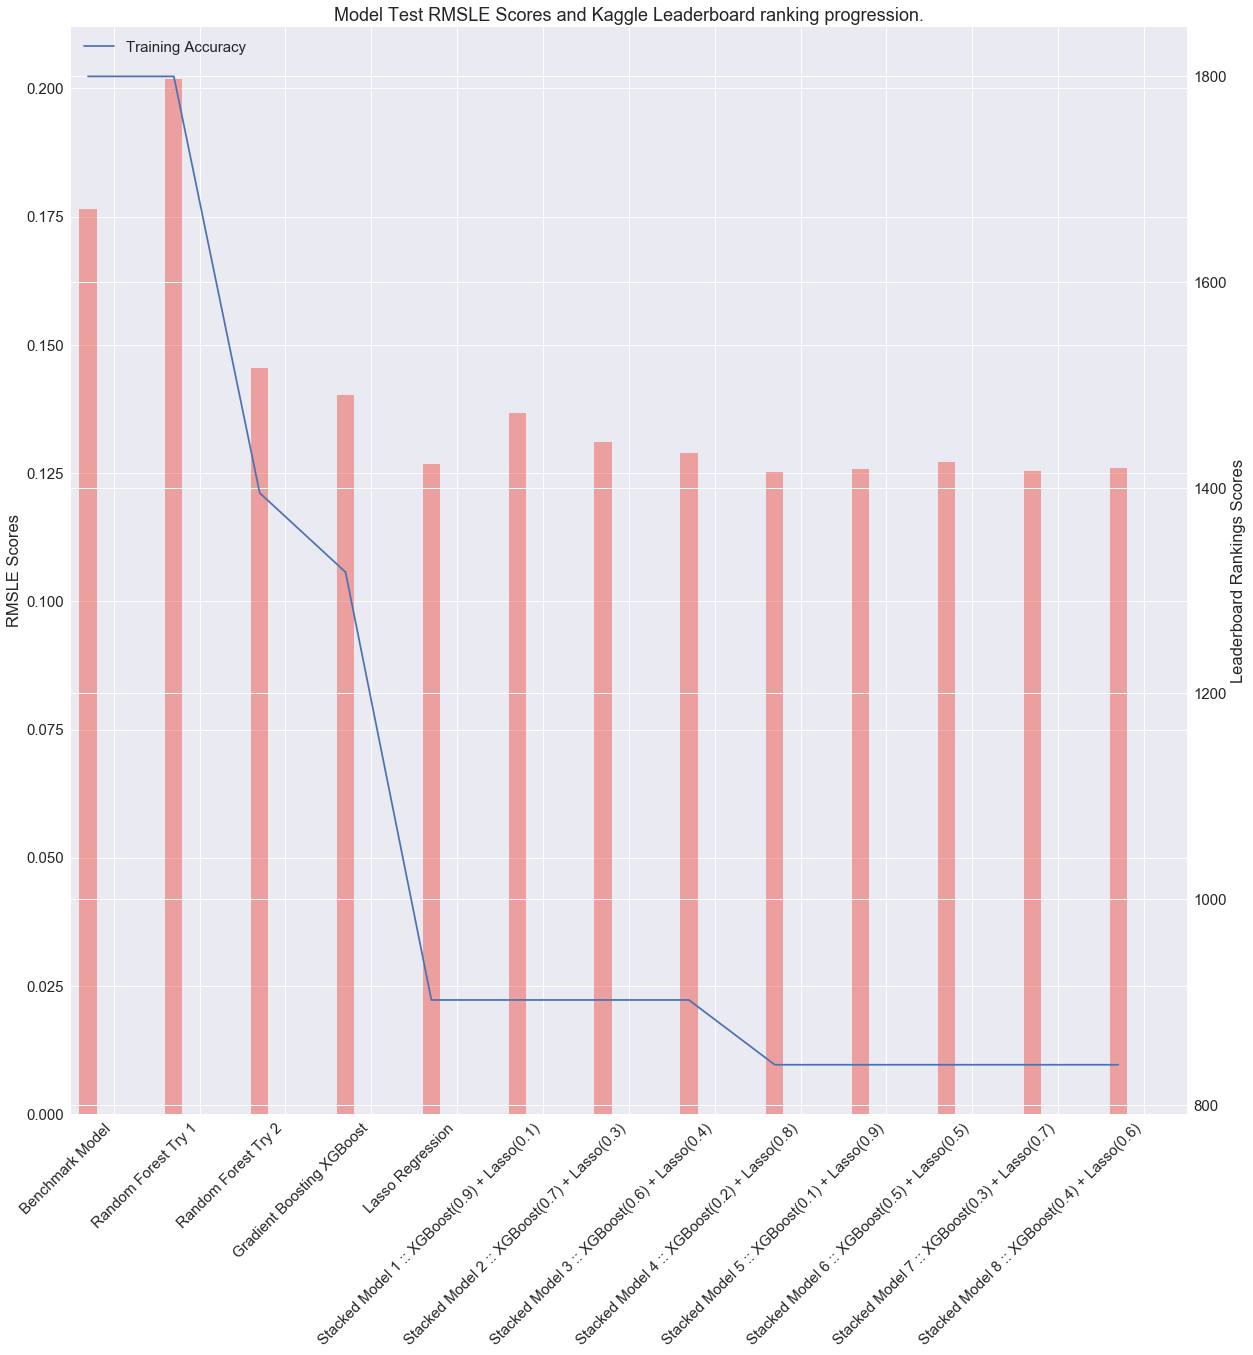

In [187]:
fig, ax1= plt.subplots(figsize=(20,20))
ax2 = ax1.twinx()  # set up the 2nd axis

ax1.bar(pos, 
        #using accuracies['Train_accuracy'] data,
        final_sum_df1['Test data RMSLE from Kaggle'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.4, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=final_sum_df1['Models'][0]) 

ax2.plot(final_df_ranks1)
ax1.axes.set_xticklabels(final_sum_df1['Models'], rotation = 45, ha = 'right')
ax1.xaxis.set_visible(True)

ax1.set_ylabel('RMSLE Scores')
ax2.set_ylabel('Leaderboard Rankings Scores')
# Set the chart's title
ax1.set_title('Model Test RMSLE Scores and Kaggle Leaderboard ranking progression.')

plt.xlim(min(pos)-width, max(pos)+width*4)
ax1.set_xticks([p + 1.5 * width for p in pos])
plt.legend(['Training Accuracy', 'Leaderboard Ranking'], loc='upper left')

#ax2.set_xticklabels(final_sum_df1['Models'], rotation=45, ha='right')

###########################################################################################################################